# Projet 9 : Produire une étude de marché avec python (suite)
-------
## Introduction (2)
### Mission:

- Effectuer une première analyse des groupements par pays pour l'exportation de poulet 
- Approndir l'étude de marché 

Dans le notebook précédent, on a fait la préparation des données.
Nous allons maintenant faire l'analyse des données, et chercher à cibler des pays pour l'exportation de viande de poulet.

-------

## Analyse exploratoire des données et étude de marché

### Plan
Voici les points qui seront vu pendant l'analyse:
- Analyse exploratoire des données (**AED**)
- Méthode de Classification Ascendente Hiérarchique (**CAH**)
- Méthode **K-means** 
- Méthode d'analyse des composantes principales (**ACP** ou PCA)
- Exploration des clusters sélectionnnés
- Conclusion
-------

On importe tout d'abord les libraries utilisées

In [574]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn import metrics
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from gap_statistic import OptimalK
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from matplotlib.collections import LineCollection
# 提高 jupyter notebook圖形顯示解析度
%config InlineBackend.figure_format = 'retina'

### Analyse exploratoire de données (AED)

Le fichier *finale.csv* est créé dans la partie de netroyage et préparation des données.

In [575]:
# Importer notre jeux de données. 
df_finale = pd.read_csv('finale.csv')
df_finale.head()

Zone  Croissance_popu(%)  population_2017  proteine_volaille(%)  \
0     Afghanistan           16.477889        36296.113              0.998336   
1  Afrique du Sud            7.906280        57009.756             16.926583   
2         Albanie           -1.026974         2884.169              5.238494   
3         Algérie           10.713956        41389.189              2.121702   
4       Allemagne            2.081915        82658.409              7.648698   

   Production     TDI(%)     TAS(%)  \
0        28.0  50.877193  49.122807   
1      1667.0  24.268178  78.706327   
2        13.0  80.851064  27.659574   
3       275.0   0.722022  99.277978   
4      1514.0  48.418631  87.061530   

   Disponibilité alimentaire (Kcal/personne/jour)  Qty_prod_hab  PIB_5ans(%)  \
0                                          1997.0      0.771432    -1.556597   
1                                          2987.0     29.240609    -3.981301   
2                                          3400.0      4.507364     0.723746   
3                                          3345.0      6.644247    -4.103502   
4                                          3559.0     18.316346    -0.328481   

   CountryRisk  EEA iso3     Distance  
0          0.0    0  AFG  5594.223377  
1          2.0    0  ZAF  9306.638530  
2          1.0    0  ALB  1603.944535  
3          2.0    0  DZA  1345.460397  
4          5.0    1  DEU   880.634838

In [576]:
df_finale.mean()

C:\Users\yutin\AppData\Local\Temp\ipykernel_12832\1161281492.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_finale.mean()


Croissance_popu(%)                                    7.158704
population_2017                                   47967.735614
proteine_volaille(%)                                  7.426159
Production                                          809.820728
TDI(%)                                               41.535537
TAS(%)                                              241.017936
Disponibilité alimentaire (Kcal/personne/jour)     2875.732026
Qty_prod_hab                                         22.475190
PIB_5ans(%)                                           0.975721
CountryRisk                                           2.677728
EEA                                                   0.189542
Distance                                           5696.510217
dtype: float64

In [577]:
# Il y a 153 pays
df_finale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 14 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Zone                                            153 non-null    object 
 1   Croissance_popu(%)                              153 non-null    float64
 2   population_2017                                 153 non-null    float64
 3   proteine_volaille(%)                            153 non-null    float64
 4   Production                                      153 non-null    float64
 5   TDI(%)                                          153 non-null    float64
 6   TAS(%)                                          153 non-null    float64
 7   Disponibilité alimentaire (Kcal/personne/jour)  153 non-null    float64
 8   Qty_prod_hab                                    153 non-null    float64
 9   PIB_5ans(%)                                

In [578]:
# Aucune valeur nulle
df_finale.isnull().sum()

Zone                                              0
Croissance_popu(%)                                0
population_2017                                   0
proteine_volaille(%)                              0
Production                                        0
TDI(%)                                            0
TAS(%)                                            0
Disponibilité alimentaire (Kcal/personne/jour)    0
Qty_prod_hab                                      0
PIB_5ans(%)                                       0
CountryRisk                                       0
EEA                                               0
iso3                                              0
Distance                                          0
dtype: int64

### Premiere analyse des variables
Verification de la distribution de variables de tous les individus

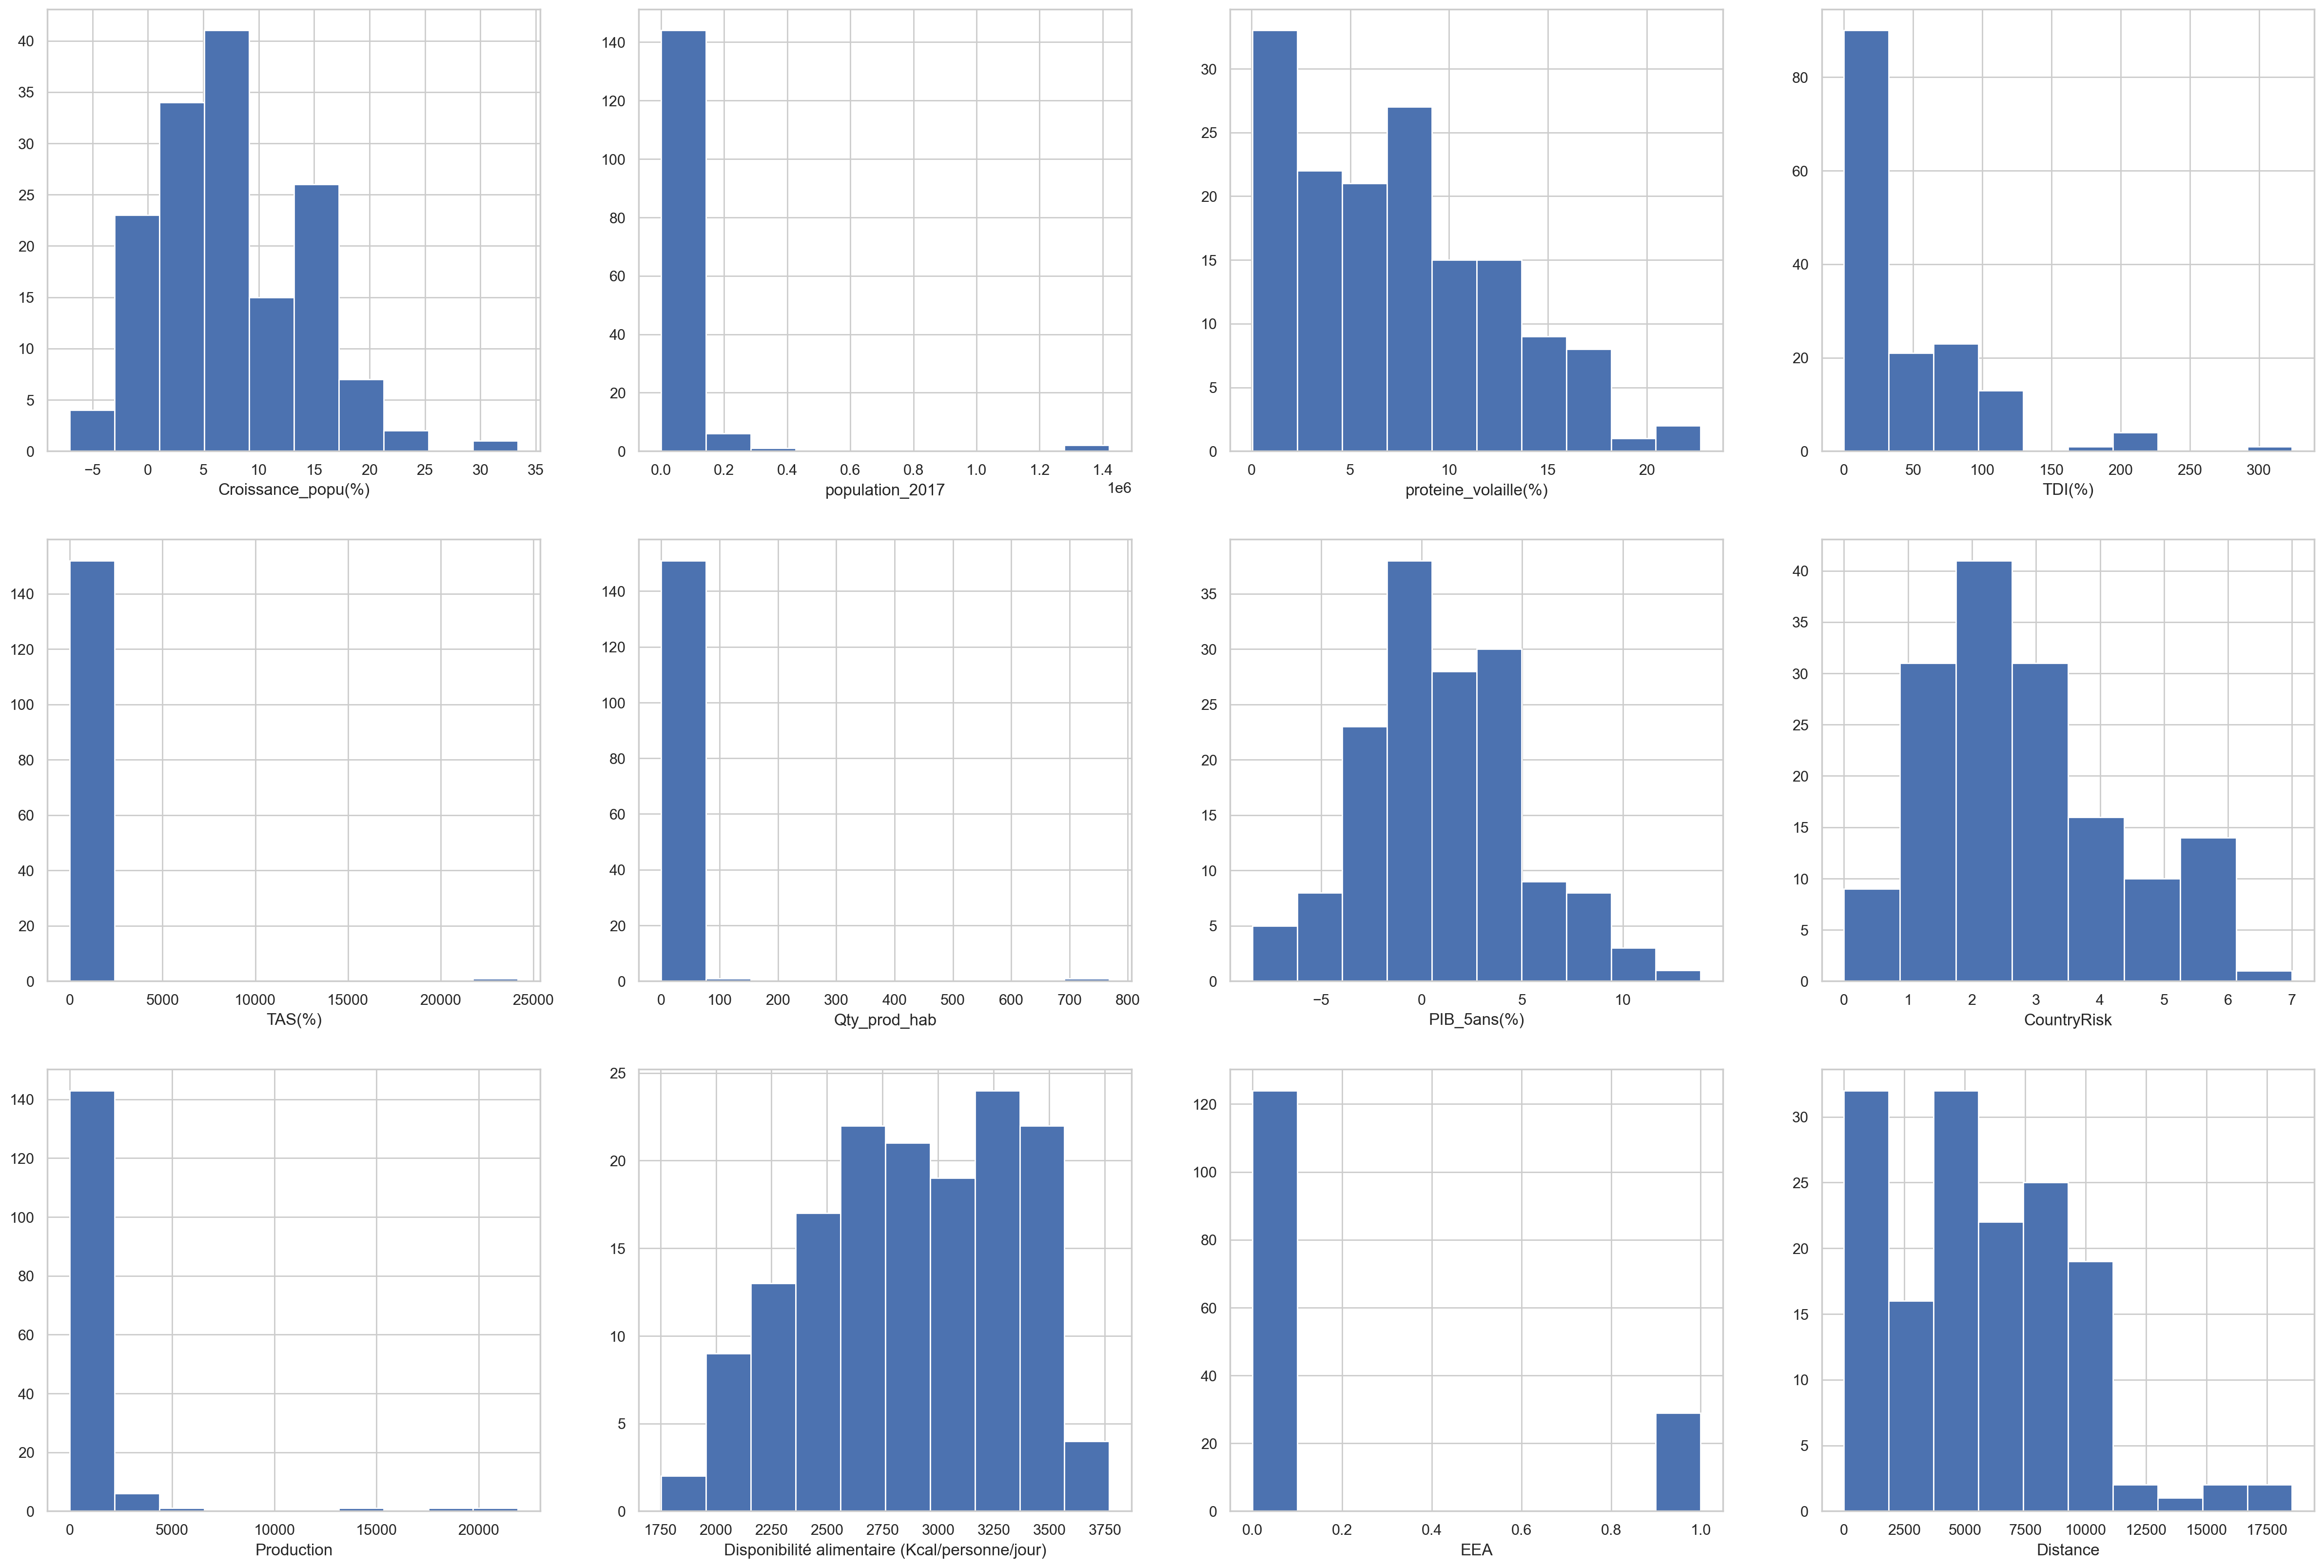

In [579]:
# Afficher des histogrammes
plt.figure(figsize=(30, 20))
sns.set(style="whitegrid")
plt.subplot(3,4,1)
plt.hist(df_finale['Croissance_popu(%)'])
plt.xlabel('Croissance_popu(%)')
plt.subplot(3,4,2)
plt.hist(df_finale['population_2017'])
plt.xlabel('population_2017')
plt.subplot(3,4,3)
plt.hist(df_finale['proteine_volaille(%)'])
plt.xlabel('proteine_volaille(%)')
plt.subplot(3,4,4)
plt.hist(df_finale['TDI(%)'])
plt.xlabel('TDI(%)')
plt.subplot(3,4,5)
plt.hist(df_finale['TAS(%)'])
plt.xlabel('TAS(%)')
plt.subplot(3,4,6)
plt.hist(df_finale['Qty_prod_hab'])
plt.xlabel('Qty_prod_hab')
plt.subplot(3,4,7)
plt.hist(df_finale['PIB_5ans(%)'])
plt.xlabel('PIB_5ans(%)')
plt.subplot(3,4,8)
plt.hist(df_finale['CountryRisk'],bins=8) #因為分數是0到7個層級,所以共有8個bins 
plt.xlabel('CountryRisk')
plt.subplot(3,4,9)
plt.hist(df_finale['Production'])
plt.xlabel('Production')
plt.subplot(3,4,10)
plt.hist(df_finale['Disponibilité alimentaire (Kcal/personne/jour)'])
plt.xlabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.subplot(3,4,11)
plt.hist(df_finale['EEA'])
plt.xlabel('EEA')
plt.subplot(3,4,12)
plt.hist(df_finale['Distance'])
plt.xlabel('Distance')

plt.savefig('Distribution de l\'ensemble variables par histogramme.jpg')

+ Nous constatons qu'il semble y avoir des valeurs extrèmes pour les variables de la *population_2017*, *TAS(%)*, la quantité de production par hab (*Qty_prod_hab*) et *Production*.</br>
    - Cela signifie que la population ainsi la production de volaille de certains pays est particulièrement importante par rapport à d'autres pays.</br>

+ Pour les autres variables, on constate qu'il ságit de distribution normales asymétriques.
    - Asymétrique à droite (positive skew) dans les histogrammes.
    - Sauf pour la disponibilité alimentaire qui est asysmétrique à gauche.


Nous allons utiliser des boxplots pour voir la distribution des valeurs aberrantes.

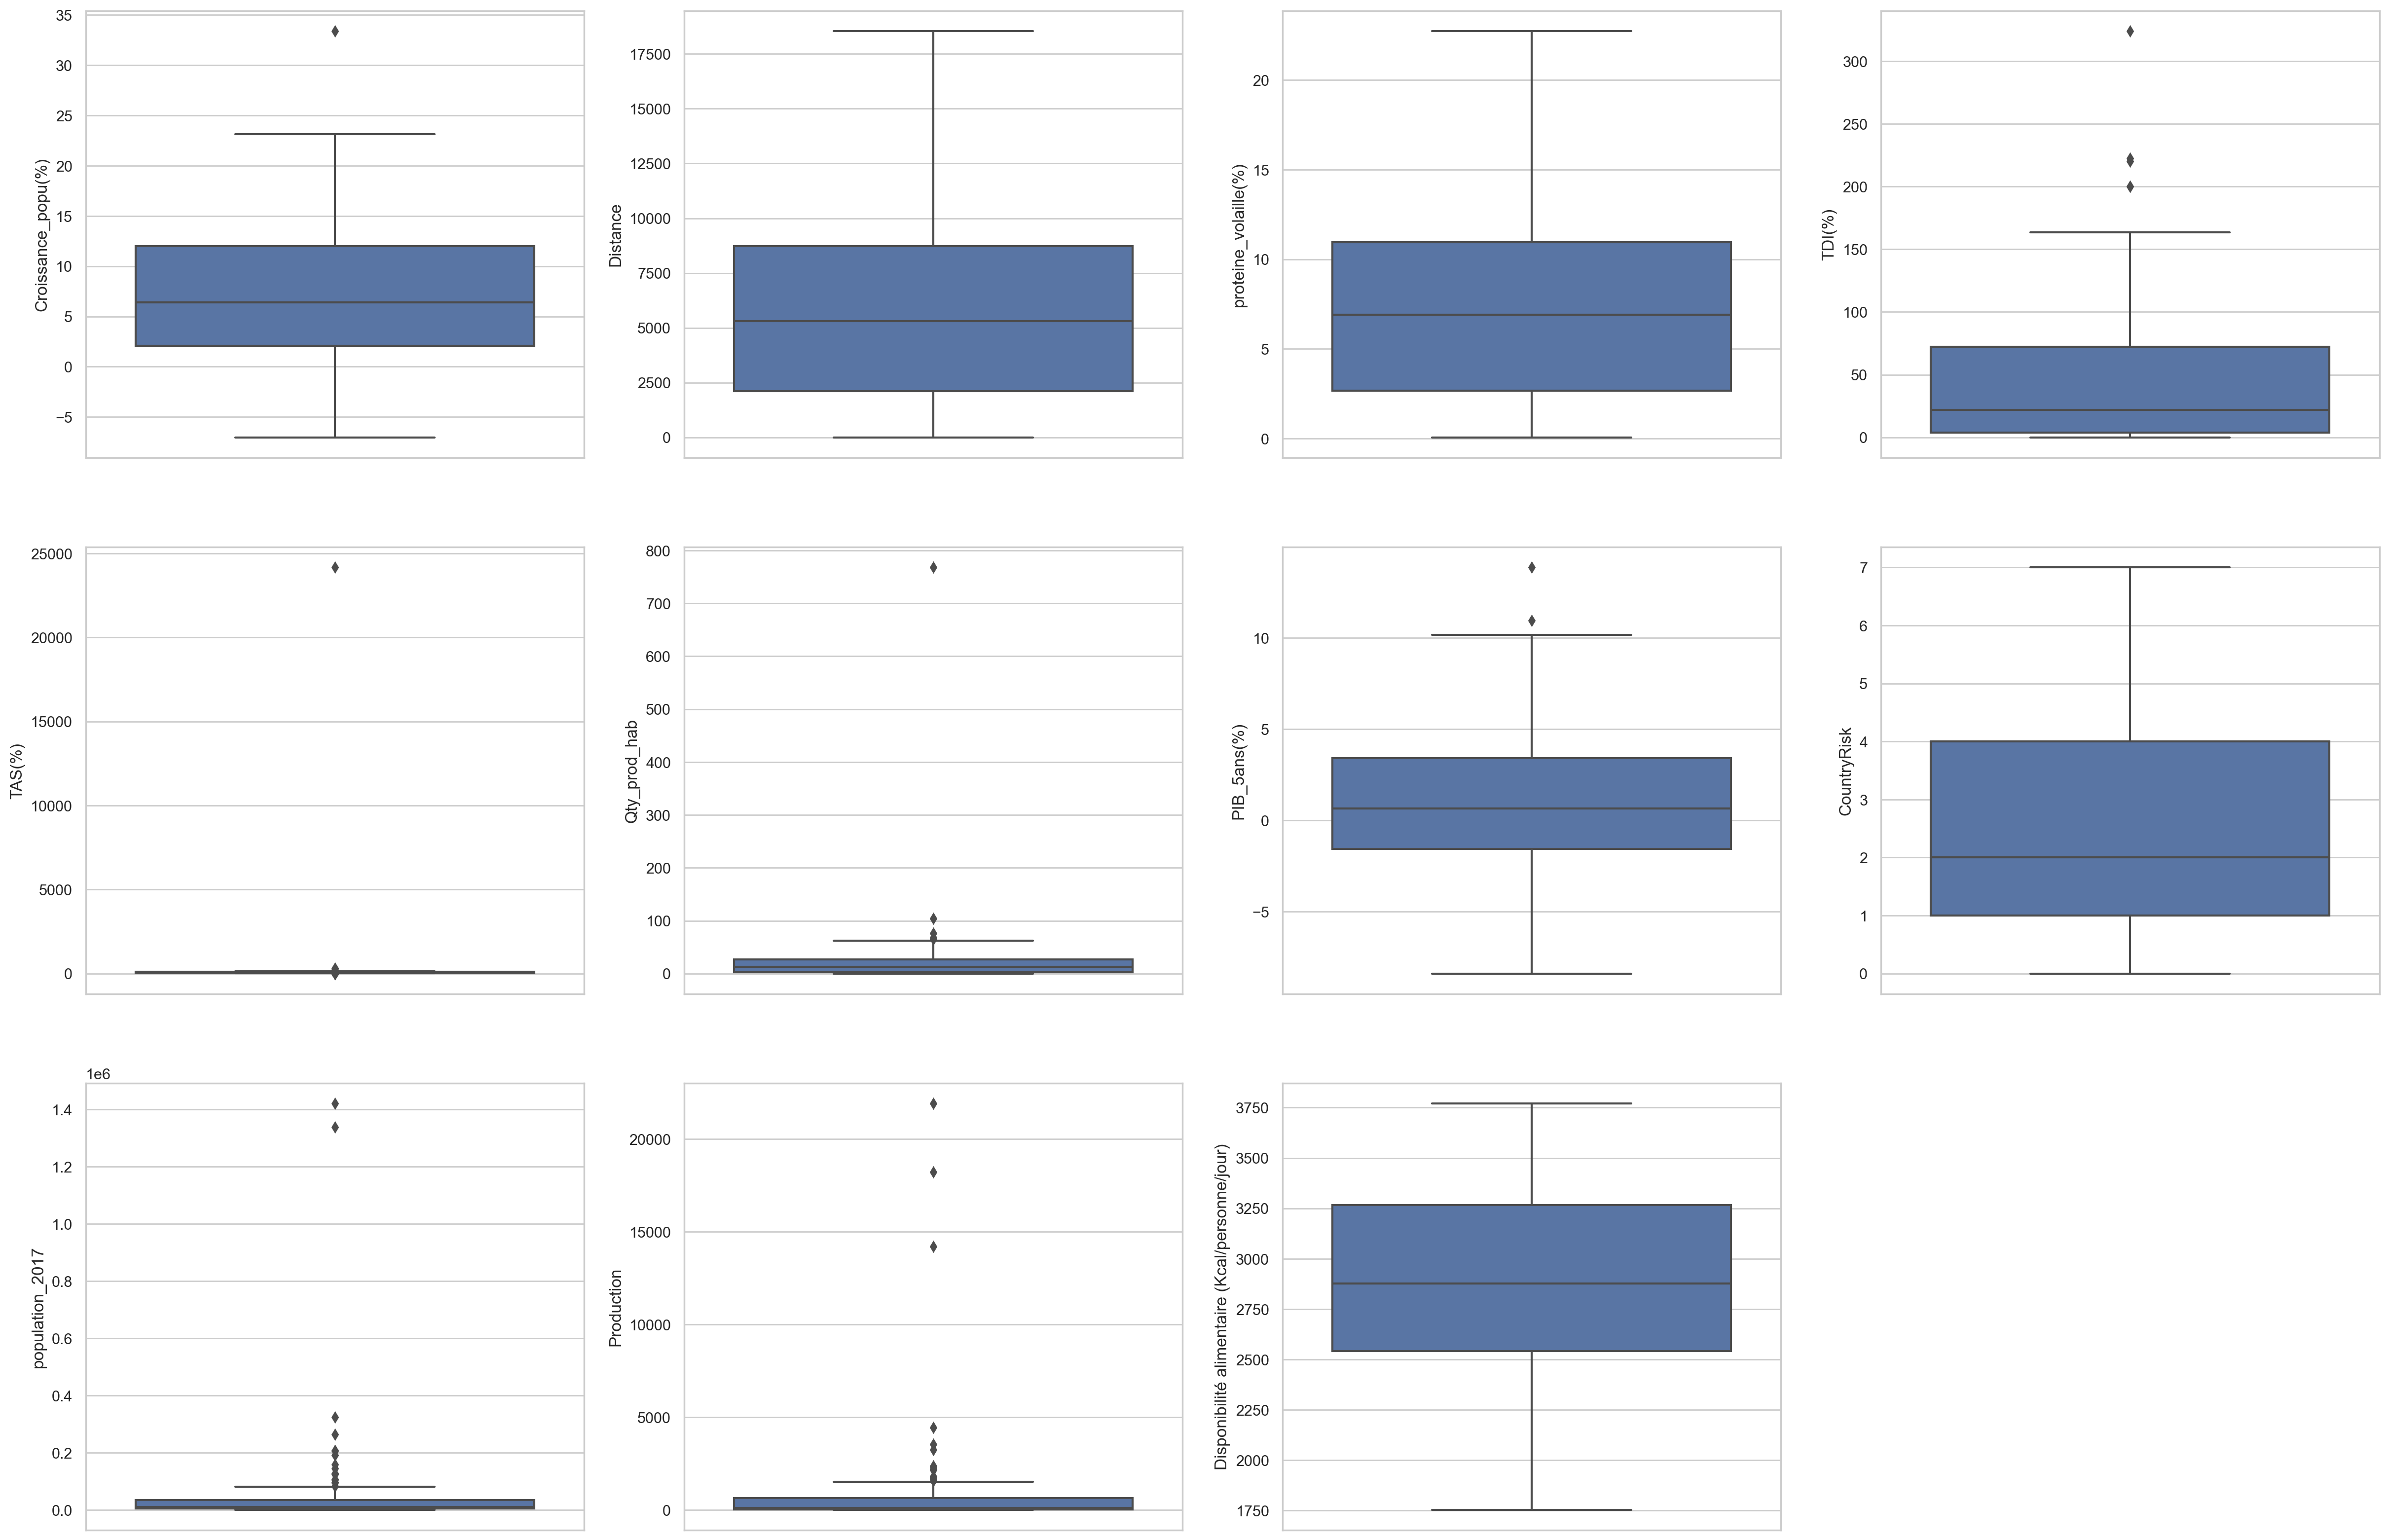

In [580]:
# Afficher des boxplot
plt.figure(figsize=(30, 20))
sns.set(style="whitegrid")
plt.subplot(3,4,1)
sns.boxplot(data=df_finale, y='Croissance_popu(%)')
plt.subplot(3,4,2)
sns.boxplot(data=df_finale, y='Distance')
plt.subplot(3,4,3)
sns.boxplot(data=df_finale, y='proteine_volaille(%)')
plt.subplot(3,4,4)
sns.boxplot(data=df_finale, y='TDI(%)')
plt.subplot(3,4,5)
sns.boxplot(data=df_finale, y='TAS(%)')
plt.subplot(3,4,6)
sns.boxplot(data=df_finale, y='Qty_prod_hab')
plt.subplot(3,4,7)
sns.boxplot(data=df_finale, y='PIB_5ans(%)')
plt.subplot(3,4,8)
sns.boxplot(data=df_finale, y='CountryRisk') 
plt.subplot(3,4,9)
sns.boxplot(data=df_finale, y='population_2017')
plt.subplot(3,4,10)
sns.boxplot(data=df_finale, y='Production')
plt.subplot(3,4,11)
sns.boxplot(data=df_finale, y='Disponibilité alimentaire (Kcal/personne/jour)')
plt.savefig('Distribution de l\'ensemble variables par boxplot.jpg')


Nous avons constaté que les valeurs extrêmes de *TAS (%)*, *population_2017*, *Production*, etc. sont évidentes. </br>
Nous examinerons ces variables séparément pour découvrir les raisons de leurs valeurs extrêmes.<br>

In [581]:
# Afficher les valeurs extremes de population_2017
df_finale.sort_values(by = ['population_2017'], ascending = False).head()

Zone  Croissance_popu(%)  population_2017  \
30                   Chine            2.659675      1421021.791   
60                    Inde            5.759020      1338676.785   
150  États-Unis d'Amérique            3.515710       325084.756   
61               Indonésie            6.520076       264650.963   
103               Pakistan           11.013491       207906.209   

     proteine_volaille(%)  Production    TDI(%)      TAS(%)  \
30               3.903785     18236.0  2.488850  100.412973   
60               1.141553      3545.0  0.000000   96.831467   
150             17.542470     21914.0  0.673382  119.971532   
61               3.526155      2301.0  0.043048   99.052949   
103              2.973585      1281.0  0.156006   99.921997   

     Disponibilité alimentaire (Kcal/personne/jour)  Qty_prod_hab  \
30                                           3197.0     12.833019   
60                                           2515.0      2.648137   
150                                          3762.0     67.410113   
61                                           2894.0      8.694471   
103                                          2325.0      6.161432   

     PIB_5ans(%)  CountryRisk  EEA iso3      Distance  
30      7.983015          3.0    0  CHN   9283.668375  
60      4.694857          3.0    0  IND   7018.087215  
150     3.041601          6.0    0  USA   5852.736948  
61      0.986635          4.0    0  IDN  11587.344997  
103     4.016397          1.0    0  PAK   6138.327507

Dans la colonne de "population_2017", la Chine et l'Inde ont les plus grandes populations du monde.

In [582]:
# Afficher les valeurs extremes de production
df_finale.sort_values(by = ['Production'], ascending = False).head()

Zone  Croissance_popu(%)  population_2017  \
150  États-Unis d'Amérique            3.515710       325084.756   
30                   Chine            2.659675      1421021.791   
17                  Brésil            4.288544       207833.823   
47    Fédération de Russie            1.066844       145530.082   
60                    Inde            5.759020      1338676.785   

     proteine_volaille(%)  Production    TDI(%)      TAS(%)  \
150             17.542470     21914.0  0.673382  119.971532   
30               3.903785     18236.0  2.488850  100.412973   
17              17.255420     14201.0  0.030054  142.266079   
47              10.248356      4444.0  4.960492   97.541703   
60               1.141553      3545.0  0.000000   96.831467   

     Disponibilité alimentaire (Kcal/personne/jour)  Qty_prod_hab  \
150                                          3762.0     67.410113   
30                                           3197.0     12.833019   
17                                           3250.0     68.328628   
47                                           3362.0     30.536642   
60                                           2515.0      2.648137   

     PIB_5ans(%)  CountryRisk  EEA iso3     Distance  
150     3.041601          6.0    0  USA  5852.736948  
30      7.983015          3.0    0  CHN  9283.668375  
17     -3.853195          3.0    0  BRA  9377.800449  
47     -2.748941          1.0    0  RUS  2493.922256  
60      4.694857          3.0    0  IND  7018.087215

Les trois principaux pays producteurs de poulet au monde sont **les États-Unis, la Chine et le Brésil**.<br>
Ce sont **notre plus grande concurrence**.<br>
<br>
Nous avons décidé de **supprimer quatre pays** pour les raisons suivantes :<br>
<br>
- Les États-Unis : TDI (%) faible, TAS (%) élevé. Le plus grand producteur du monde ( cela est très compliqué d'entrer dans son marché ).<br>
<br>
- La Chine : La note de l'indice de risque relativement faible (donc pas fiable) , sa population est la plus grande mais c'est un grand producteur. De plus, son marché est plutôt fermé.<br>
<br>
- Le Brésil : TDI (%) faible, TAS (%) élevé. La note de l'indice de risque relativement faible, il est aussi un grand producteur.<br>

- L'Inde : TDI (%) est 0, TAS (%) élevé. sa population est importante mais La note de l'indice de risque relativement faible. Elle est aussi déjà un grand producteur.<br>


In [583]:
# Enlever les États-Unis
df_finale.drop(axis=0,index=150,inplace=True)

# Enlever la Chine
df_finale.drop(axis=0,index=30,inplace=True)

# Enlever le Brésil
df_finale.drop(axis=0,index=17,inplace=True)

# Enlever l'Inde
df_finale.drop(axis=0,index=60,inplace=True)

In [585]:
# Afficher les valeurs extremes de TAS(%)
df_finale.sort_values(by = ['TAS(%)'], ascending = False).head()

Zone  Croissance_popu(%)  population_2017  proteine_volaille(%)  \
39    Djibouti            8.750001          944.099              1.384916   
13    Belgique            3.016502        11419.748              4.509127   
106   Pays-Bas            1.366777        17021.347              8.120272   
108    Pologne           -0.716414        37953.180             11.784120   
133  Thaïlande            2.025250        69209.810              7.138169   

      Production      TDI(%)        TAS(%)  \
39    725.190476  100.000000  24173.015873   
13    463.000000  222.368421    304.605263   
106  1100.000000  163.440860    295.698925   
108  2351.000000    4.757785    203.373702   
133  1676.000000    0.227015    190.238365   

     Disponibilité alimentaire (Kcal/personne/jour)  Qty_prod_hab  \
39                                           2677.0    768.129694   
13                                           3770.0     40.543802   
106                                          3251.0     64.624733   
108                                          3526.0     61.944743   
133                                          2826.0     24.216220   

     PIB_5ans(%)  CountryRisk  EEA iso3     Distance  
39      9.588515          2.0    0  DJI  5585.295235  
13     -0.994720          5.0    1  BEL   264.600808  
106    -1.337900          6.0    1  NLD   430.886817  
108     0.377321          4.0    1  POL  1370.877921  
133     3.202673          4.0    0  THA  9454.494024

Dans la colonne de TAS(%), on constate que le pays Djbouti a une valeur extrèmement élevé.<br>
On decide de supprimer ce pays.<br>

In [586]:
# Exclure le pays Djibouti qui représentent des valeurs extrèmes dans 'TAS'.
df_finale.drop(axis=0,index=39,inplace=True)

In [587]:
# Afficher les valeurs extremes de TDI
df_finale.sort_values(by = ['TDI(%)'], ascending = False).head()

Zone  Croissance_popu(%)  population_2017  \
27   Chine - RAS de Hong-Kong            3.682129         7306.322   
13                   Belgique            3.016502        11419.748   
134               Timor-Leste            9.732090         1243.258   
152              Îles Salomon           14.382543          636.039   
49                     Gambie           16.213853         2213.889   

     proteine_volaille(%)  Production      TDI(%)      TAS(%)  \
27              16.144473        24.0  323.928571    8.571429   
13               4.509127       463.0  222.368421  304.605263   
134              2.530768         1.0  220.000000   20.000000   
152              2.815063         0.0  200.000000    0.000000   
49               1.953371         2.0  200.000000   25.000000   

     Disponibilité alimentaire (Kcal/personne/jour)  Qty_prod_hab  \
27                                           3353.0      3.284826   
13                                           3770.0     40.543802   
134                                          2142.0      0.804338   
152                                          2410.0      0.000000   
49                                           2542.0      0.903388   

     PIB_5ans(%)  CountryRisk  EEA iso3      Distance  
27      4.697363     5.000000    0  HKG   9645.855848  
13     -0.994720     5.000000    1  BEL    264.600808  
134     5.845632     1.000000    0  TLS  13117.527550  
152     2.903426     2.673077    0  SLB  15164.476423  
49     -1.654294     2.673077    0  GMB   4315.300487

In [588]:
# Afficher les valeurs extremes de Quantite production par habitant
df_finale.sort_values(by = ['Qty_prod_hab'], ascending = False).head()

Zone  Croissance_popu(%)  \
118  République démocratique populaire lao            7.890490   
65                                  Israël            8.258699   
106                               Pays-Bas            1.366777   
108                                Pologne           -0.716414   
82                                Malaisie            7.005792   

     population_2017  proteine_volaille(%)   Production      TDI(%)  \
118         6953.035              4.315423   725.190476   13.020677   
65          8243.848             22.728756   629.000000    0.000000   
106        17021.347              8.120272  1100.000000  163.440860   
108        37953.180             11.784120  2351.000000    4.757785   
82         31104.646             16.419424  1724.000000    4.194941   

         TAS(%)  Disponibilité alimentaire (Kcal/personne/jour)  Qty_prod_hab  \
118  105.467813                                          3044.0    104.298407   
65    98.899371                                          3507.0     76.299320   
106  295.698925                                          3251.0     64.624733   
108  203.373702                                          3526.0     61.944743   
82   106.354102                                          2902.0     55.425804   

     PIB_5ans(%)  CountryRisk  EEA iso3      Distance  
118    10.175726          1.0    0  LAO   9236.350000  
65      3.696910          6.0    0  ISR   3336.150737  
106    -1.337900          6.0    1  NLD    430.886817  
108     0.377321          4.0    1  POL   1370.877921  
82     -0.053458          4.0    0  MYS  10218.080770

In [589]:
df_finale.shape

(148, 14)

Après avoir retiré 5 pays avec des valeurs extrêmes, le nombre de pays que nous allons utiliser à analyser est de 148.

#### Corrélations entre les différentes variables

On utilise une heatmap pour visualiser la *matrice de correlation* des variables. </br>
Le coefficient de corrélation est utilisé pour mesurer le degré de corrélation (dépendance linéaire) entre deux variables X et Y, et sa valeur est comprise entre -1 et 1.<br>
Nous l'utilisons pour observer la relation entre les paramètres et aider à trouver les variables qui ont un impact important sur les paramètres cibles.<br>

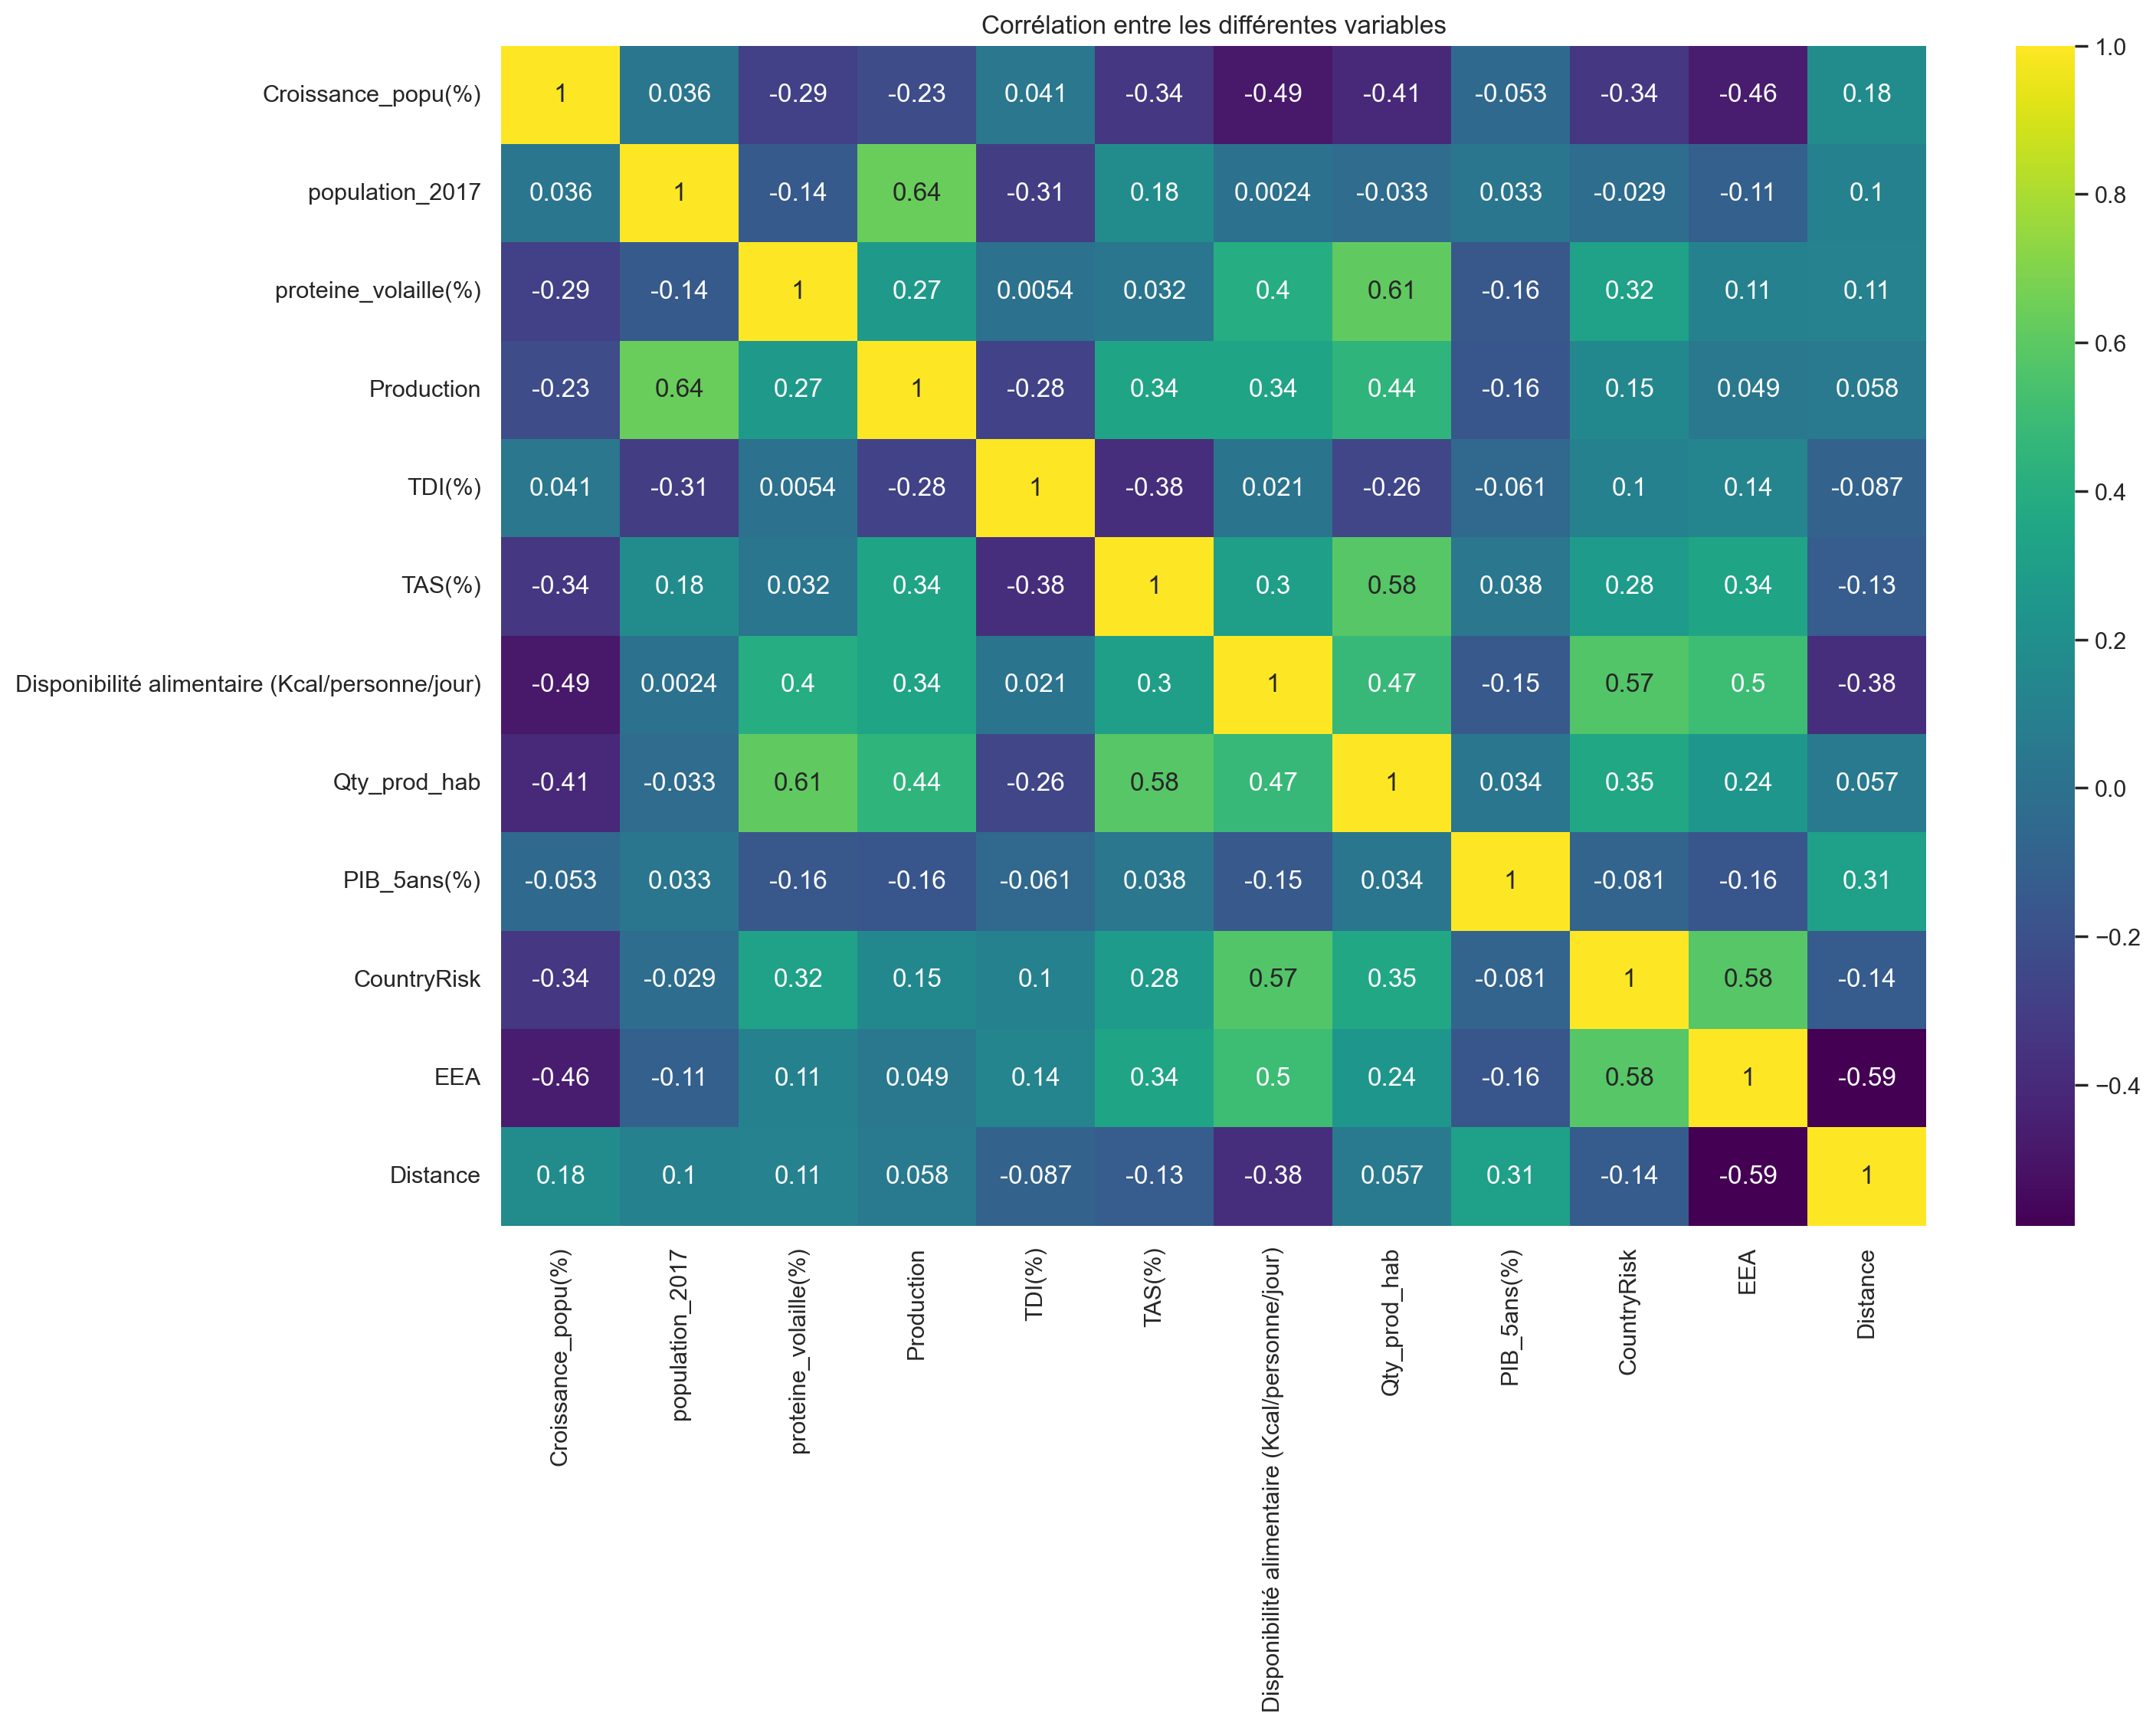

In [590]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_finale.corr(),cmap='viridis',annot=True)
plt.title('Corrélation entre les différentes variables')

# On sauvegarde la heatmap en tant qu'image
plt.savefig('Heatmap_des_correlations_entres_variables.jpg')

##### Observations

Nous avons observé les relations intéressantes suivantes entre les variables :<br>
<br>
1. Pour la croissance_popu(%), on constate:
    - Une corrélation négative avec la disponibilité alimentaire, le taux de  protéine volaille(%),  et la qty_prod_hab sont négativement corrélées, ce qui signifie que plus la croissance démographique est élevé, moins les pays peuvent fournir de nourriture à sa population.<br>
    - Une corrélation négative avec le TAS(%), le CountryRisk et l'EEA ( EEE ) , ce qui indique que plus croissance démographique est élevée, plus le taux d'autosuffisance (TAS) et l'indice de risque est mauvais (proche de zéro).<br> 
Cela montre que les attributs de ces pays et des pays membres de l'EEE sont plus différents qui sont moins susceptibles d'être membres de l'EEE.
2. La production (de volaille) est 
    - positivement corrélés  avec le TAS(%) : Plus la production est élevée, plus le taux d'autosuffisance du pays est élevé.
    - négativement corrélés avec le TDI(%) : Plus la production est élevée, moins du taux d'importation.<br>

3. Il existe une corrélation négative entre le TDI(%) et le TAS(%) : 
    - Plus le taux de dépendance aux importations du pays est élevé, moins est le taux d'autosuffisance.

4. Le TAS(%) et la disponibilité alimentaire sont positivement corrélés.
    - Plus de taux d'autosuffisance du pays est élevé, plus la quantité de nourriture que le pays peut fournir à la population est élevée.
    
5. La disponibilité alimentaire est également positivement corrélée avec le CountryRisk et l'EEA(EEE).
    - Plus l'indice de disponibilité alimentaire du pays est élevé, meilleur est l'indice de risque 
    - les États membres de l'EEE ont tendance à avoir une disponibilité alimentaire élevé.

6. Il existe une corrélation négative entre la distance (avec la France) et EEA(EEE).
    - Plus le pays est éloigné de la France, moins il a de chance d'etre dans l'EEE (*Espace Economique Europeen).
    - Logique car en Europe.

7. Fait intéressant:
    - Bien qu'il existe une corrélation négative entre le TDI(%) et le TAS(%), les deux sont positivement corrélés avec le CountryRisk et l'EEA (EEE).<br>
        - Cela peut signifier que si le TDI(%) et le TAS(%) d'un pays sont tous deux relativement bons, on fait plus confiance en ce pays et il correspond plus aux attributs des pays membres de l'EEE.

    - De plus, nous pouvons trouver une corrélation positive entre la disponibilité alimentaire et le TDI(%) et le TAS(%). 
        - Nous pouvons déduire que **les pays les plus riches ont une disponibilité alimentaire plus élevée, et ont à la fois un TAS  et un TDI relativement élévé**.

### Quelles sont les pays à cibler ?

Pour notre étude de marché sur l'exportation de poulet, nous retenons les critères suivants pour cibler les pays:
<br>
1. Un TDI(%) élevé.
2. Un TAS(%) faible.
3. Une indice de CountryRisk élevée
4. Appartenance à l'EEE.
5. Distance plus courte.(aspect écologique)
6. Un taux de croissance démographique (Croissance_popu %) faible
7. Une disponibilité alimentaire élevée

<br>
Les pays de EEE ont les caracteristiques suivantes:<br>
- Proximite avec la France
- Bon indice de risque
- Potentielles facilités taxes (import), libre circulation des biens.
<br>
En théorie, un pays avec un TAS(%) faible et un TDI(%) élevé est propice à l'importation de notre poulet.<br>
Mais nous avons remarqué dans le heatmap que les pays ayant une disponibilité alimentaire plus élevée ont généralement un indice de CountryRisk plus élevé (représentant que la situation globale pour investir dans ces pays est plus stable. Ils ont la capacité économique relativement meilleur pour produire , exporter et importer de la nourriture, donc leurs TAS(%) et TDI(%) sont également élevés.<br>
<br>
Nous envisagerons donc également de choisir certains pays avec un bon taux d'autosuffisance et un bon taux de dépendance aux importations en même temps.<br>


# Classification ascendante hiérachique (CAH)

Nous allons maintenant utiliser la CAH pour faire une première analyse des clusters.

Je choisis les variables utilisées pour l'analyse.

In [591]:
features = df_finale.columns.values

In [592]:
# On exclut iso3 des variables de clustering
features = np.delete(features,np.where(features == "iso3"))

In [593]:
features

array(['Zone', 'Croissance_popu(%)', 'population_2017',
       'proteine_volaille(%)', 'Production', 'TDI(%)', 'TAS(%)',
       'Disponibilité alimentaire (Kcal/personne/jour)', 'Qty_prod_hab',
       'PIB_5ans(%)', 'CountryRisk', 'EEA', 'Distance'], dtype=object)

In [594]:

list_iso3 = df_finale["iso3"].values # We save iso3 to put it back later
list_zone = df_finale["Zone"].values
tmp3_with_iso3 = df_finale.copy()
tmp3 = df_finale.set_index(["Zone"]).drop("iso3", axis=1)

In [595]:
# Selectionner les valeurs à utiliser pour notre analyse
X = tmp3.values
# On fait un centrer/reduire pour normaliser l'importance des données.
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X) # 放這個是為了算入每個國家不同的重要性
#Clustering hiérarchique: création d'une Matrice des liens selon la Méthode de Ward
Z = linkage(X_scaled, method = 'ward', metric='euclidean')

In [596]:
Z.shape

(147, 4)

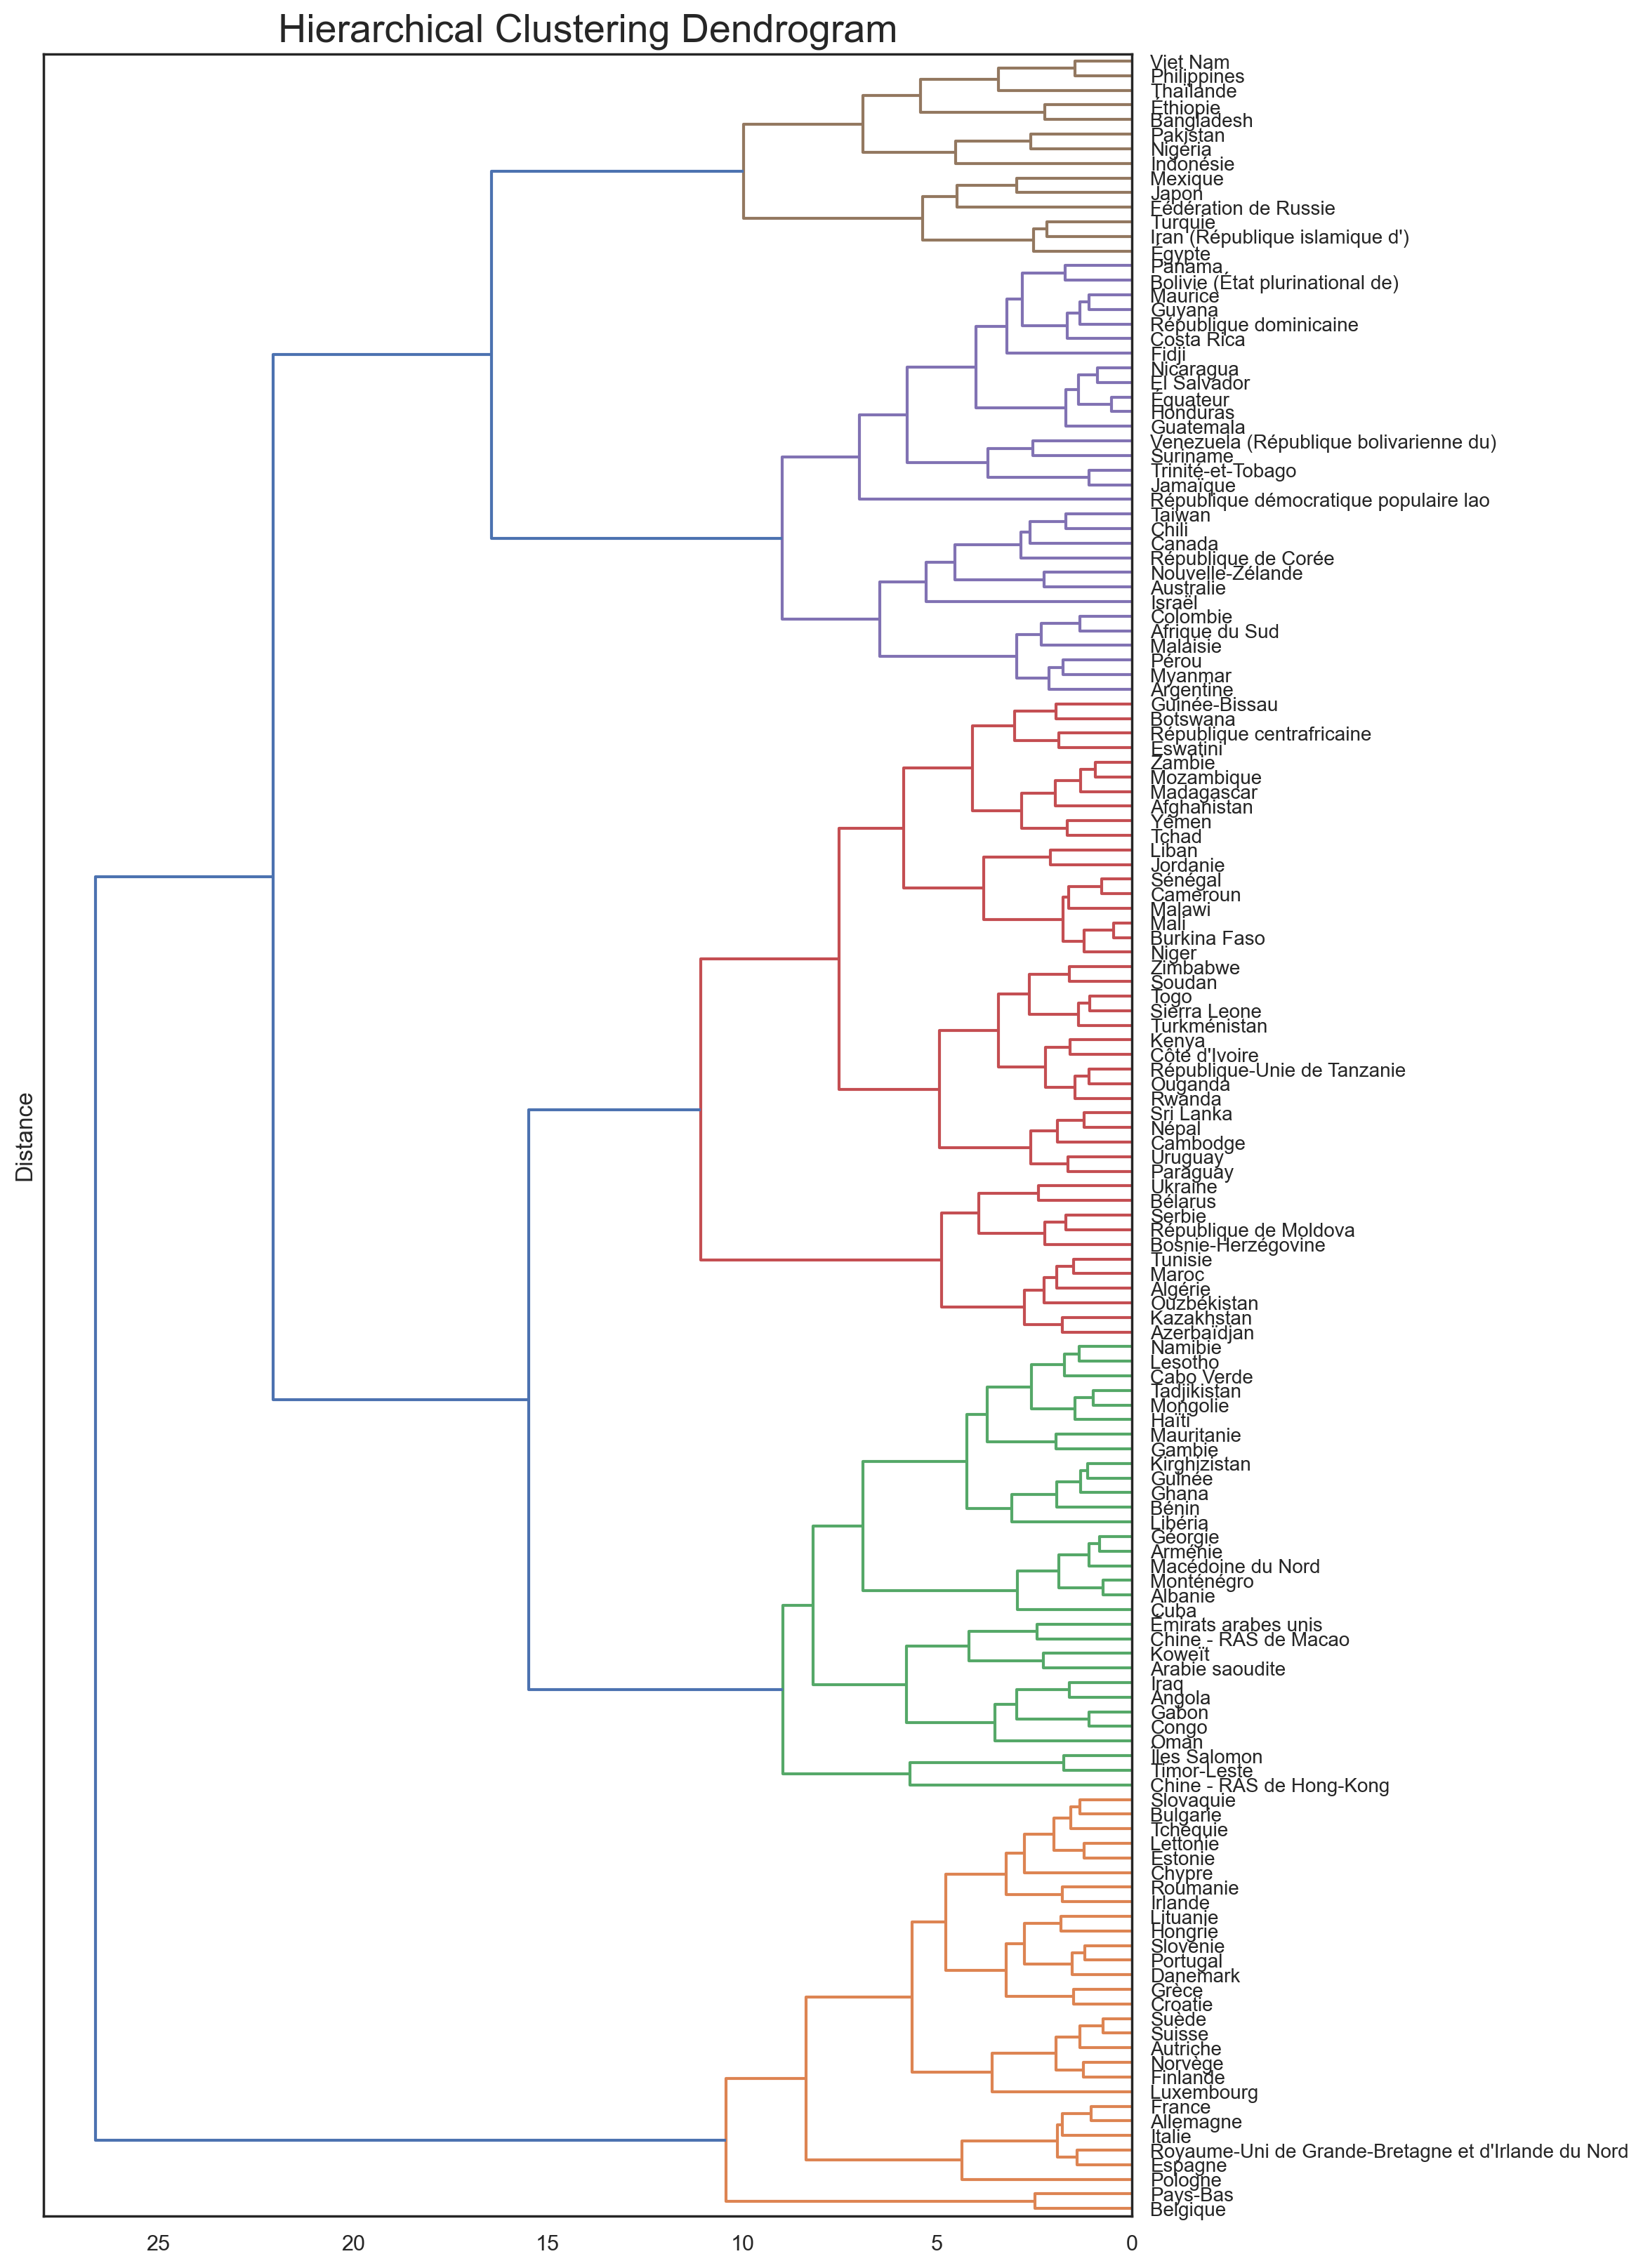

<Figure size 640x480 with 0 Axes>

In [597]:
# Affichage d'un premier dendrogramme global
fig =plt.figure(figsize=(10,20))
sns.set_style('white')
plt.title('Hierarchical Clustering Dendrogram', fontsize=20)
plt.ylabel('Distance')
dendrogram(Z, labels = tmp3.index, leaf_font_size=10, color_threshold=12, orientation='left')
#plt.axvline(x=10) 距離區分
plt.show()
# On sauvegarde la heatmap en tant qu'image
plt.savefig('C.jpg')

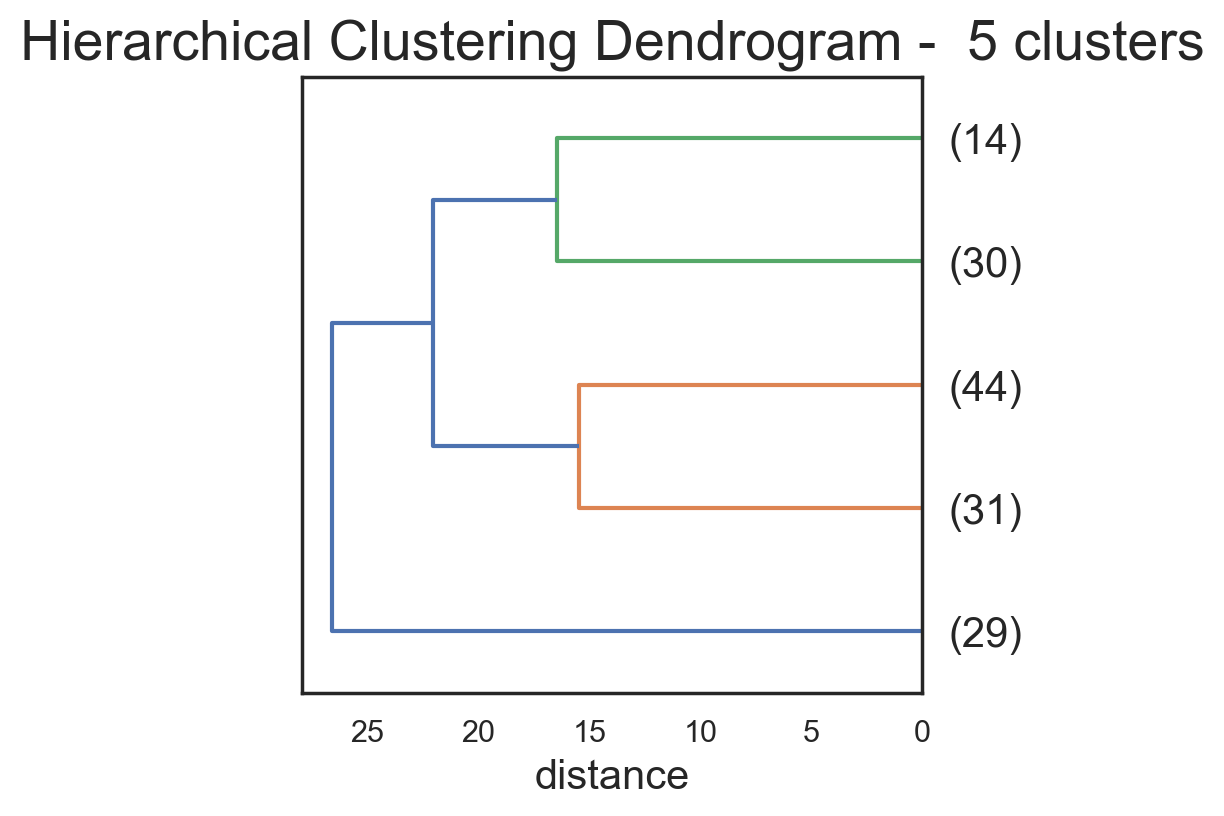

In [598]:
# Partitionnement en 5 groupes
fig = plt.figure(figsize=(4,4))
plt.title('Hierarchical Clustering Dendrogram -  5 clusters', fontsize=20)
plt.xlabel('distance', fontsize=15)
dendrogram(Z, labels = tmp3.index, p=5, truncate_mode='lastp', leaf_font_size=15, orientation='left')
plt.show()

#### Observations

Nous optons pour 5 clusters qui se déclinent de la manière suivante :

        - Groupe 1 : 29 pays
        - Groupe 2 : 31 pays
        - Groupe 3 : 44 pays
        - Groupe 4 : 30 pays
        - Groupe 5 : 14 pays
        
Nous analyserons ces 5 groupes pour vérifier la pertinence de cette partition par la suite.

#### Analyse des cinq clusters

On va dans un premier ajouter à quel cluster appartient chaque pays.

In [600]:
# On recupère pour chaque ligne le cluster auquel elle appartient
groupes_cah = fcluster(Z, 5, criterion='maxclust')
# index triés des groupes
idg = np.argsort(groupes_cah)
# Affichage des pays selon leurs groupes
df = pd.DataFrame(tmp3.index[idg], groupes_cah[idg]).reset_index()
df2 = df.rename(columns={'index':'Groupe'})
df2.head()

Groupe      Zone
0       1  Pays-Bas
1       1   Irlande
2       1    Chypre
3       1  Danemark
4       1  Lettonie

In [601]:
# On merge nos données éxistantes avec l'information d'appartenance au groupe
df3 = pd.merge(tmp3, df2, on='Zone')
df3.set_index('Zone', inplace=True)
df3.head()

Croissance_popu(%)  population_2017  proteine_volaille(%)  \
Zone                                                                        
Afghanistan              16.477889        36296.113              0.998336   
Afrique du Sud            7.906280        57009.756             16.926583   
Albanie                  -1.026974         2884.169              5.238494   
Algérie                  10.713956        41389.189              2.121702   
Allemagne                 2.081915        82658.409              7.648698   

                Production     TDI(%)     TAS(%)  \
Zone                                               
Afghanistan           28.0  50.877193  49.122807   
Afrique du Sud      1667.0  24.268178  78.706327   
Albanie               13.0  80.851064  27.659574   
Algérie              275.0   0.722022  99.277978   
Allemagne           1514.0  48.418631  87.061530   

                Disponibilité alimentaire (Kcal/personne/jour)  Qty_prod_hab  \
Zone                                                                           
Afghanistan                                             1997.0      0.771432   
Afrique du Sud                                          2987.0     29.240609   
Albanie                                                 3400.0      4.507364   
Algérie                                                 3345.0      6.644247   
Allemagne                                               3559.0     18.316346   

                PIB_5ans(%)  CountryRisk  EEA     Distance  Groupe  
Zone                                                                
Afghanistan       -1.556597          0.0    0  5594.223377       3  
Afrique du Sud    -3.981301          2.0    0  9306.638530       4  
Albanie            0.723746          1.0    0  1603.944535       2  
Algérie           -4.103502          2.0    0  1345.460397       3  
Allemagne         -0.328481          5.0    1   880.634838       1

Maintenant, regardons nos clusters.

In [602]:
# Cluster 1
cluster_1=df3.loc[df3['Groupe']==1]
cluster_1.head()

Croissance_popu(%)  population_2017  proteine_volaille(%)  \
Zone                                                                   
Allemagne            2.081915        82658.409              7.648698   
Autriche             3.736362         8819.901              6.928129   
Belgique             3.016502        11419.748              4.509127   
Bulgarie            -3.157334         7102.444             10.506070   
Chypre               3.932175         1179.678             11.945137   

           Production      TDI(%)      TAS(%)  \
Zone                                            
Allemagne      1514.0   48.418631   87.061530   
Autriche        148.0   63.583815   85.549133   
Belgique        463.0  222.368421  304.605263   
Bulgarie        107.0   68.789809   68.152866   
Chypre           25.0   36.842105   65.789474   

           Disponibilité alimentaire (Kcal/personne/jour)  Qty_prod_hab  \
Zone                                                                      
Allemagne                                          3559.0     18.316346   
Autriche                                           3694.0     16.780234   
Belgique                                           3770.0     40.543802   
Bulgarie                                           2827.0     15.065237   
Chypre                                             2612.0     21.192224   

           PIB_5ans(%)  CountryRisk  EEA     Distance  Groupe  
Zone                                                           
Allemagne    -0.328481          5.0    1   880.634838       1  
Autriche     -0.995045          5.0    1  1036.711400       1  
Belgique     -0.994720          5.0    1   264.600808       1  
Bulgarie      1.332737          3.0    1  1761.684997       1  
Chypre       -2.790676          3.0    1  2954.972339       1

In [604]:
# Cluster 2
cluster_2=df3.loc[df3['Groupe']==2]
cluster_2.head()

Croissance_popu(%)  population_2017  proteine_volaille(%)  \
Zone                                                                         
Albanie                   -1.026974         2884.169              5.238494   
Angola                    18.754373        29816.766              6.655574   
Arabie saoudite           13.535560        33101.179             17.792252   
Arménie                    2.099587         2944.791              5.589233   
Bénin                     14.861877        11175.198              7.726920   

                 Production     TDI(%)     TAS(%)  \
Zone                                                
Albanie                13.0  80.851064  27.659574   
Angola                 42.0  86.833856  13.166144   
Arabie saoudite       616.0  50.313589  42.926829   
Arménie                11.0  74.468085  23.404255   
Bénin                  18.0  76.397516  11.180124   

                 Disponibilité alimentaire (Kcal/personne/jour)  Qty_prod_hab  \
Zone                                                                            
Albanie                                                  3400.0      4.507364   
Angola                                                   2266.0      1.408603   
Arabie saoudite                                          3194.0     18.609609   
Arménie                                                  3072.0      3.735409   
Bénin                                                    2754.0      1.610710   

                 PIB_5ans(%)  CountryRisk  EEA     Distance  Groupe  
Zone                                                                 
Albanie             0.723746          1.0    0  1603.944535       2  
Angola             -0.922859          2.0    0  6478.953877       2  
Arabie saoudite    -1.911787          3.0    0  4686.618146       2  
Arménie             0.845691          2.0    0  3439.396932       2  
Bénin               4.704814          3.0    0  4709.456098       2

In [605]:
# Cluster 3
cluster_3=df3.loc[df3['Groupe']==3]
cluster_3.head()

Croissance_popu(%)  population_2017  proteine_volaille(%)  \
Zone                                                                            
Afghanistan                  16.477889        36296.113              0.998336   
Algérie                      10.713956        41389.189              2.121702   
Azerbaïdjan                   6.267105         9845.320              4.821235   
Bosnie-Herzégovine           -7.030485         3351.525              5.984352   
Botswana                      8.115688         2205.080              1.828238   

                    Production     TDI(%)      TAS(%)  \
Zone                                                    
Afghanistan               28.0  50.877193   49.122807   
Algérie                  275.0   0.722022   99.277978   
Azerbaïdjan              104.0  20.930233   80.620155   
Bosnie-Herzégovine        61.0  18.181818  110.909091   
Botswana                   5.0  42.857143   71.428571   

                    Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                 
Afghanistan                                                 1997.0   
Algérie                                                     3345.0   
Azerbaïdjan                                                 3102.0   
Bosnie-Herzégovine                                          3266.0   
Botswana                                                    2338.0   

                    Qty_prod_hab  PIB_5ans(%)  CountryRisk  EEA     Distance  \
Zone                                                                           
Afghanistan             0.771432    -1.556597          0.0    0  5594.223377   
Algérie                 6.644247    -4.103502          2.0    0  1345.460397   
Azerbaïdjan            10.563395    -7.257248          3.0    0  3822.723035   
Bosnie-Herzégovine     18.200670     1.241380          1.0    0  1348.453128   
Botswana                2.267491     0.931339          4.0    0  8472.241689   

                    Groupe  
Zone                        
Afghanistan              3  
Algérie                  3  
Azerbaïdjan              3  
Bosnie-Herzégovine       3  
Botswana                 3

In [606]:
# Cluster 4
cluster_4=df3.loc[df3['Groupe']==4]
cluster_4.head()

Croissance_popu(%)  population_2017  \
Zone                                                                   
Afrique du Sud                             7.906280        57009.756   
Argentine                                  5.225563        43937.140   
Australie                                  7.337914        24584.620   
Bolivie (État plurinational de)            7.855121        11192.855   
Canada                                     5.183161        36732.095   

                                 proteine_volaille(%)  Production     TDI(%)  \
Zone                                                                           
Afrique du Sud                              16.926583      1667.0  24.268178   
Argentine                                   13.179427      2161.0   0.407747   
Australie                                   15.368947      1269.0   1.366354   
Bolivie (État plurinational de)             16.710526       533.0   0.233100   
Canada                                      13.678082      1417.0  12.700628   

                                     TAS(%)  \
Zone                                          
Afrique du Sud                    78.706327   
Argentine                        110.142712   
Australie                        108.368915   
Bolivie (État plurinational de)  124.242424   
Canada                            98.883461   

                                 Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                              
Afrique du Sud                                                           2987.0   
Argentine                                                                3239.0   
Australie                                                                3307.0   
Bolivie (État plurinational de)                                          2354.0   
Canada                                                                   3492.0   

                                 Qty_prod_hab  PIB_5ans(%)  CountryRisk  EEA  \
Zone                                                                           
Afrique du Sud                      29.240609    -3.981301          2.0    0   
Argentine                           49.183902     2.815237          1.0    0   
Australie                           51.617637    -2.570215          6.0    0   
Bolivie (État plurinational de)     47.619665     6.234254          2.0    0   
Canada                              38.576618    -2.163033          6.0    0   

                                     Distance  Groupe  
Zone                                                   
Afrique du Sud                    9306.638530       4  
Argentine                        11025.347994       4  
Australie                        16957.684336       4  
Bolivie (État plurinational de)   9804.137957       4  
Canada                            6016.729398       4

In [607]:
# Cluster 5
cluster_5=df3.loc[df3['Groupe']==5]
cluster_5.head()

Croissance_popu(%)  population_2017  \
Zone                                                                  
Bangladesh                                5.747917       159685.424   
Fédération de Russie                      1.066844       145530.082   
Indonésie                                 6.520076       264650.963   
Iran (République islamique d')            6.796417        80673.883   
Japon                                    -0.717038       127502.725   

                                proteine_volaille(%)  Production     TDI(%)  \
Zone                                                                          
Bangladesh                                  0.780472       249.0   0.000000   
Fédération de Russie                       10.248356      4444.0   4.960492   
Indonésie                                   3.526155      2301.0   0.043048   
Iran (République islamique d')             11.188492      2174.0   0.270270   
Japon                                       8.368007      2215.0  44.265010   

                                   TAS(%)  \
Zone                                        
Bangladesh                      99.600000   
Fédération de Russie            97.541703   
Indonésie                       99.052949   
Iran (République islamique d')  97.927928   
Japon                           91.718427   

                                Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                             
Bangladesh                                                              2596.0   
Fédération de Russie                                                    3362.0   
Indonésie                                                               2894.0   
Iran (République islamique d')                                          3116.0   
Japon                                                                   2699.0   

                                Qty_prod_hab  PIB_5ans(%)  CountryRisk  EEA  \
Zone                                                                          
Bangladesh                          1.559316    10.970563          2.0    0   
Fédération de Russie               30.536642    -2.748941          1.0    0   
Indonésie                           8.694471     0.986635          4.0    0   
Iran (République islamique d')     26.948002    -4.780903          0.0    0   
Japon                              17.372178    -3.278977          6.0    0   

                                    Distance  Groupe  
Zone                                                  
Bangladesh                       7924.215032       5  
Fédération de Russie             2493.922256       5  
Indonésie                       11587.344997       5  
Iran (République islamique d')   4219.837255       5  
Japon                            9736.095008       5

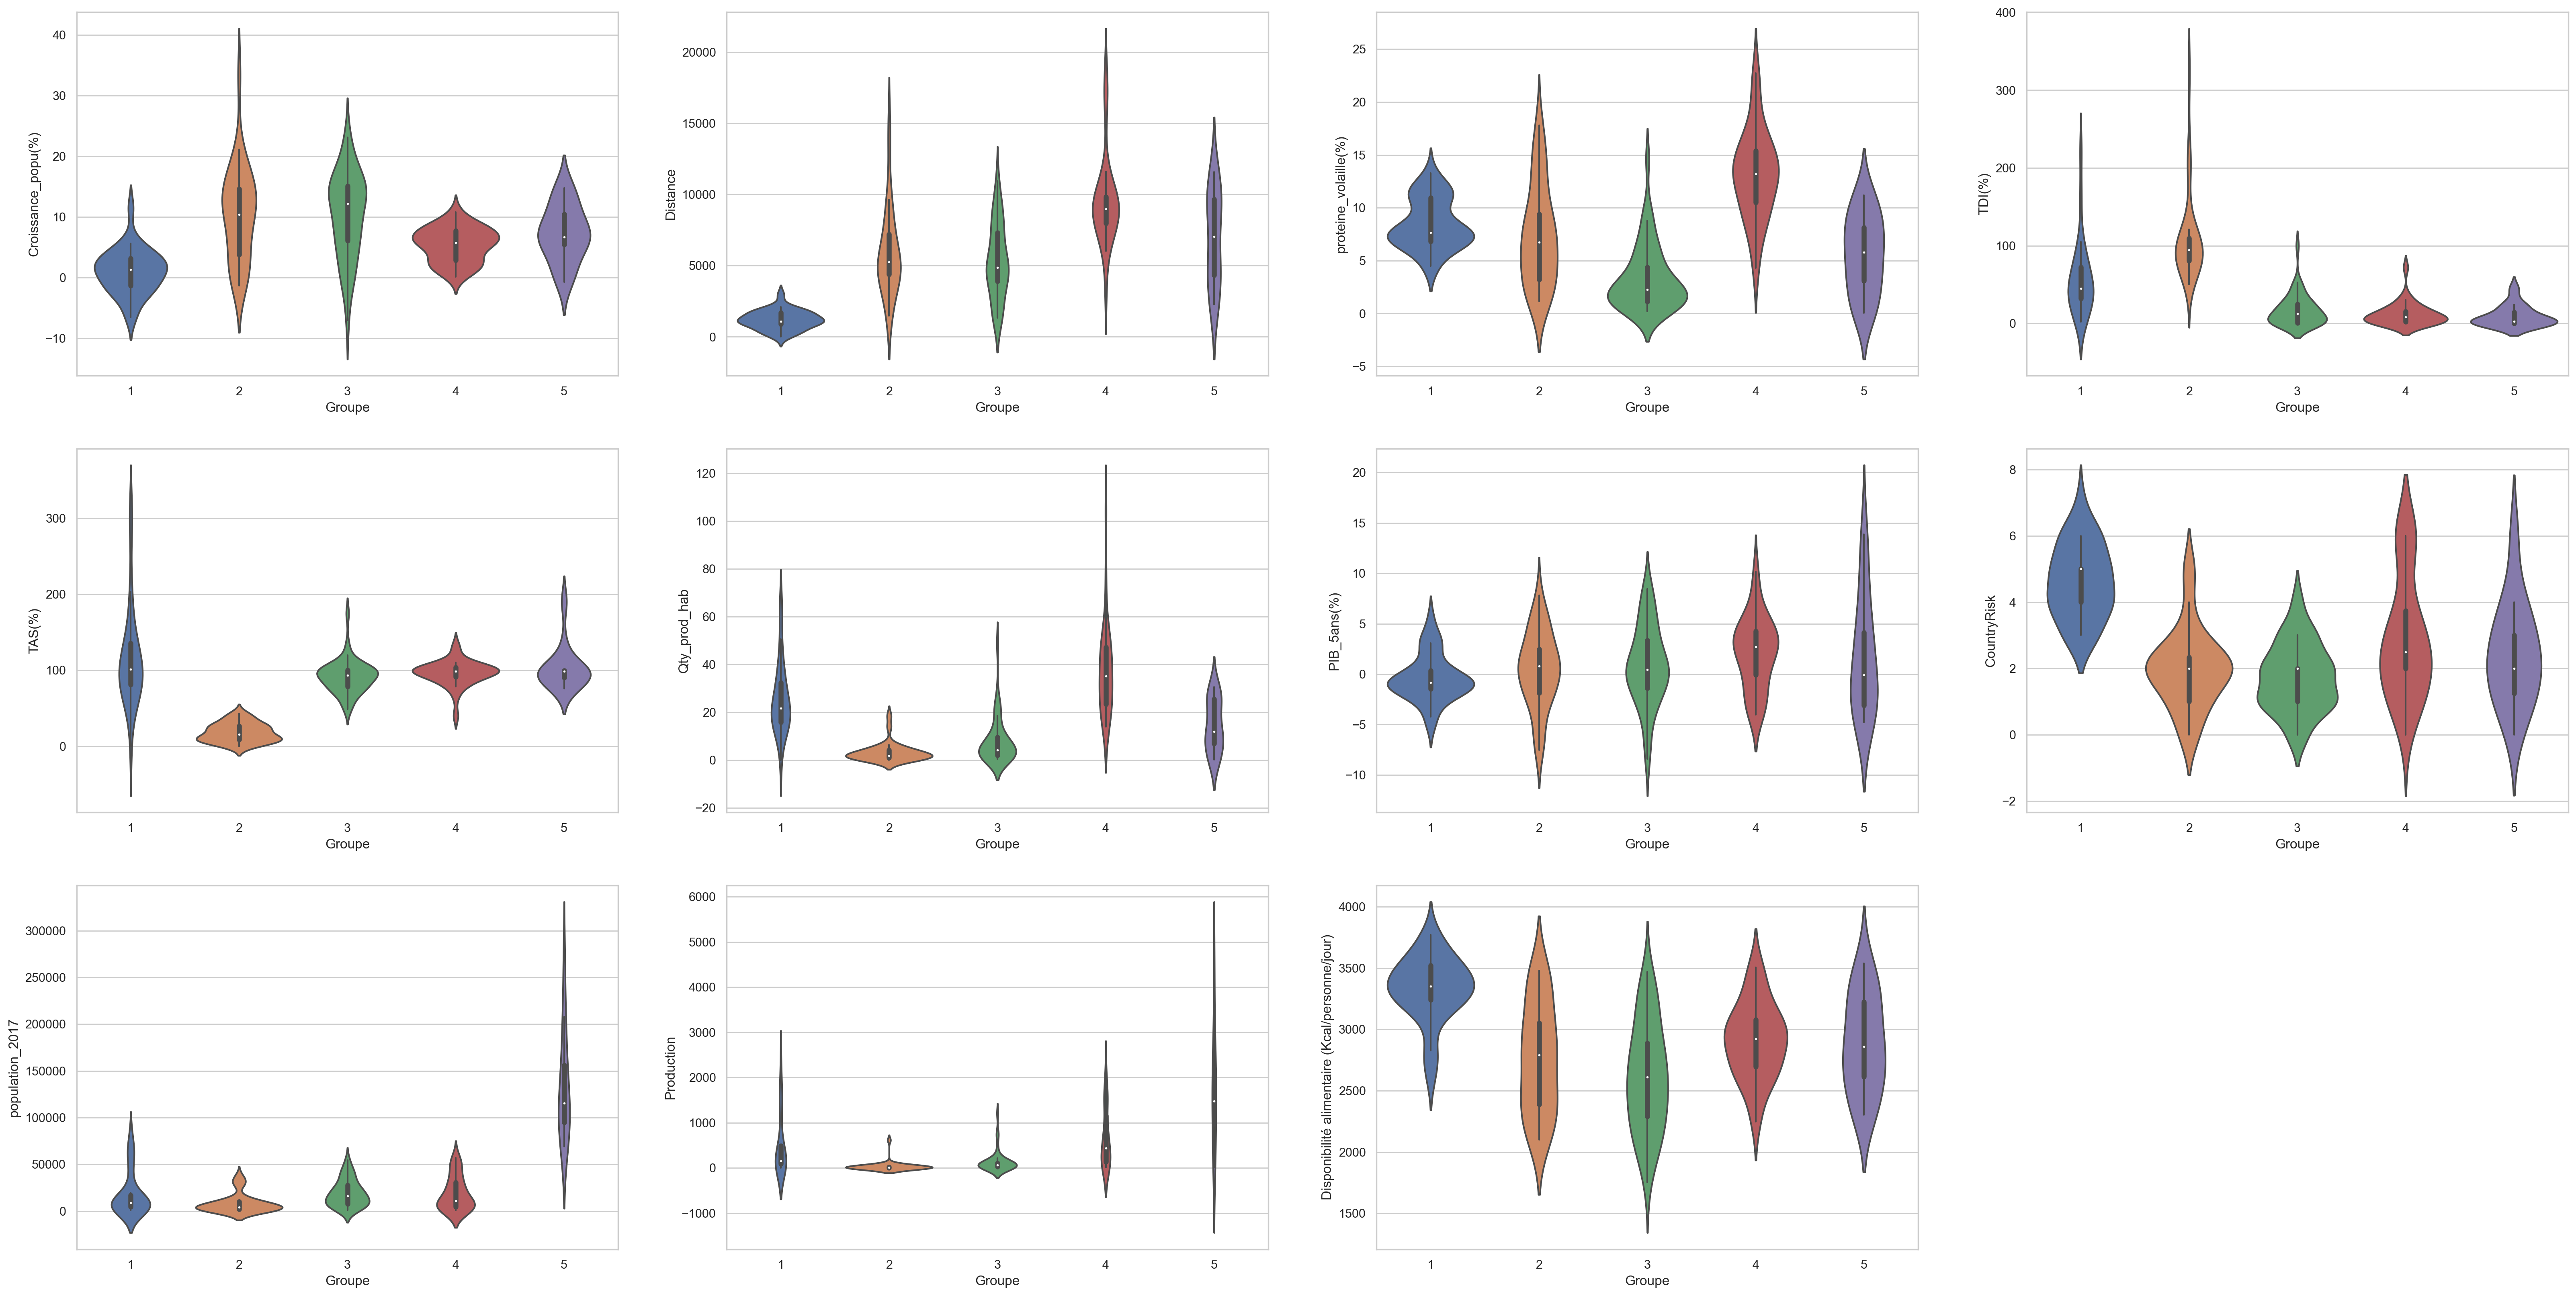

In [608]:
#Comparaison visuelle des groupes par violinplot, en abscisse les numéros des groupes
plt.figure(figsize=(40, 20))
sns.set(style="whitegrid")
plt.subplot(3,4,1)
sns.violinplot(data=df3, x='Groupe', y='Croissance_popu(%)')
plt.subplot(3,4,2)
sns.violinplot(data=df3, x='Groupe', y='Distance')
plt.subplot(3,4,3)
sns.violinplot(data=df3, x='Groupe', y='proteine_volaille(%)')
plt.subplot(3,4,4)
sns.violinplot(data=df3, x='Groupe', y='TDI(%)')
plt.subplot(3,4,5)
sns.violinplot(data=df3, x='Groupe', y='TAS(%)')
plt.subplot(3,4,6)
sns.violinplot(data=df3, x='Groupe', y='Qty_prod_hab')
plt.subplot(3,4,7)
sns.violinplot(data=df3, x='Groupe', y='PIB_5ans(%)')
plt.subplot(3,4,8)
sns.violinplot(data=df3, x='Groupe', y='CountryRisk') 
plt.subplot(3,4,9)
sns.violinplot(data=df3, x='Groupe', y='population_2017')
plt.subplot(3,4,10)
sns.violinplot(data=df3, x='Groupe', y='Production')
plt.subplot(3,4,11)
sns.violinplot(data=df3, x='Groupe', y='Disponibilité alimentaire (Kcal/personne/jour)')

plt.savefig('Distribution des variables par groupe.jpg')


#### Caractérisque pour chaque groupe

#### GROUPE 1

Ce groupe de pays présente les caractéristiques suivantes :

- Taux d'auto-suffisance le plus élevé
- Taux de dépendance à l'importation moyen
- Disponibilité alimentaire la plus élevé
- Croissance démographique la plus faible
- Le plus proche de la France
- Le CountryRisk a le score le plus élevé


#### GROUPE 2

Ce groupe de pays présente les caractéristiques suivantes :

- Le taux d'auto-suffisance le plus faible
- Le taux de dépendance à l'importation le plus élevé
- Une disponibilitaire alimentaire moyen
- Un crroissance démographique qui varie
- Loin de la France
- Le CountryRisk a le score moyen



#### GROUPE 3

Ce groupe de pays présente les caractéristiques suivantes :

- Un taux d'auto-suffisance relativement moyen
- Un taux de dépendance à l'importation faible
- Disponibilitaire alimentaire qui varie
- Une croissance démographique moyenne
- loin de la France
- Le CountryRisk a le score plus faible



#### GROUPE 4

Ce groupe de pays présente les caractéristiques suivantes :

- Un taux d'auto-suffisance relativement moyen
- Un taux de dépendance à l'importation faible
- Disponibilitaire alimentaire moyen
- Une croissance démographique moyenne
- plus loin de la France
- Le CountryRisk a le score qui varee



#### GROUPE 5

Ce groupe de pays présente les caractéristiques suivantes :

- Un taux d'auto-suffisance relativement moyen
- Un taux de dépendance à l'importation faible
- Disponibilité alimentaire moyen
- Une croissance démographique moyenne
- loin de la France
- Le CountryRisk a le score qui varie


In [609]:
# Moyenne pour chaque colonnes des variables
df3.mean()

Croissance_popu(%)                                    7.231816
population_2017                                   27334.474966
proteine_volaille(%)                                  7.398474
Production                                          441.090412
TDI(%)                                               42.241520
TAS(%)                                               82.724637
Disponibilité alimentaire (Kcal/personne/jour)     2868.824324
Qty_prod_hab                                         17.022666
PIB_5ans(%)                                           0.863720
CountryRisk                                           2.653326
EEA                                                   0.195946
Distance                                           5638.165372
Groupe                                                2.790541
dtype: float64

In [610]:
# Moyenne pour chqaue colonnes des variables pour chaque groupe
df3.groupby(["Groupe"]).mean()

Croissance_popu(%)  population_2017  proteine_volaille(%)  \
Groupe                                                              
1                 0.972926     18068.880034              8.465894   
2                10.465579      8300.350065              7.395255   
3                10.319278     19216.964114              3.329468   
4                 5.402992     18803.509967             13.182771   
5                 7.251640    132467.300143              5.587903   

         Production      TDI(%)      TAS(%)  \
Groupe                                        
1        513.551724   56.483878  115.152440   
2         36.451613  109.254367   17.976349   
3        138.527056   16.746563   91.552598   
4        661.973016   12.013188   96.186564   
5       1664.571429    9.255908  102.331966   

        Disponibilité alimentaire (Kcal/personne/jour)  Qty_prod_hab  \
Groupe                                                                 
1                                          3331.413793     25.838983   
2                                          2758.580645      3.172838   
3                                          2611.340909      7.750915   
4                                          2908.766667     37.583364   
5                                          2878.357143     14.508919   

        PIB_5ans(%)  CountryRisk  EEA     Distance  
Groupe                                              
1         -0.384796     4.620690  1.0  1192.110220  
2          0.428848     2.000620  0.0  5876.742948  
3          0.858487     1.719843  0.0  5329.596116  
4          2.103310     2.900000  0.0  9526.781586  
5          1.773045     2.428571  0.0  6956.612187

#### Quelles sont les groupes interessant ?
<br>
Deux groupes présentent des caractéristiques intéressantes pour notre objectif d'exportation :<br>

##### LE GROUPE 1
<br>
Au vu des caractéristiques de chaque groupe la combinaison la plus favorable à la selection du meilleur groupe en terme de correspondre notre critère est le groupe 1 et le groupe 3  :<br>
<br>
  - TAS (%)                           :  115.15<br>
  - TDI (%)                           :   56.48<br>
  - Croissance démographique (%)      :  0.97<br>
  - Disponibilité alimentaire         :   3331.41<br>
  - Pib (%)                           :   -0.38<br>
  - Distance à la France              :  1192.11<br>
  - CountryRisk                       :   4.62<br>
<br>
La situation de pays dans groupe 1 est relativement stable à tous égards.<br>
Leur taux d'autosuffisance et les taux d'importation se classent respectivement premier et deuxième dans les cinq groupes.<br>
Les disponibilités alimentaires sont élevée.<br>
Compte tenu de  coûts de transport, ce groupe de pays est le plus proche de la France et son score de Countryrisk représente le plus digne de confiance des investisseurs.<br>
Ce groupe est également membre de l' EEE , a l'avantage d'être exempt de droits d'importation.<br>
<br>  

##### LE GROUPE 2<br>
<br>
  - TAS (%)                           :   17.97<br>
  - TDI (%)                           :  109.25<br>
  - Croissance démographique (%)      :  10.46<br>
  - Disponibilité alimentaire         :  2758.58<br>
  - Pib (%)                           :   0.42<br>
  - Distance à la France              :   5876.74<br>
  - CountryRisk                       :   2.0<br>
<br>
Le choix de ce groupe de pays s'explique par le fait que leur taux d'autosuffisance est le plus faible et que le taux d'importation est le plus élevé. <br>
<br>
Leur disponibilité alimentaire est relativement moyenne.<br>
Leurs scores countryRisk sont relativement faibles, mais nous voulons sélectionner ce groupe en examinant les pays potentiels pour exportation autres que les membres de l'EEE.<br>
<br>


##### Heatmap des croisements entre les clusters

On cherche á vérifier visuelement le partitionement des clusters

In [611]:
df_3 = df3.drop(columns=['Groupe'],axis=1,inplace=False)
df_3

Croissance_popu(%)  population_2017  \
Zone                                                       
Afghanistan                   16.477889        36296.113   
Afrique du Sud                 7.906280        57009.756   
Albanie                       -1.026974         2884.169   
Algérie                       10.713956        41389.189   
Allemagne                      2.081915        82658.409   
...                                 ...              ...   
Égypte                        11.594640        96442.591   
Émirats arabes unis            3.780598         9487.203   
Équateur                       8.473901        16785.361   
Éthiopie                      14.745372       106399.924   
Îles Salomon                  14.382543          636.039   

                     proteine_volaille(%)  Production      TDI(%)      TAS(%)  \
Zone                                                                            
Afghanistan                      0.998336        28.0   50.877193   49.122807   
Afrique du Sud                  16.926583      1667.0   24.268178   78.706327   
Albanie                          5.238494        13.0   80.851064   27.659574   
Algérie                          2.121702       275.0    0.722022   99.277978   
Allemagne                        7.648698      1514.0   48.418631   87.061530   
...                                   ...         ...         ...         ...   
Égypte                           4.684741      1118.0    8.800000   89.440000   
Émirats arabes unis             13.798247        48.0  105.097087   11.650485   
Équateur                         9.350768       340.0    0.000000   99.706745   
Éthiopie                         0.060938        14.0    7.142857  100.000000   
Îles Salomon                     2.815063         0.0  200.000000    0.000000   

                     Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                  
Afghanistan                                                  1997.0   
Afrique du Sud                                               2987.0   
Albanie                                                      3400.0   
Algérie                                                      3345.0   
Allemagne                                                    3559.0   
...                                                             ...   
Égypte                                                       3315.0   
Émirats arabes unis                                          3370.0   
Équateur                                                     2585.0   
Éthiopie                                                     2304.0   
Îles Salomon                                                 2410.0   

                     Qty_prod_hab  PIB_5ans(%)  CountryRisk  EEA      Distance  
Zone                                                                            
Afghanistan              0.771432    -1.556597     0.000000    0   5594.223377  
Afrique du Sud          29.240609    -3.981301     2.000000    0   9306.638530  
Albanie                  4.507364     0.723746     1.000000    0   1603.944535  
Algérie                  6.644247    -4.103502     2.000000    0   1345.460397  
Allemagne               18.316346    -0.328481     5.000000    1    880.634838  
...                           ...          ...          ...  ...           ...  
Égypte                  11.592389    -3.557297     2.000000    0   3211.894954  
Émirats arabes unis      5.059447     0.798578     5.000000    0   5251.803242  
Équateur                20.255745     3.110131     2.000000    0   9626.173816  
Éthiopie                 0.131579    13.872441     2.000000    0   5566.295819  
Îles Salomon             0.000000     2.903426     2.673077    0  15164.476423  

[148 rows x 12 columns]

<Figure size 800x800 with 0 Axes>

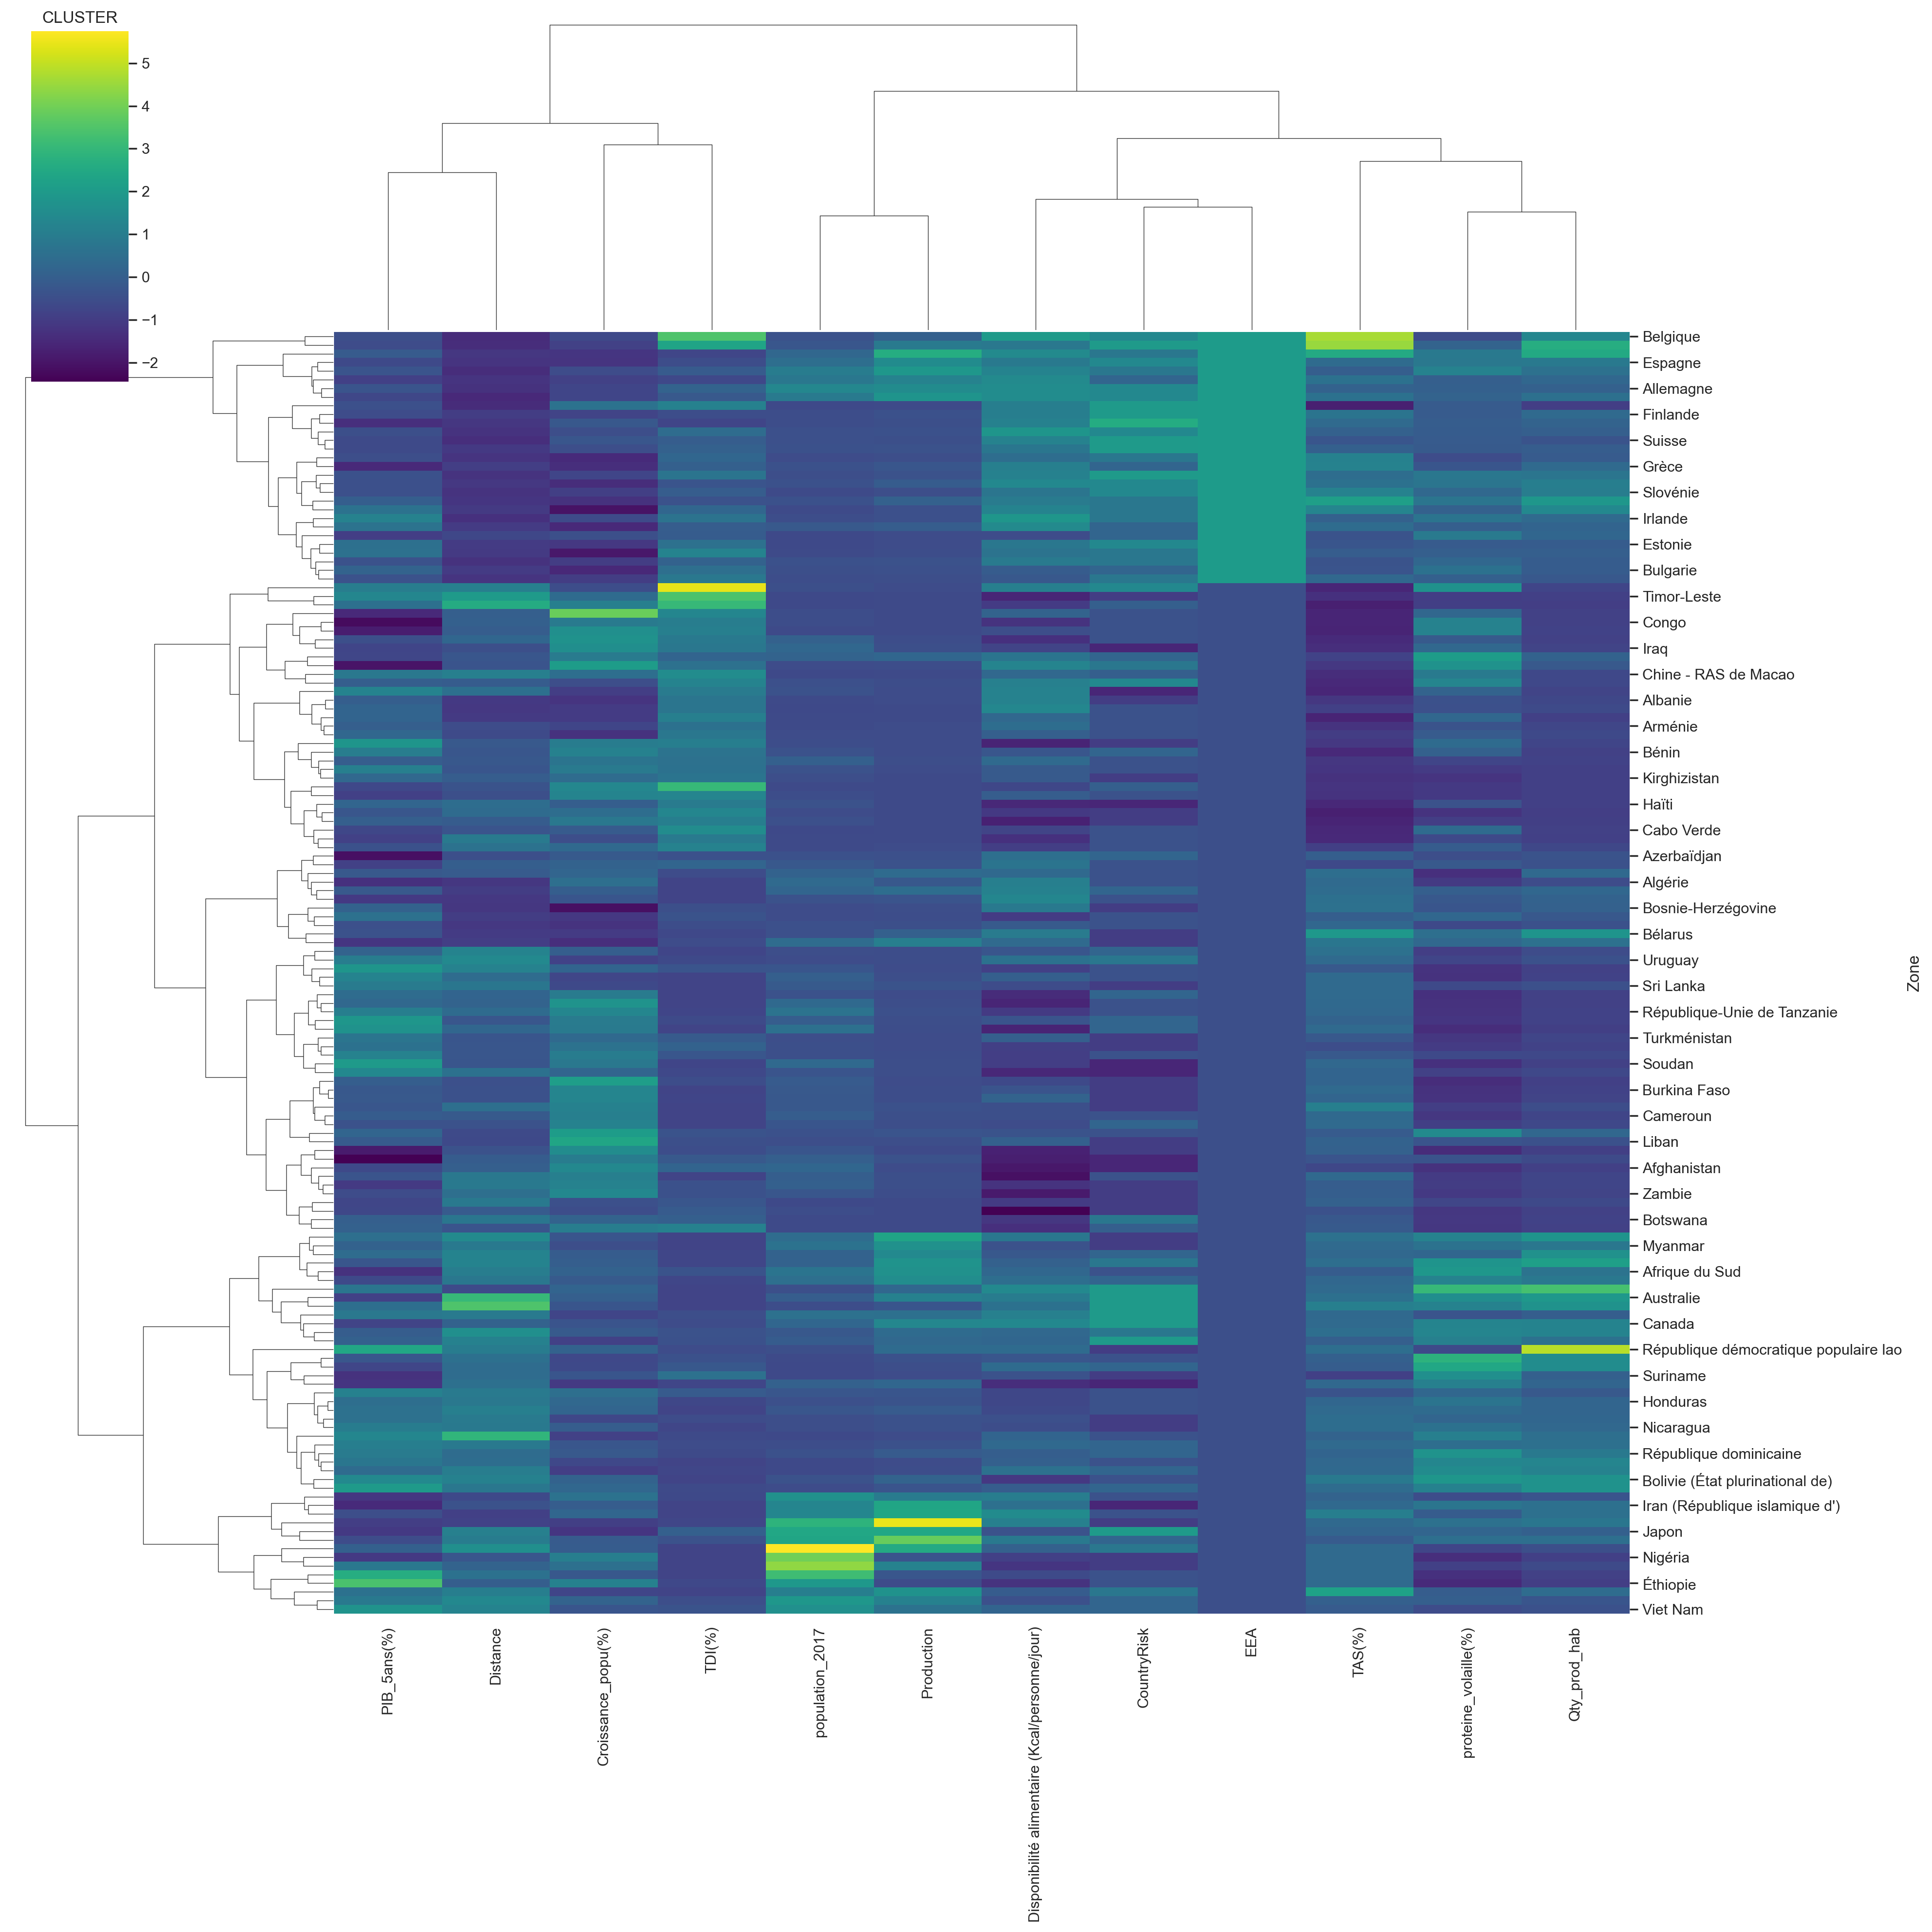

In [612]:
# Heatmap avec les croisements entre les clusters de pays et les différentes variables
plt.figure(figsize=(8, 8))
# sns.clustermap(df_3, cmap = 'viridis',method = 'ward',metric = 'euclidean',standard_scale =1,figsize = (20, 20))
# sns.clustermap(df_3, cmap = 'viridis',method = 'ward',metric = 'euclidean',standard_scale =1,figsize = (20, 20))
sns.clustermap(df_3,cmap = 'viridis',method = 'ward', z_score=1,figsize = (20, 20))
plt.title('CLUSTER')
plt.savefig('Heatmap Cluster.jpg')


La heatmap met bien en évidence la combinaison du cluster 1 et cluster 2 avec les variables (indicateurs) :


Groupe 1: 

     - TDI élevé
     - TAS élevé
     - Croissance démographique faible
     - Country Risk élevé
     - Disponibilités élevé
     - Plus proche de la France 
     - Membre de l'EEE


Groupe 2:

     - TDI élevé
     - TAS faible
     - Croissance démographique moyen
     - Country Risk moyen
     - Disponibilités moyen
     - moyen proche de la France 

Le groupe 1 et 2 semblent correspondrent plus ou moins à nos critére. Nous continuons notre analyse suivante par la méthode ACP pour cibler les pays pertinents. Mais avant cela, on souhaite essayer aussi la méthode k-means, afin e comparer.


# METHODE K-MEANS
La methode k-means demande à donner explicitement le nombre de clusters a générer.
On recherche et vérifie le nombre de clusters à choisir.



### Méthod du Coude & Silhouette Coefficient & Gap statistic
On peut abserver les effets des choix de differents linkages.
- Methode du coude (Elbow method (WSS, within sum of square ))
- Silhouette Coefficient

In [613]:
#Préparation des données pour le clustering K-Means
#Transformation en array Numpy
X = tmp3.values

In [614]:
#Centrage / réduction des données
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

c:\Users\yutin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Coefficient de silhouette')

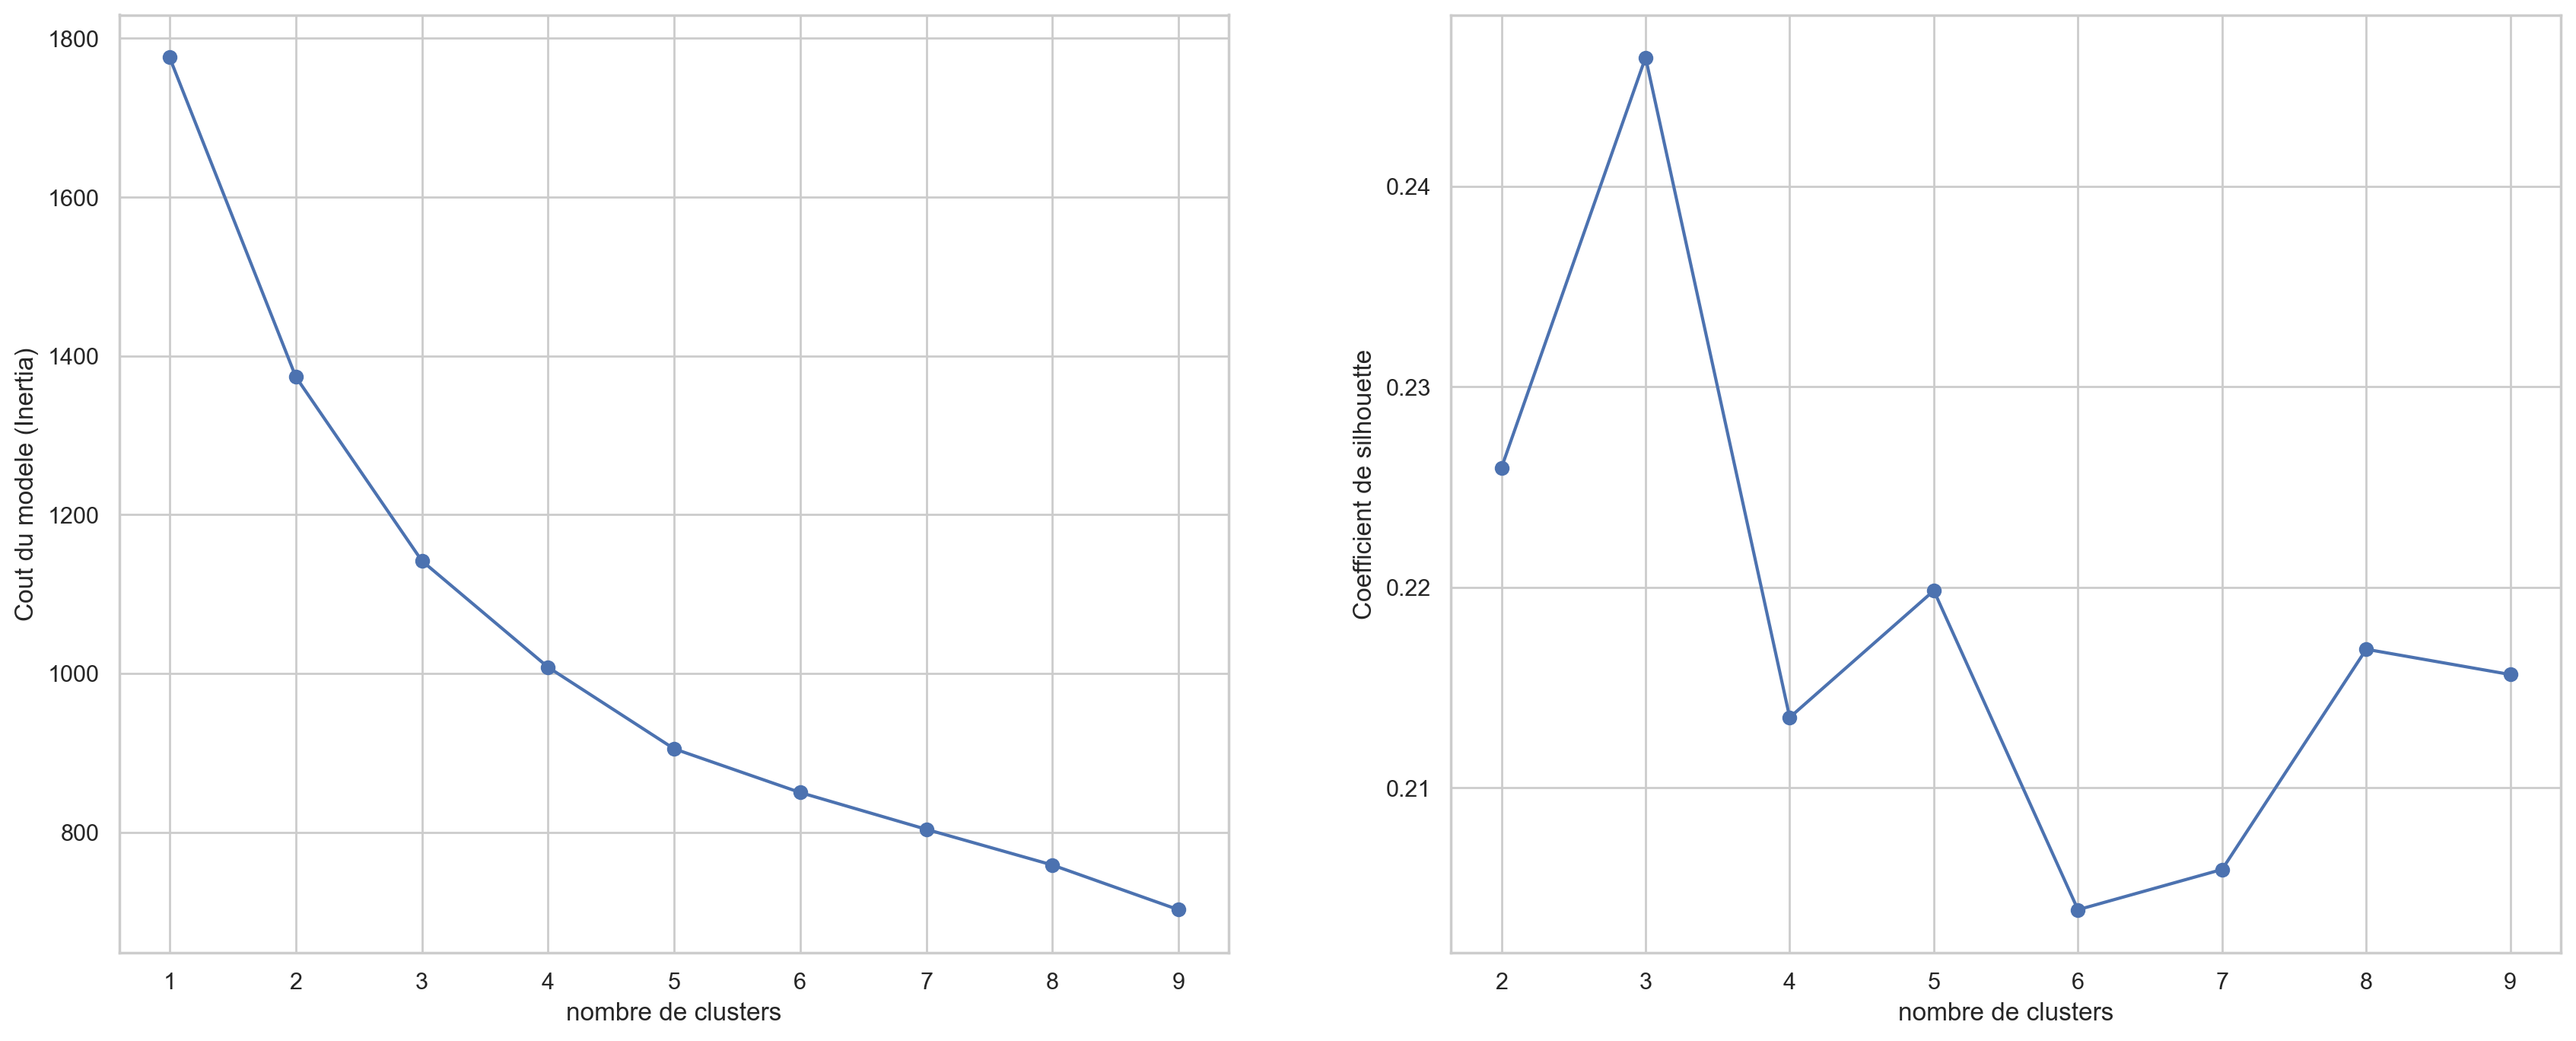

In [615]:
plt.figure(figsize=(32, 8))
sns.set(style="whitegrid")
plt.subplot(1,3,1)
plt.xlabel('A')
#On crée une liste dans laquelle on stocke les inerties 
inertia = []

#On fait une boucle de 2 à 9 pour tester toutes ces possibiliéts
k_range=range(1,10)
for k in k_range:
    #pour chaque k, on crée un modèle et on l’ajuste
    model=KMeans(n_clusters=k).fit(X_scaled)
    #on stocke l’inertie associée
    inertia.append(model.inertia_)

#Visualisation des valeurs d'inertie pour chaque nombre de cluster
plt.plot(k_range,inertia, marker='o' )
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')

#--------------------------------------------------------------------------------
#Calcul  de la métrique "silhouette" pour différents nombres de groupes issus de la méthode des centres mobiles
#Liste pour stocker nos coefficients
plt.subplot(1,3,2)
plt.xlabel('B')
tab_silhouette =[]
#Boucle itérative de 2 à 10 (clusters) pour tester les possibilités
k_range=range(2,10)
for k in k_range:
     #Création et ajustement d'un modèle pour chaque k
    model=KMeans(n_clusters=k)
    cluster_labels=model.fit_predict(X_scaled)
    #Stockage des coefficients associés
    tab_silhouette.append(sklearn.metrics.silhouette_score(X_scaled,cluster_labels))

#Visualisation des valeurs de coefficient de silhouette pour chaque nombre de cluster
plt.plot(k_range,tab_silhouette,marker='o')
plt.xlabel('nombre de clusters')
plt.ylabel('Coefficient de silhouette')

In [616]:
# Gap statistic
optimalk = OptimalK()
optimalk(X_scaled,cluster_array=[1,2,3,4,5,6,7,8,9])

9

Ici, on choisit 3 clusters pour K-means

In [399]:
#Clustering K-Means en 3 clusters
cls3 = KMeans(n_clusters=3)
cls3.fit(X_scaled)
labels_kmeans_3_clusters = cls3.labels_ # array 可以幫助每一個cluster有自己的順序(提取組內容必用)


In [400]:
labels_kmeans_3_clusters

array([0, 1, 0, 0, 2, 0, 1, 1, 0, 1, 2, 0, 0, 2, 1, 1, 0, 2, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 2, 0, 0, 2, 1, 2, 2, 0, 1, 2, 2,
       1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 2, 1, 1, 0, 2, 1, 2, 1, 1, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 2, 1, 2, 2, 1, 2, 2, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0])

##### Affichage des clusters et des centroides

In [401]:
# Les pays qui sont les plus proche de centroides pour clustering en 3 groupes
model = cls3
closest,_ = metrics.pairwise_distances_argmin_min(model.cluster_centers_, X_scaled) 

In [402]:
for i in range(1,closest.size +1):
    idx =closest[i-1]
    print("Groupe " + str(i)  +" : " + str(df_check_closest.iloc[idx,0]) )

Groupe 1 : Sierra Leone
Groupe 2 : Colombie
Groupe 3 : Slovénie


In [403]:
df_check_closest = tmp3.reset_index()
df_check_closest["Kmeans3groupe"] = labels_kmeans_3_clusters
df_check_closest.head()

Zone  Croissance_popu(%)  population_2017  proteine_volaille(%)  \
0     Afghanistan           16.477889        36296.113              0.998336   
1  Afrique du Sud            7.906280        57009.756             16.926583   
2         Albanie           -1.026974         2884.169              5.238494   
3         Algérie           10.713956        41389.189              2.121702   
4       Allemagne            2.081915        82658.409              7.648698   

   Production     TDI(%)     TAS(%)  \
0        28.0  50.877193  49.122807   
1      1667.0  24.268178  78.706327   
2        13.0  80.851064  27.659574   
3       275.0   0.722022  99.277978   
4      1514.0  48.418631  87.061530   

   Disponibilité alimentaire (Kcal/personne/jour)  Qty_prod_hab  PIB_5ans(%)  \
0                                          1997.0      0.771432    -1.556597   
1                                          2987.0     29.240609    -3.981301   
2                                          3400.0      4.507364     0.723746   
3                                          3345.0      6.644247    -4.103502   
4                                          3559.0     18.316346    -0.328481   

   CountryRisk  EEA     Distance  Kmeans3groupe  
0          0.0    0  5594.223377              0  
1          2.0    0  9306.638530              1  
2          1.0    0  1603.944535              0  
3          2.0    0  1345.460397              0  
4          5.0    1   880.634838              2

In [404]:
# Cluster 1 (73 pays)
km_cluster_1=df_check_closest.loc[df_check_closest['Kmeans3groupe']==0]
km_cluster_1.shape

(73, 14)

In [405]:
# Cluster 2 (46 pays)
km_cluster_2=df_check_closest.loc[df_check_closest['Kmeans3groupe']==1]
km_cluster_2.shape

(46, 14)

In [406]:
# Cluster 3 (29 pays)
km_cluster_3=df_check_closest.loc[df_check_closest['Kmeans3groupe']==2]
km_cluster_3.shape

(29, 14)

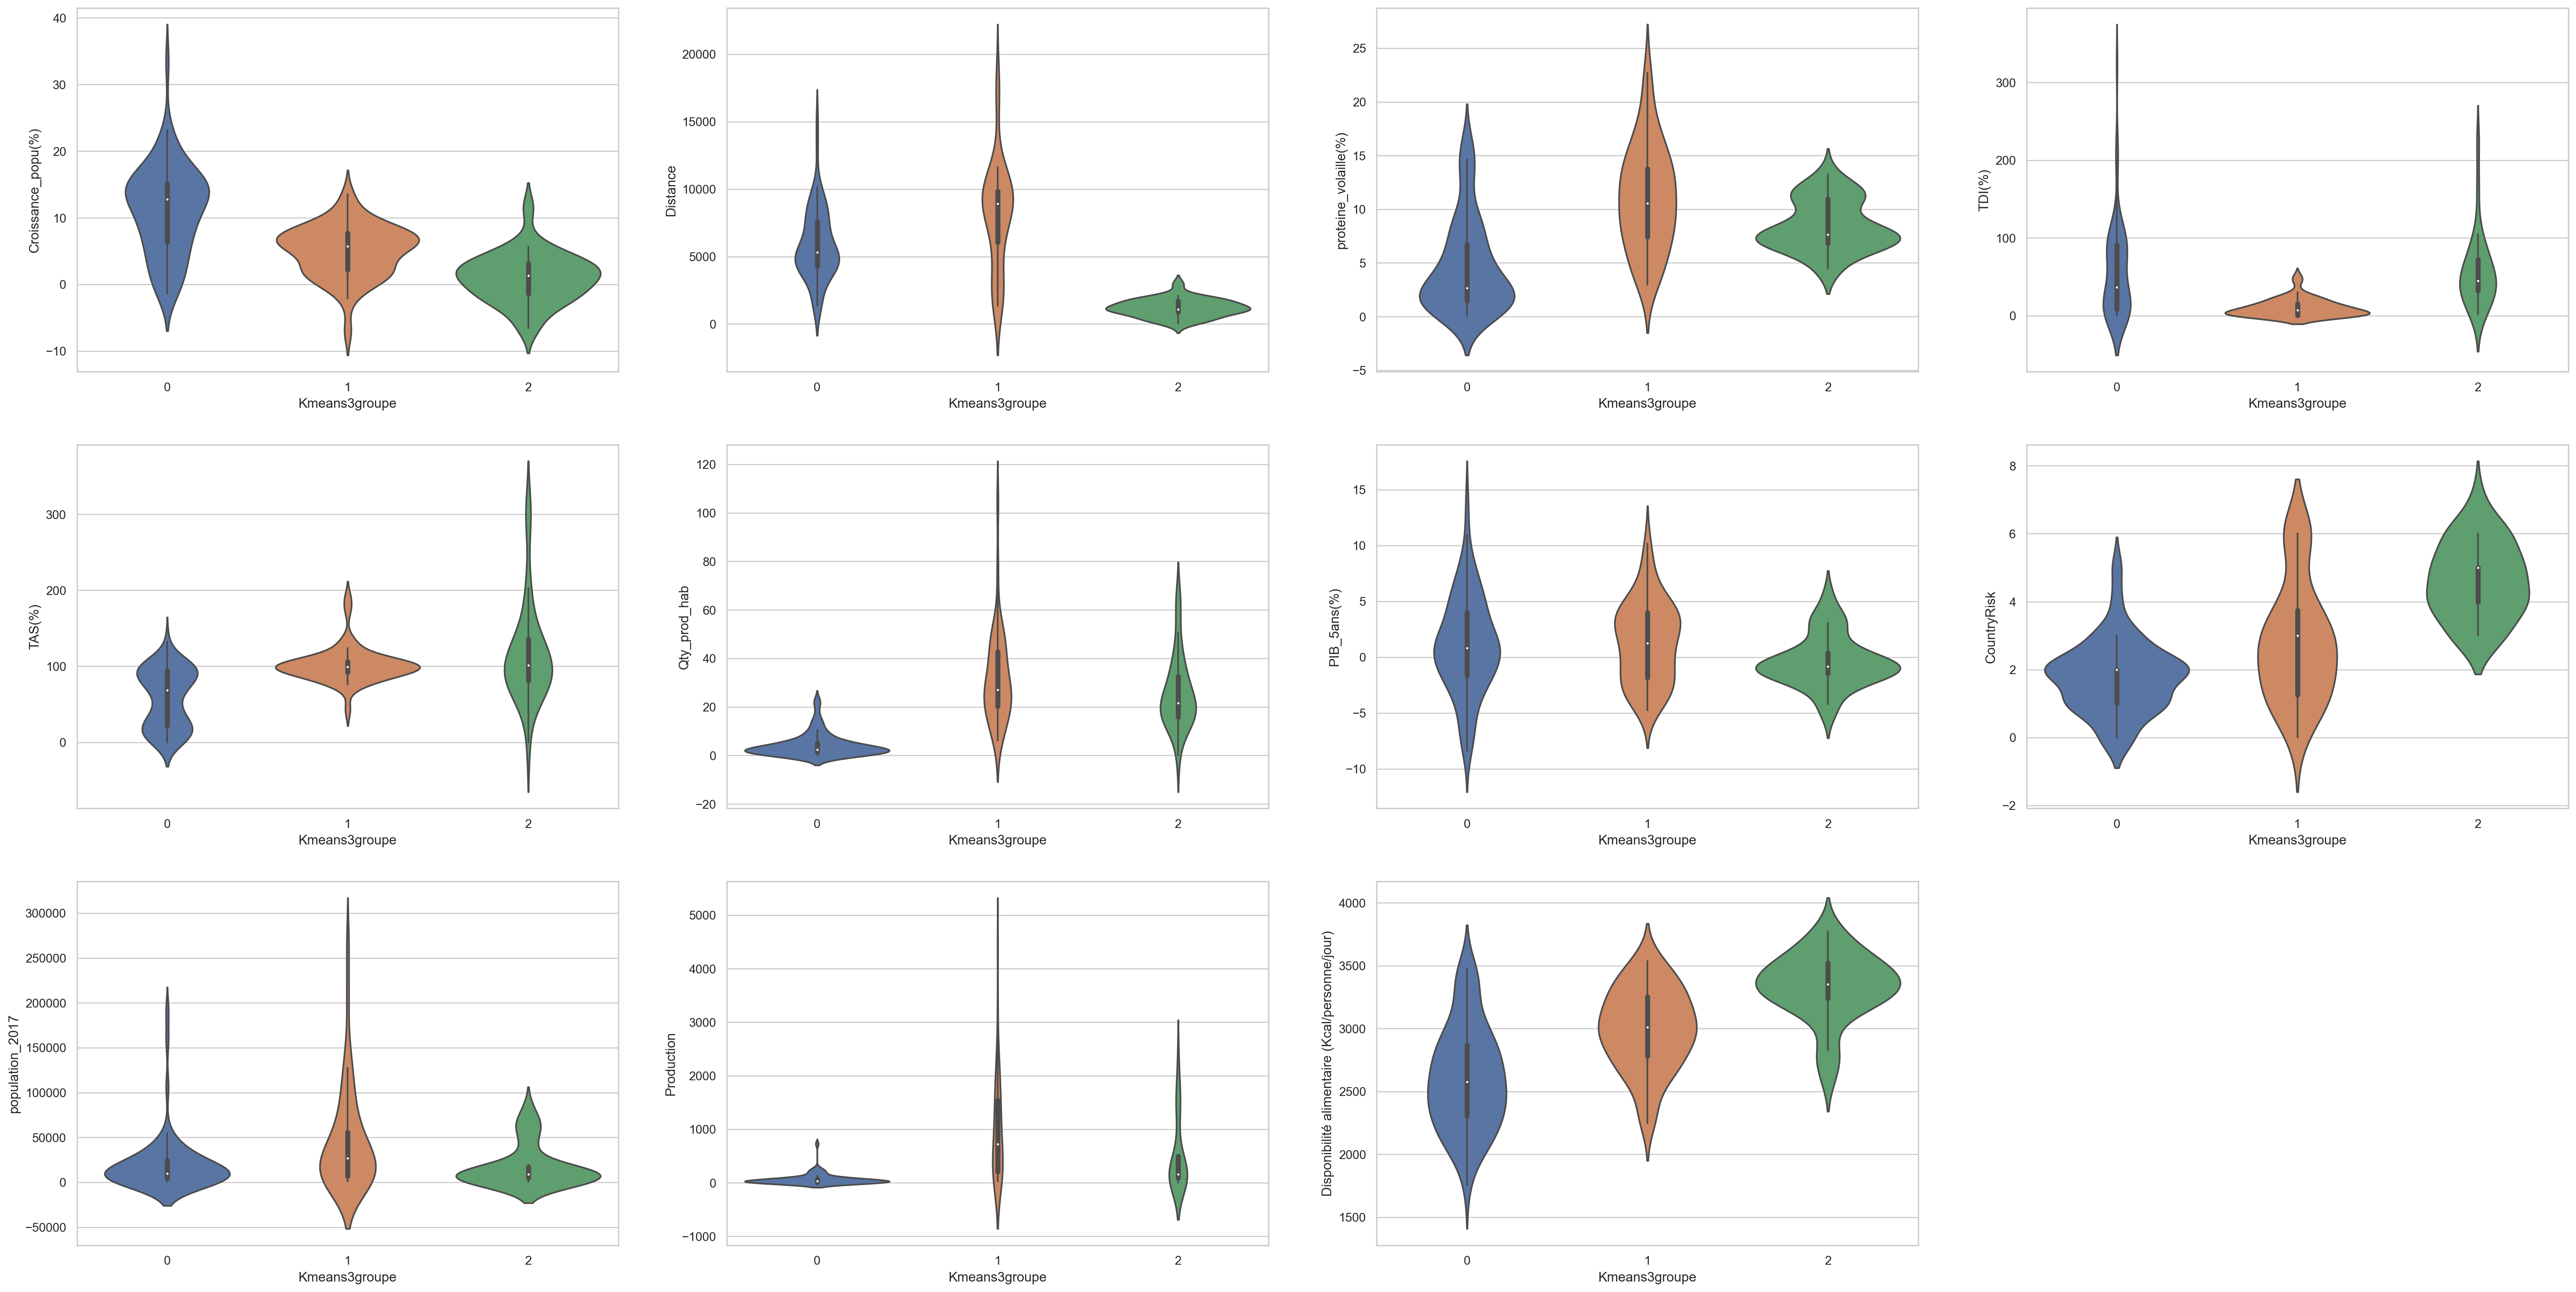

In [407]:
#Comparaison visuelle des groupes par violinplot, en abscisse les numéros des groupes
plt.figure(figsize=(40, 20))
sns.set(style="whitegrid")
plt.subplot(3,4,1)
sns.violinplot(data=df_check_closest, x='Kmeans3groupe', y='Croissance_popu(%)')
plt.subplot(3,4,2)
sns.violinplot(data=df_check_closest, x='Kmeans3groupe', y='Distance')
plt.subplot(3,4,3)
sns.violinplot(data=df_check_closest, x='Kmeans3groupe', y='proteine_volaille(%)')
plt.subplot(3,4,4)
sns.violinplot(data=df_check_closest, x='Kmeans3groupe', y='TDI(%)')
plt.subplot(3,4,5)
sns.violinplot(data=df_check_closest, x='Kmeans3groupe', y='TAS(%)')
plt.subplot(3,4,6)
sns.violinplot(data=df_check_closest, x='Kmeans3groupe', y='Qty_prod_hab')
plt.subplot(3,4,7)
sns.violinplot(data=df_check_closest, x='Kmeans3groupe', y='PIB_5ans(%)')
plt.subplot(3,4,8)
sns.violinplot(data=df_check_closest, x='Kmeans3groupe', y='CountryRisk') 
plt.subplot(3,4,9)
sns.violinplot(data=df_check_closest, x='Kmeans3groupe', y='population_2017')
plt.subplot(3,4,10)
sns.violinplot(data=df_check_closest, x='Kmeans3groupe', y='Production')
plt.subplot(3,4,11)
sns.violinplot(data=df_check_closest, x='Kmeans3groupe', y='Disponibilité alimentaire (Kcal/personne/jour)')

plt.savefig('Distribution des variables par groupe.jpg')


##### Clustering K-Means en 5 clusters

On fait un clustering en 5 groupes avec k-means, pour mieux comparer au clustering de CAH ( qui est aussi en 5 clusters)

In [408]:
#Clustering K-Means en 5 clusters
cls5 = KMeans(n_clusters=5)
cls5.fit(X_scaled)
labels_kmeans_5_clusters = cls5.labels_ # array 可以幫助每一個cluster有自己的順序(提取組內容必用)

In [409]:
# Les pays qui sont les plus proche de centroides pour clustering en 5 groupes
model = cls5
closest,_ = metrics.pairwise_distances_argmin_min(model.cluster_centers_, X_scaled) 

In [410]:
for i in range(1,closest.size +1):
    idx =closest[i-1]
    print("Groupe " + str(i)  +" : " + str(df_check_closest.iloc[idx,0]) )

Groupe 1 : Namibie
Groupe 2 : Chili
Groupe 3 : Slovénie
Groupe 4 : Cameroun
Groupe 5 : Philippines


In [411]:
df_check_closest = tmp3.reset_index()
df_check_closest["Kmeans5groupe"] = labels_kmeans_5_clusters
df_check_closest.head()

Zone  Croissance_popu(%)  population_2017  proteine_volaille(%)  \
0     Afghanistan           16.477889        36296.113              0.998336   
1  Afrique du Sud            7.906280        57009.756             16.926583   
2         Albanie           -1.026974         2884.169              5.238494   
3         Algérie           10.713956        41389.189              2.121702   
4       Allemagne            2.081915        82658.409              7.648698   

   Production     TDI(%)     TAS(%)  \
0        28.0  50.877193  49.122807   
1      1667.0  24.268178  78.706327   
2        13.0  80.851064  27.659574   
3       275.0   0.722022  99.277978   
4      1514.0  48.418631  87.061530   

   Disponibilité alimentaire (Kcal/personne/jour)  Qty_prod_hab  PIB_5ans(%)  \
0                                          1997.0      0.771432    -1.556597   
1                                          2987.0     29.240609    -3.981301   
2                                          3400.0      4.507364     0.723746   
3                                          3345.0      6.644247    -4.103502   
4                                          3559.0     18.316346    -0.328481   

   CountryRisk  EEA     Distance  Kmeans5groupe  
0          0.0    0  5594.223377              3  
1          2.0    0  9306.638530              1  
2          1.0    0  1603.944535              0  
3          2.0    0  1345.460397              3  
4          5.0    1   880.634838              2

In [412]:
# Cluster 1 (32 pays)
km_cluster1 =df_check_closest.loc[df_check_closest['Kmeans5groupe']==0]
km_cluster1.shape

(32, 14)

In [413]:
# Cluster 2 (30 pays)
km_cluster2 =df_check_closest.loc[df_check_closest['Kmeans5groupe']==1]
km_cluster2.shape

(30, 14)

In [414]:
# Cluster 3 (29 pays)
km_cluster3 =df_check_closest.loc[df_check_closest['Kmeans5groupe']==2]
km_cluster3.shape

(29, 14)

In [415]:
# Cluster 4 (43 pays)
km_cluster4 =df_check_closest.loc[df_check_closest['Kmeans5groupe']==3]
km_cluster4.shape

(43, 14)

In [416]:
# Cluster 5 (14 pays)
km_cluster5 =df_check_closest.loc[df_check_closest['Kmeans5groupe']==4]
km_cluster5.shape

(14, 14)

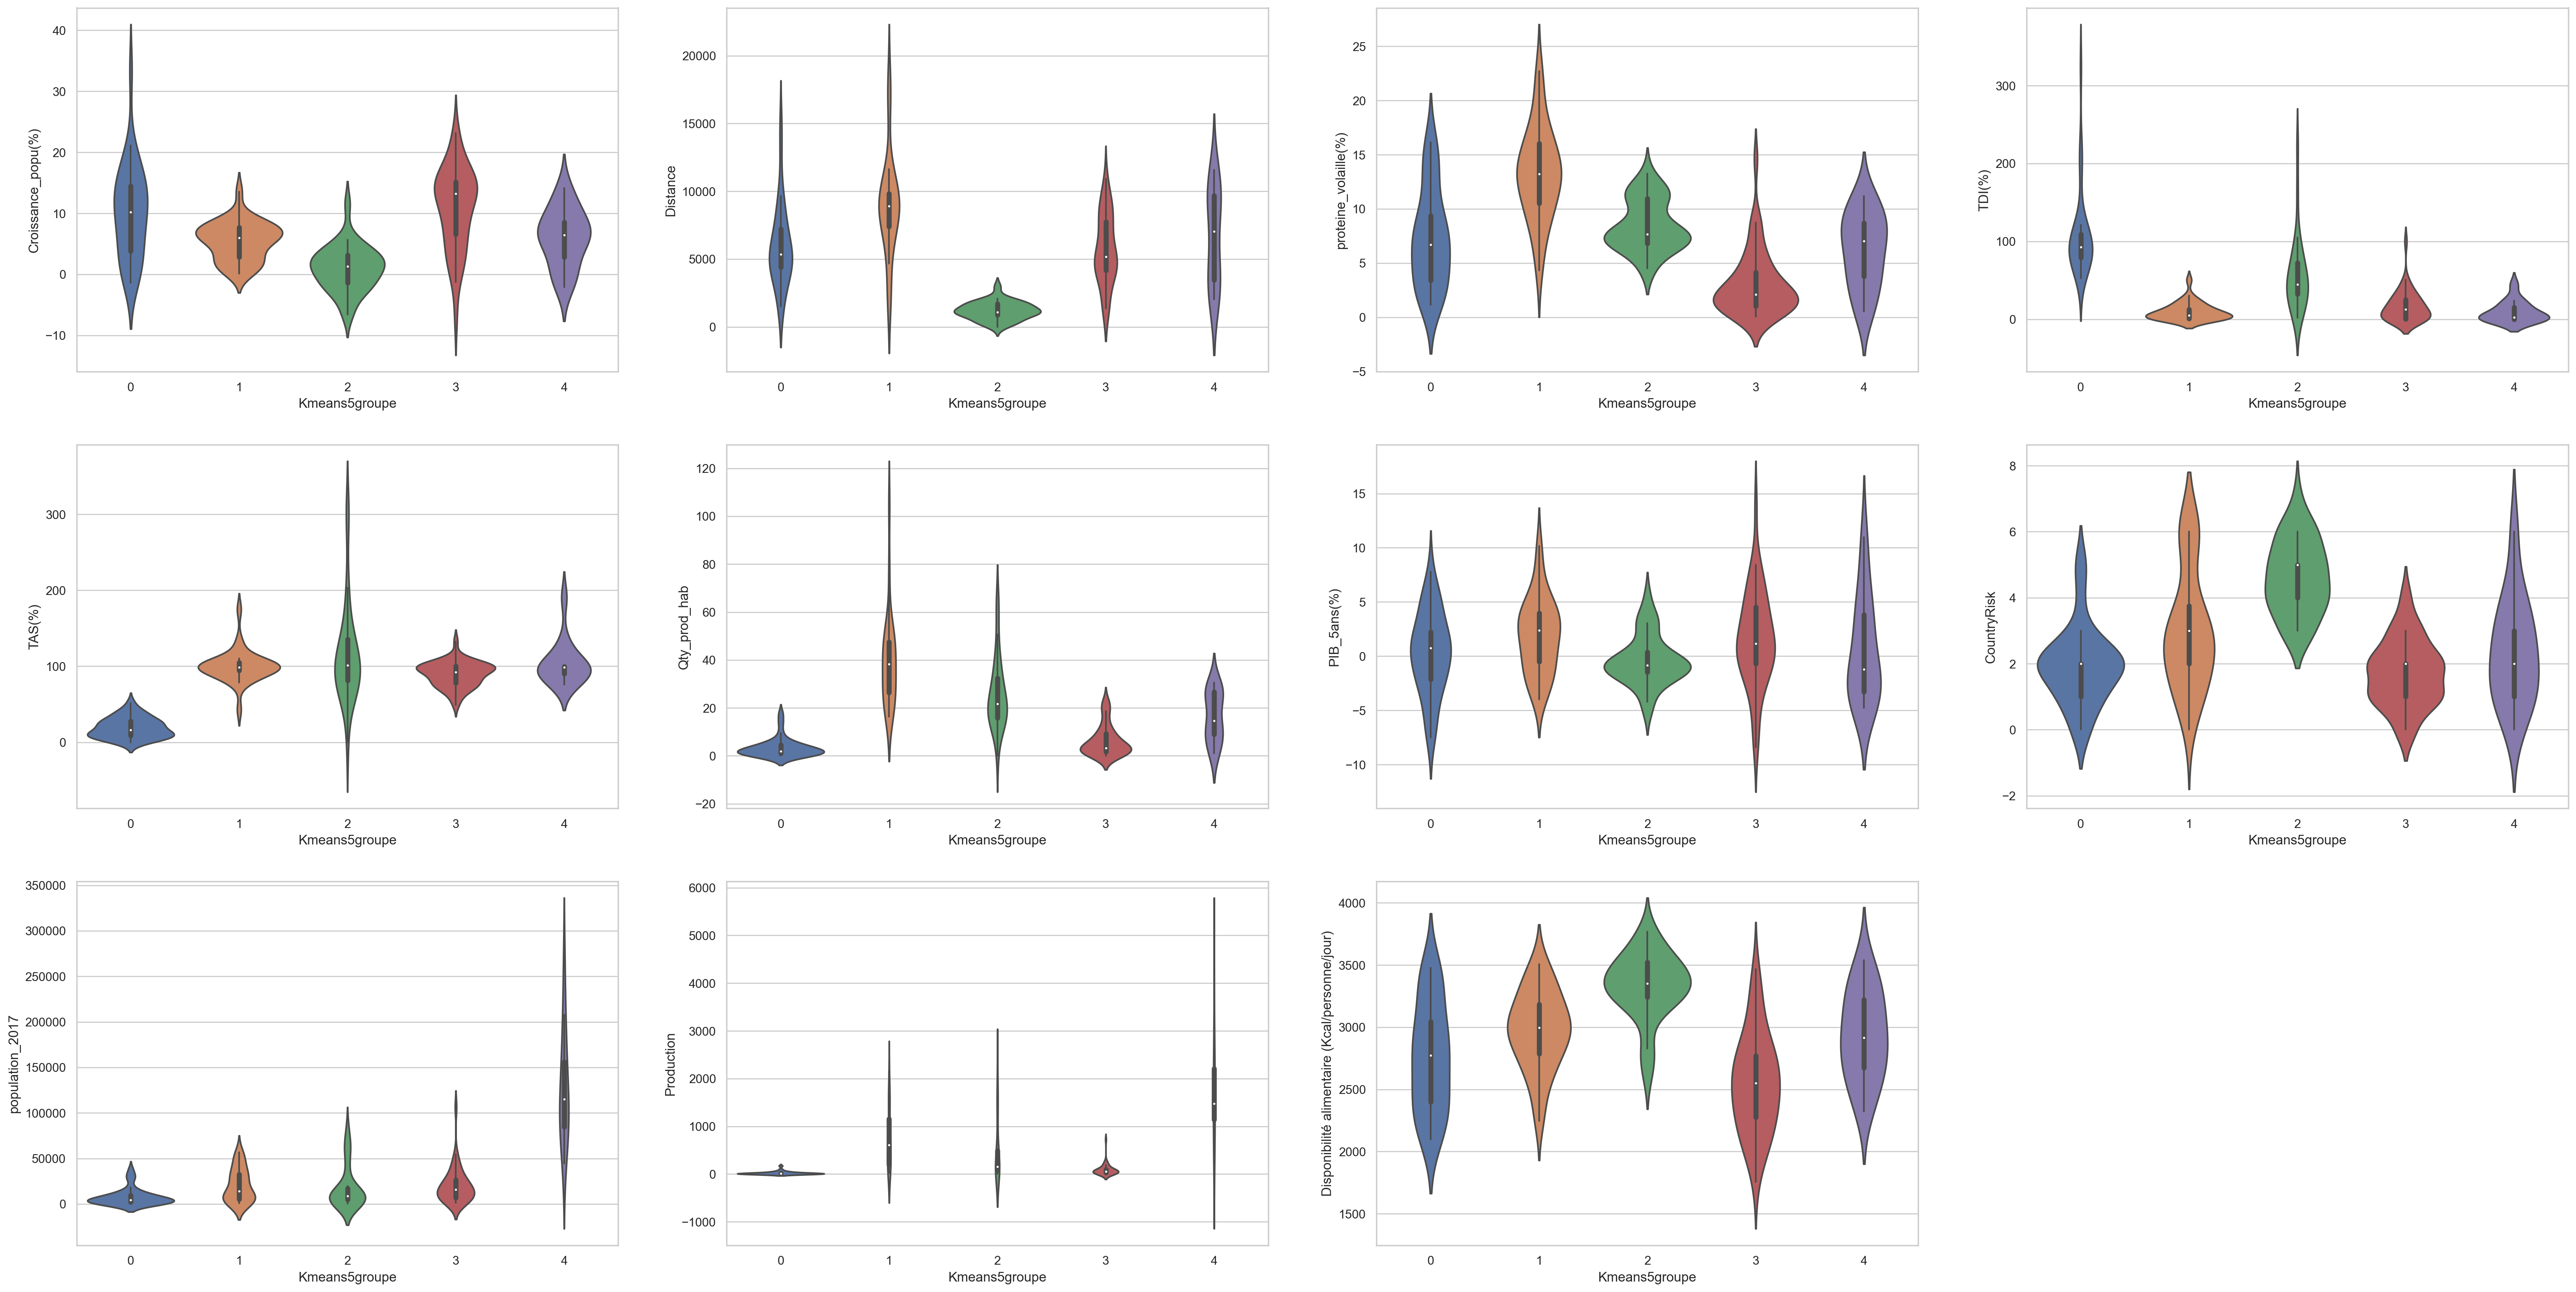

In [417]:
#Comparaison visuelle des groupes par violinplot, en abscisse les numéros des groupes
plt.figure(figsize=(40, 20))
sns.set(style="whitegrid")
plt.subplot(3,4,1)
sns.violinplot(data=df_check_closest, x='Kmeans5groupe', y='Croissance_popu(%)')
plt.subplot(3,4,2)
sns.violinplot(data=df_check_closest, x='Kmeans5groupe', y='Distance')
plt.subplot(3,4,3)
sns.violinplot(data=df_check_closest, x='Kmeans5groupe', y='proteine_volaille(%)')
plt.subplot(3,4,4)
sns.violinplot(data=df_check_closest, x='Kmeans5groupe', y='TDI(%)')
plt.subplot(3,4,5)
sns.violinplot(data=df_check_closest, x='Kmeans5groupe', y='TAS(%)')
plt.subplot(3,4,6)
sns.violinplot(data=df_check_closest, x='Kmeans5groupe', y='Qty_prod_hab')
plt.subplot(3,4,7)
sns.violinplot(data=df_check_closest, x='Kmeans5groupe', y='PIB_5ans(%)')
plt.subplot(3,4,8)
sns.violinplot(data=df_check_closest, x='Kmeans5groupe', y='CountryRisk') 
plt.subplot(3,4,9)
sns.violinplot(data=df_check_closest, x='Kmeans5groupe', y='population_2017')
plt.subplot(3,4,10)
sns.violinplot(data=df_check_closest, x='Kmeans5groupe', y='Production')
plt.subplot(3,4,11)
sns.violinplot(data=df_check_closest, x='Kmeans5groupe', y='Disponibilité alimentaire (Kcal/personne/jour)')

plt.savefig('Distribution des variables par groupe.jpg')

La méthode de K-mean est non deterministe. A chaque fois, les clusters deviennent légèrement différents.

# Analyse en composantes principales (ACP)

  - On affiche le diagramme qui décrit le pourcentage d’inertie totale associé à chaque axe.
  - On affiche également une courbe qui représente la somme cumulée des inerties.

In [617]:
sns.set()
scaler = StandardScaler()
scaler.fit(tmp3)

StandardScaler()

In [618]:
X_scaled = scaler.transform(tmp3)
X_scaled[:5]

array([[ 1.37890503,  0.2178279 , -1.27600145, -0.56698213,  0.16701778,
        -0.70858358, -1.92050679, -0.91254503, -0.6355136 , -1.58139659,
        -0.49365725, -0.011807  ],
       [ 0.1005856 ,  0.72130833,  1.89962797,  1.68260704, -0.34761247,
        -0.08473672,  0.26032445,  0.68606632, -1.27217928, -0.389386  ,
        -0.49365725,  0.98570122],
       [-1.23166743, -0.5943064 , -0.4306373 , -0.5875702 ,  0.74672583,
        -1.16119268,  1.17010556, -0.70276366, -0.03675366, -0.98539129,
        -0.49365725, -1.08397587],
       [ 0.51930586,  0.3416238 , -1.05203502, -0.22796534, -0.80300565,
         0.34907103,  1.04894827, -0.58277265, -1.30426616, -0.389386  ,
        -0.49365725, -1.15342932],
       [-0.76802608,  1.34474259,  0.04988735,  1.47260878,  0.1194681 ,
         0.09145486,  1.52036028,  0.07264319, -0.3130417 ,  1.39862989,
         2.02569699, -1.27832573]])

In [619]:
X_scaled = scaler.fit_transform(tmp3)

In [620]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

0    1    2    3    4    5    6    7    8    9    10   11
mean -0.0  0.0  0.0 -0.0 -0.0  0.0  0.0  0.0  0.0 -0.0 -0.0  0.0
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [621]:
# Calcul des composantes principales
pca = PCA(n_components=0.85)
pca.fit(X_scaled)

PCA(n_components=0.85)

In [423]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([30.36, 17.87, 12.2 , 10.14,  7.8 ,  5.59,  4.43])

In [622]:
n_components = scree.size
scree_cum = scree.cumsum().round()
scree_cum

array([30., 48., 60., 71., 78., 84., 88.])

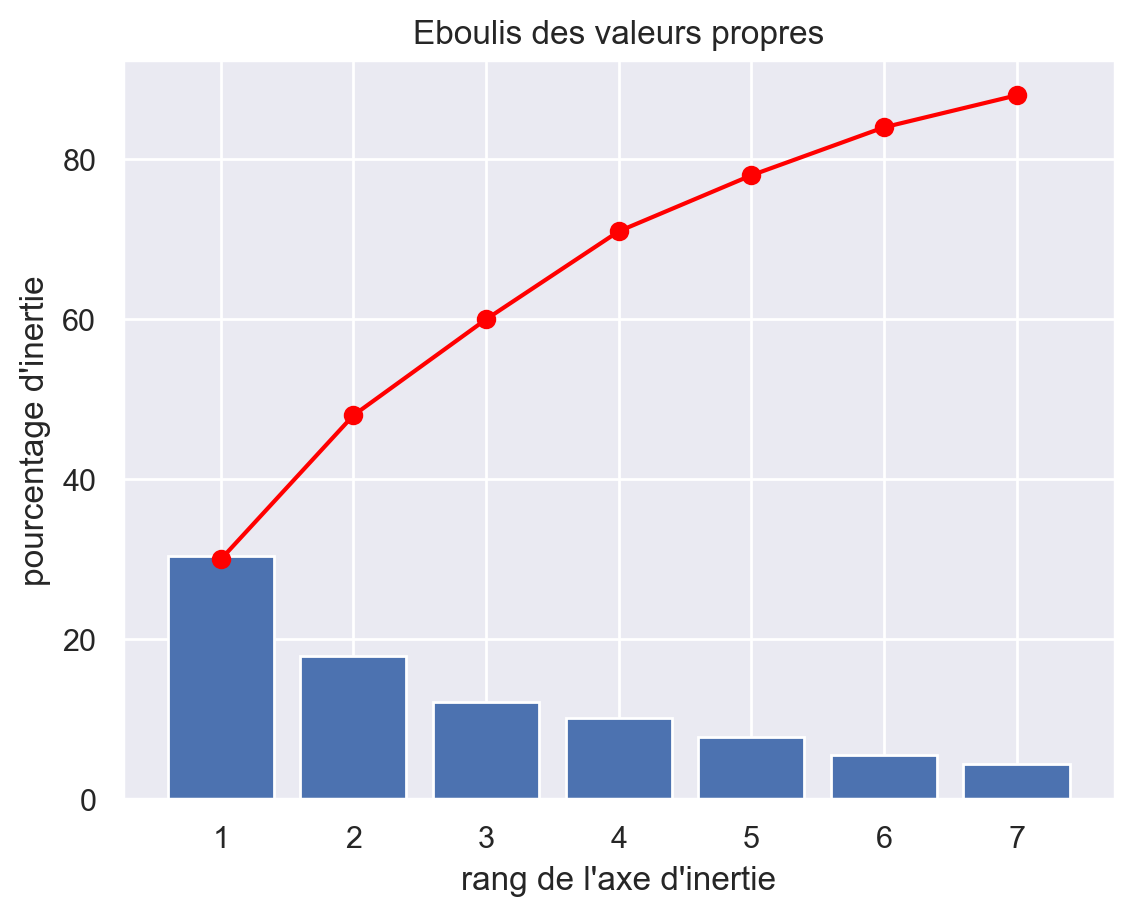

In [623]:
# Eboulis des valeurs propres
# Définisons ensuite une variable avec la liste de nos composantes :
x_list = range(1, n_components+1)
v = list(x_list)
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

### OBSERVATIONS

  Nous avons dans notre cas l'inertie totale répartie inéquitablement sur 7 axes
  - Axe 1 : 30 % de l'inertie totale
  - Axe 2 : 17.87 % de l'inertie totale
  - Axe 3 : 12.2 % de l'inertie totale
  - Axe 4 : 10.14 % de l'inertie totale
  - Axe 5 : 7.8 % de l'inertie totale
  - Axe 6 : 5.59 % de l'inertie totale 
  - Axe 7 : 4.43% de l'inertie totale

In [624]:
scree_cum

array([30., 48., 60., 71., 78., 84., 88.])

-Les 2 premières composantes captent donc 30 +17.87 = 47.8 % de la variance,<br> 
-les 3 premières 30 + 17.87 + 12.2 = 60 % de la variance<br> 
-les 4 premières 30 + 17.87 + 12.2+ 10.14= 71 % de la variance etc.<br>
<br>
On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.<br>
On voit ici que près de 80% de la variance est comprise dans les 5 premières composantes, et près de 90% dans les 7 premières.<br>

On vois ci-dessous comment sont formés les composants principaux à partir des variables initiales.

In [625]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs

0         1         2         3         4         5         6   \
0 -0.349994  0.043724  0.276134  0.266004 -0.079301  0.320579  0.420371   
1  0.054199  0.452827  0.038891  0.425027 -0.438826  0.221916 -0.125392   
2 -0.076662 -0.421187  0.519617 -0.172610  0.162777 -0.165337 -0.008723   
3  0.224254  0.181430  0.369587  0.347216  0.216988 -0.394449  0.104628   
4 -0.152301  0.426700 -0.124110  0.197089  0.475791 -0.260744  0.135189   
5 -0.647534 -0.000234  0.105496  0.125490  0.016010 -0.270875  0.106607   
6 -0.160535 -0.052638 -0.182436  0.169160  0.620098  0.468245 -0.347022   

         7         8         9         10        11  
0  0.390879 -0.090610  0.356732  0.351164 -0.176755  
1  0.210132  0.158882 -0.168870 -0.340580  0.372024  
2  0.324158  0.243303  0.079425 -0.237976  0.485597  
3 -0.066345 -0.645458 -0.000581 -0.158009  0.005897  
4 -0.239475  0.449438  0.334508  0.082131  0.223293  
5 -0.051743  0.121367 -0.615943 -0.108925 -0.245295  
6  0.183654 -0.246855 -0.226961  0.048847  0.191826

In [627]:
pcs.columns = tmp3.columns
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

Croissance_popu(%)  population_2017  proteine_volaille(%)  Production  \
F1               -0.35             0.04                  0.28        0.27   
F2                0.05             0.45                  0.04        0.43   
F3               -0.08            -0.42                  0.52       -0.17   
F4                0.22             0.18                  0.37        0.35   
F5               -0.15             0.43                 -0.12        0.20   
F6               -0.65            -0.00                  0.11        0.13   
F7               -0.16            -0.05                 -0.18        0.17   

    TDI(%)  TAS(%)  Disponibilité alimentaire (Kcal/personne/jour)  \
F1   -0.08    0.32                                            0.42   
F2   -0.44    0.22                                           -0.13   
F3    0.16   -0.17                                           -0.01   
F4    0.22   -0.39                                            0.10   
F5    0.48   -0.26                                            0.14   
F6    0.02   -0.27                                            0.11   
F7    0.62    0.47                                           -0.35   

    Qty_prod_hab  PIB_5ans(%)  CountryRisk   EEA  Distance  
F1          0.39        -0.09         0.36  0.35     -0.18  
F2          0.21         0.16        -0.17 -0.34      0.37  
F3          0.32         0.24         0.08 -0.24      0.49  
F4         -0.07        -0.65        -0.00 -0.16      0.01  
F5         -0.24         0.45         0.33  0.08      0.22  
F6         -0.05         0.12        -0.62 -0.11     -0.25  
F7          0.18        -0.25        -0.23  0.05      0.19

#### Corrélations des variables avec les composantes principales

<AxesSubplot:>

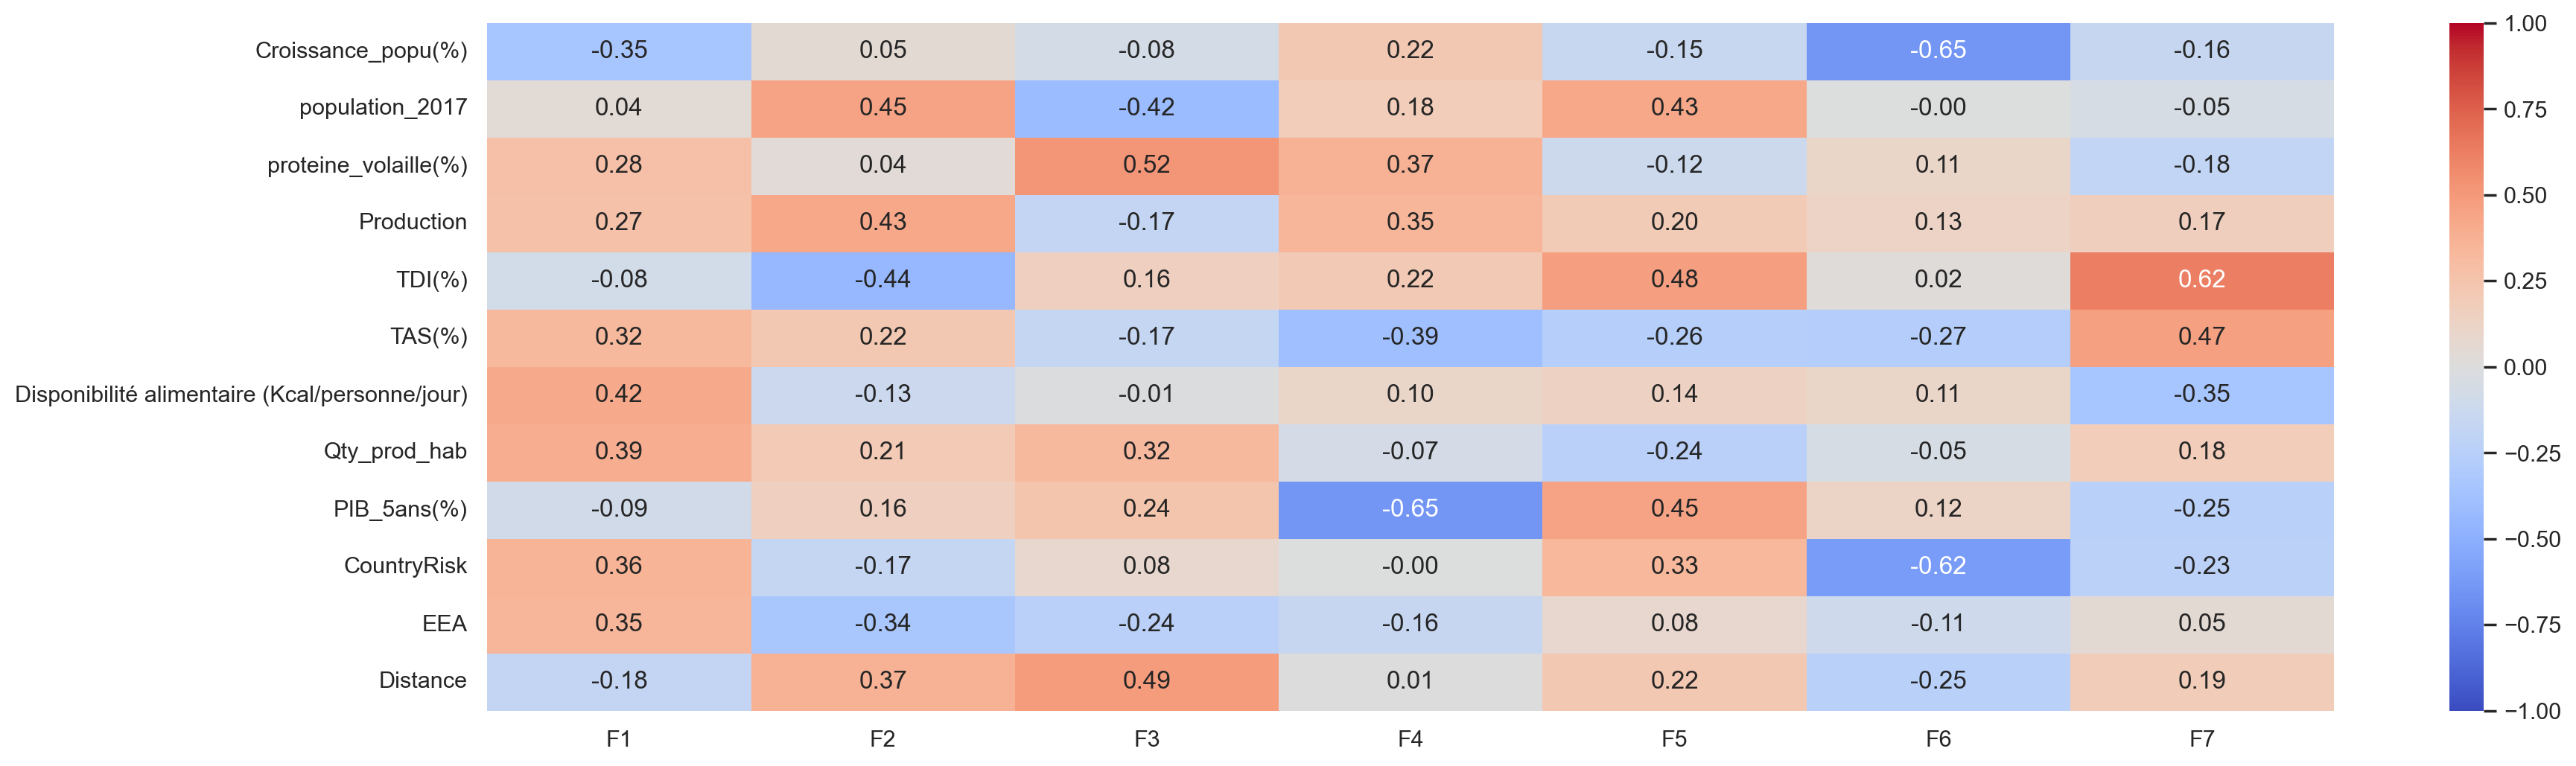

In [628]:
# Le heatmap pour la corrélations des variables avec les composantes principales
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

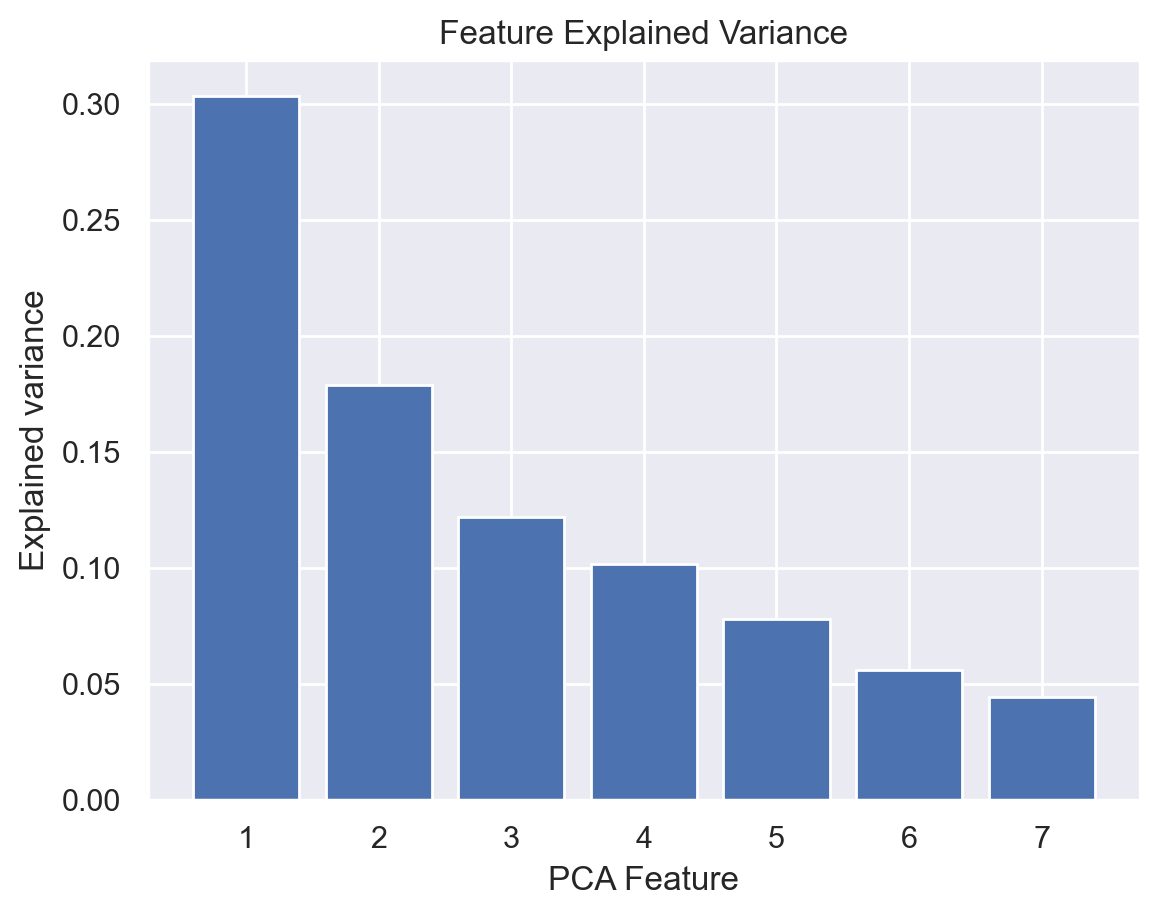

In [629]:
pca2 = PCA(n_components=7)
pca2.fit_transform(X_scaled)
plt.bar(range(1, len(pca2.explained_variance_ratio_)+1),
    pca2.explained_variance_ratio_
)
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

On sélectionne le nombre approprié de composants à afficher à partir de la figure ci-dessous (généralement la plage de variables couvertes par la variance expliquée est inférieure à 1 est les moindres), nous pouvons donc afficher ici les quatre composants F1 à F4.

###  Cercles des correlation 

Les cercles de correlation montre les relations entre les variables et leurs representation sur les components principaux. 

In [630]:
features_pca = tmp3.columns.values

In [433]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [631]:
# On affine F1 et F2 
x_y = (0,1)
x_y

(0, 1)

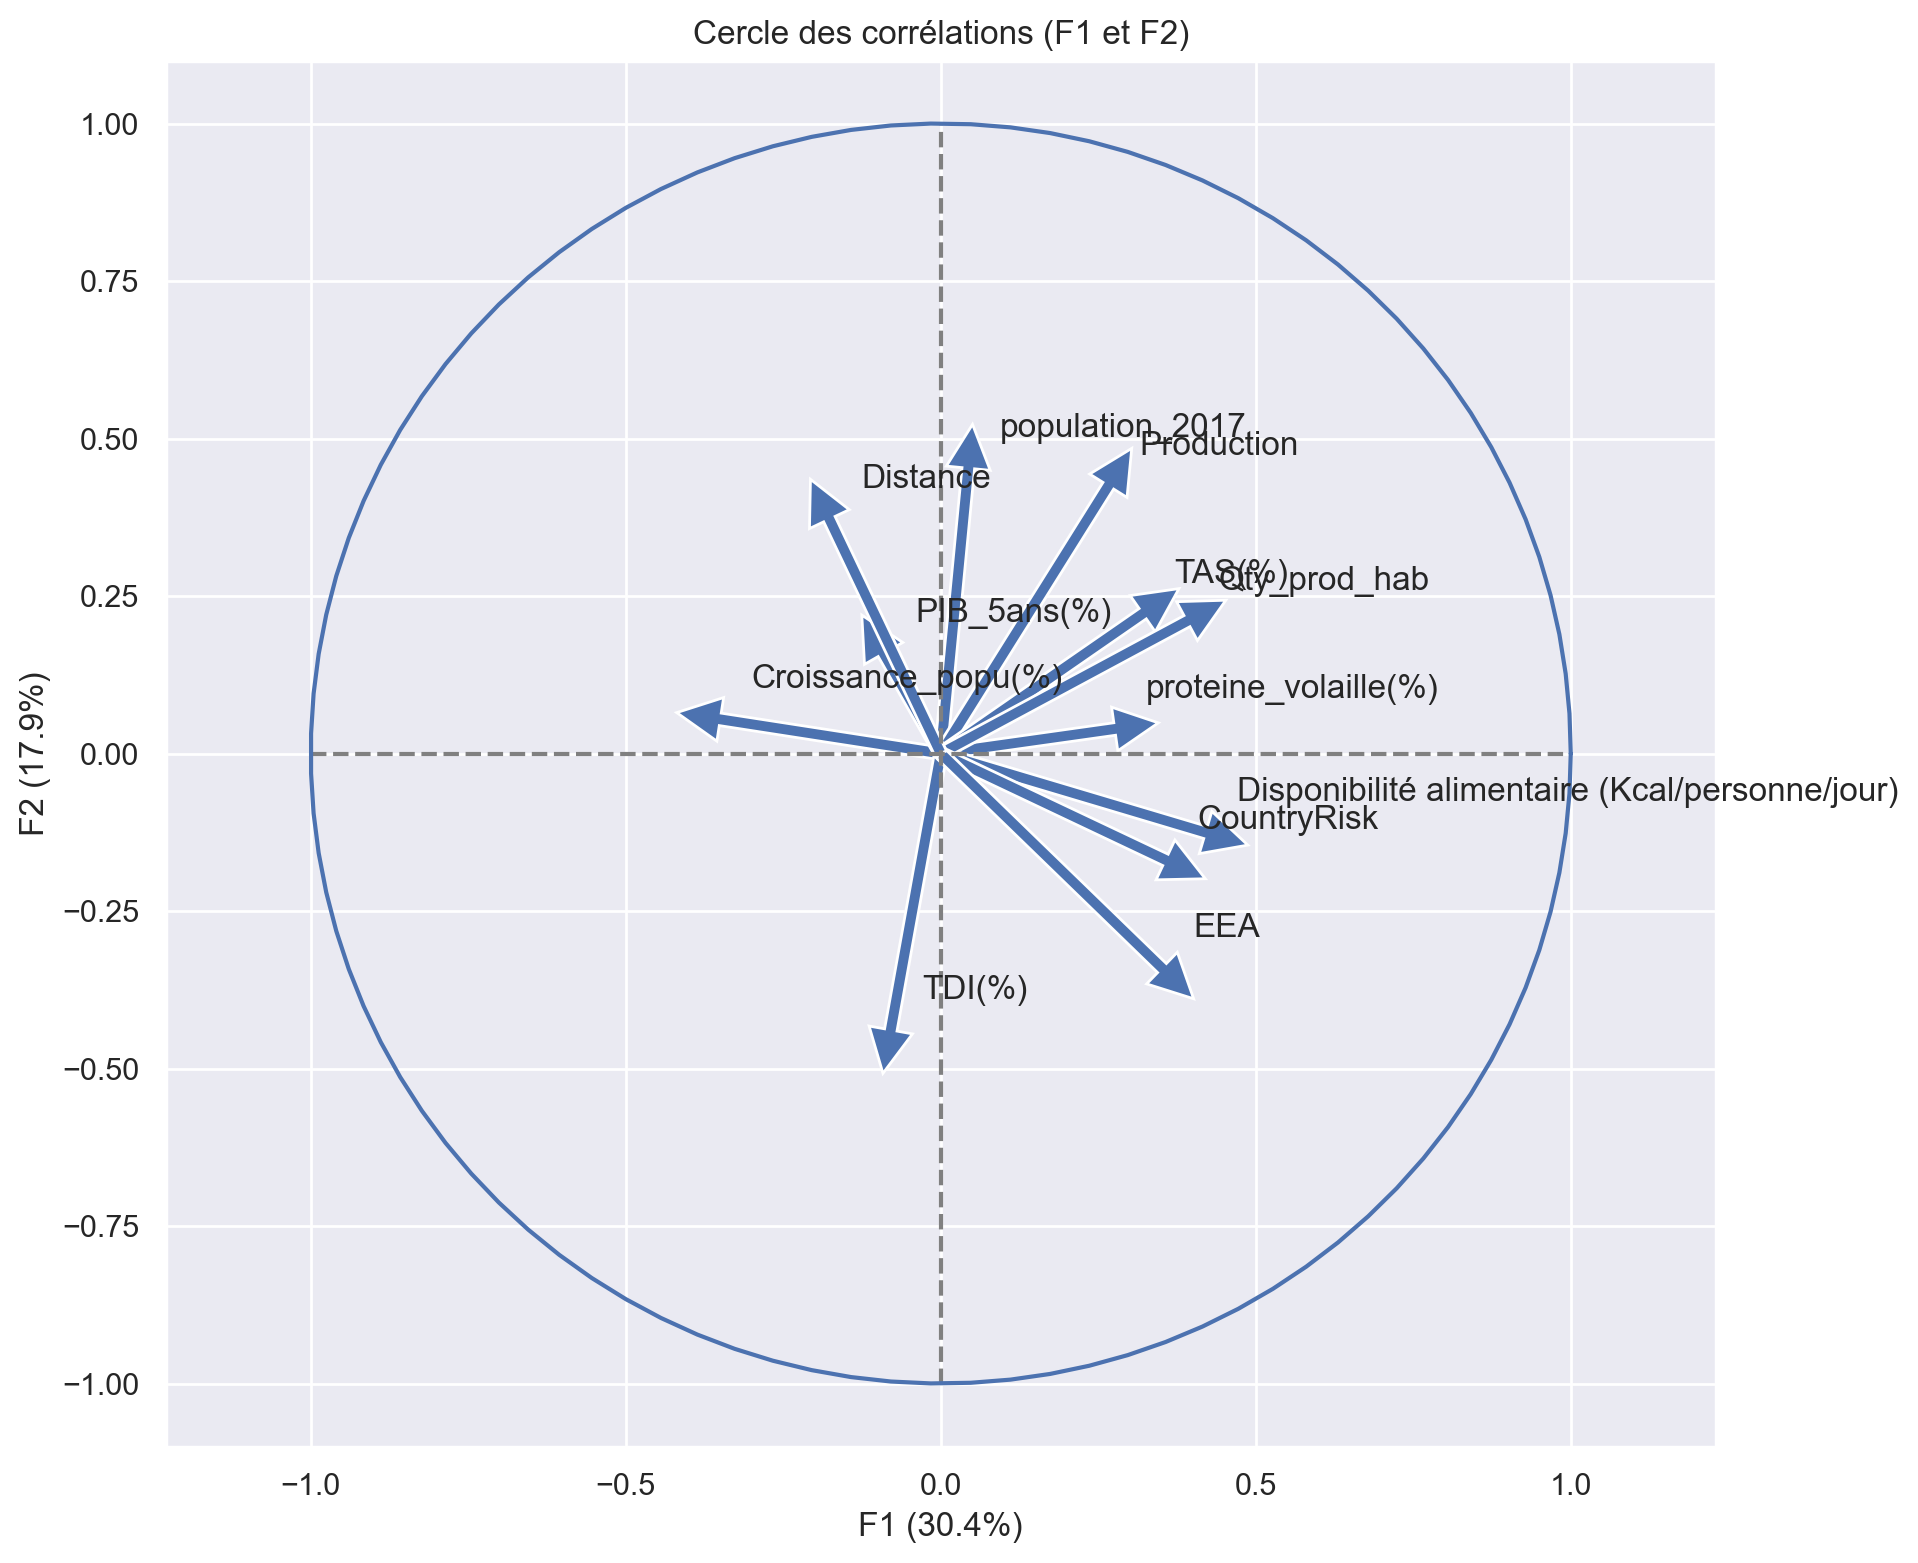

In [632]:
correlation_graph(pca, x_y, features_pca)

##### Observations

- ***Premier axe d' inertie ( F1 )*** :
    - Variables corrélées positivement :
        1. Disponibilité alimentaire (0.42)
        2. Qty_prod_hab (0.39)
        3. CountryRisk (0.36)
        4. EEA (0.35)
        5. TAS (0.32)
        6. proteine volaile (0.28)
        7. Production (0.27)
    - Variables corrélées négativement :
        1. Croissance population (-0.35)

    - Comme la disponibilité contient les données de production, qty_prod_hab et protine_volaille, elle peut être interpreter "les disponibilités alimentaires".
    - L'axe F1 est corrélé avec le plus de variables.


- **Second axe d'inertie ( F2 )**:
    - Variables corrélées positivement:
        1. Population 2017 (0.45)
        2. Production (0.43)
        3. Distance (0.37)
           
    - Variables corrélées négativement: 
        1. TDI (-0.44)
        2. EEA (-0.34)
    - On peut dire que l'axe F2 représente les population 2017, distance et TDI.
<br>

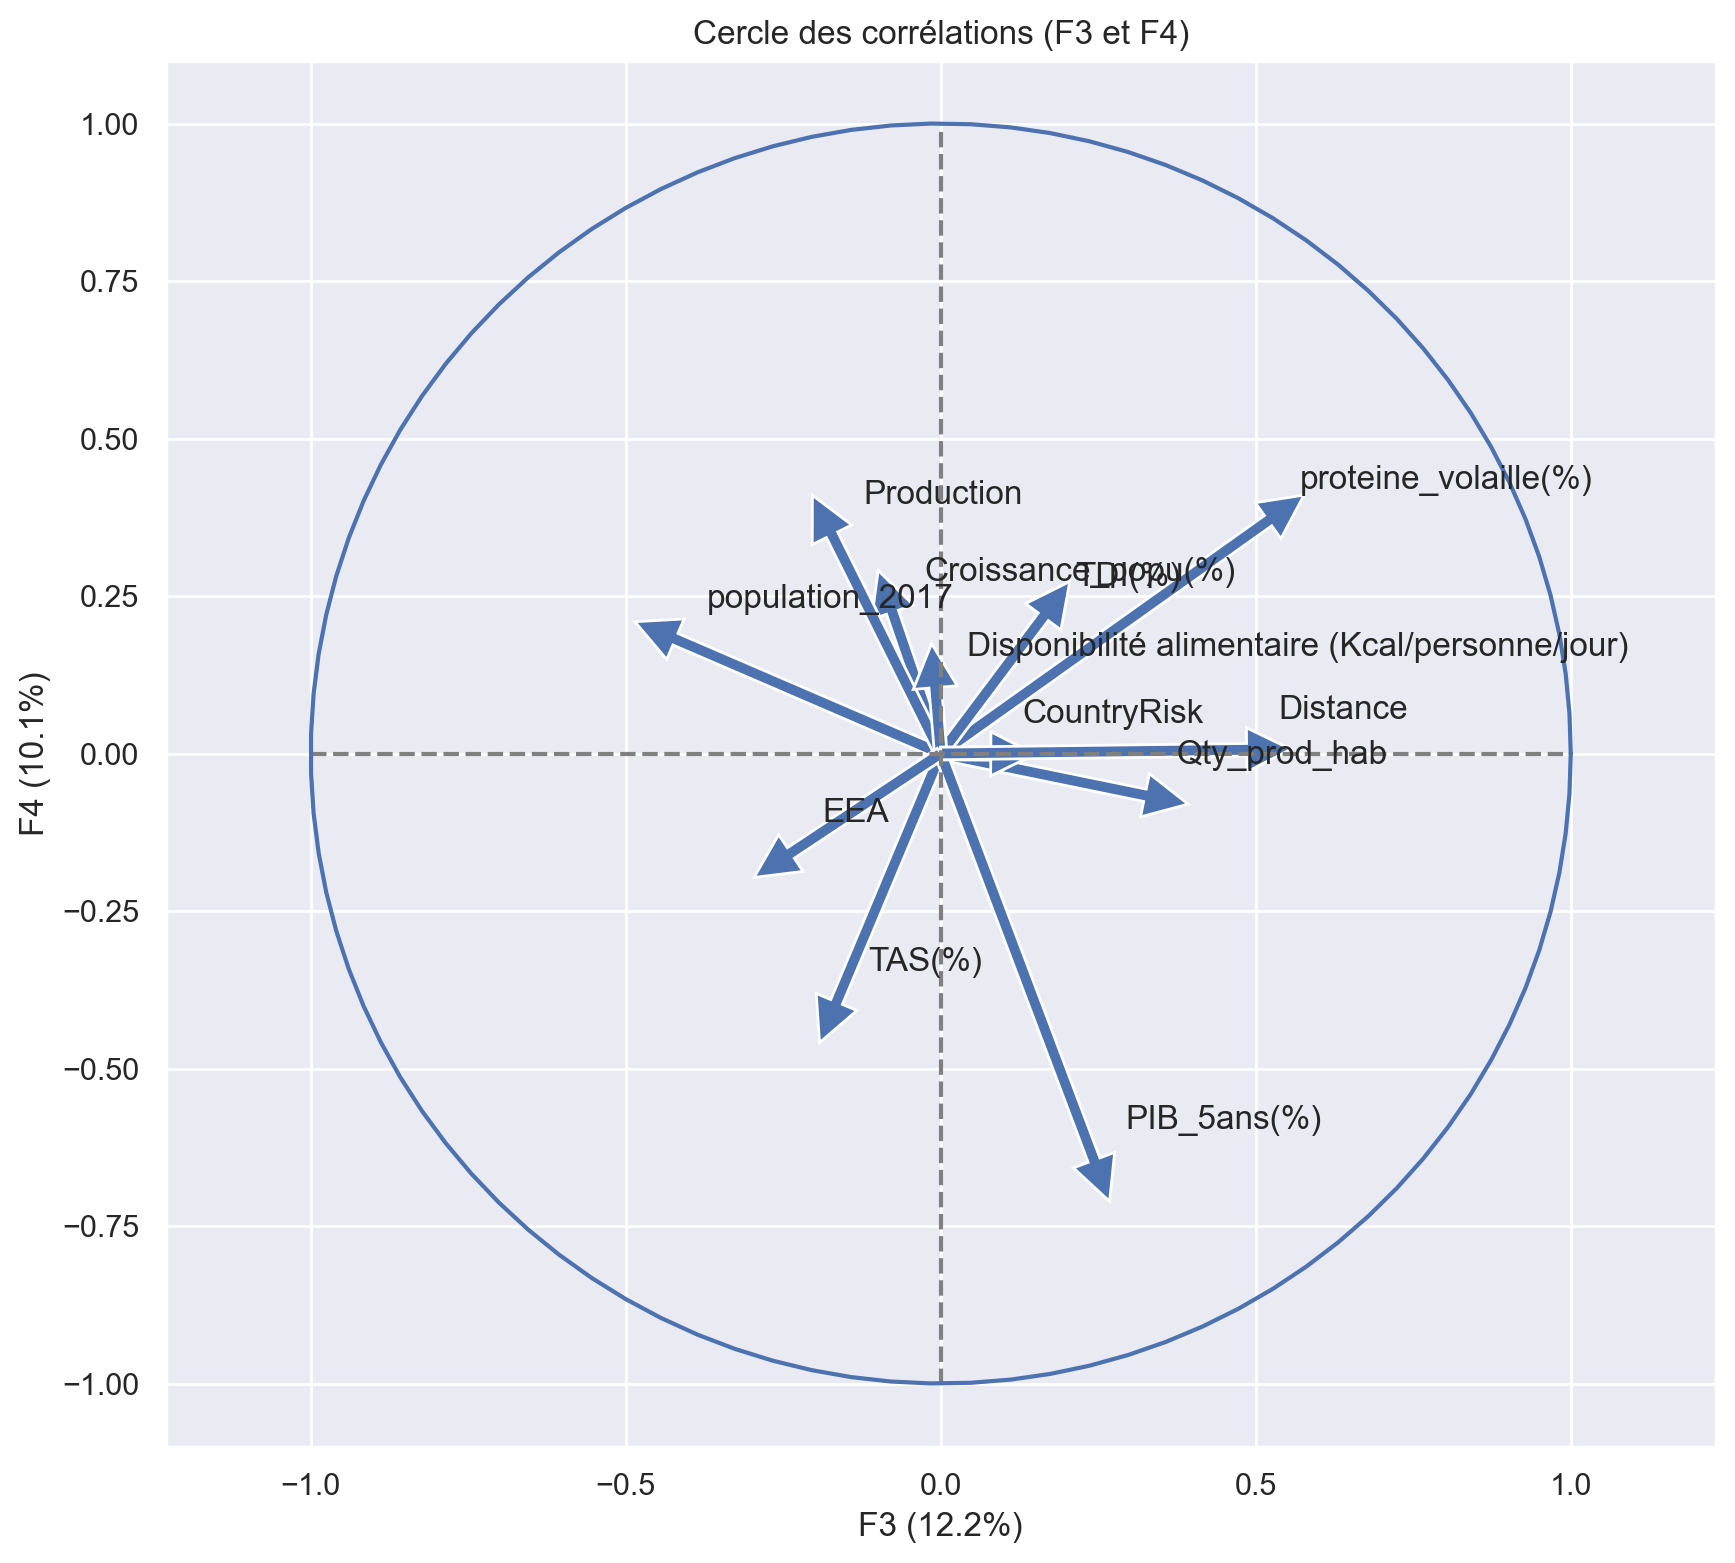

In [633]:
# On affine F3 et F4 
correlation_graph(pca, (2,3), features_pca)

### Observations
 
- **F3** :
    - Variables corrélées positivement:
        1. proteine volaile (0.52)
        2. Distance (0.49)<br>                              
    - Variables corrélées négativement :
        1. population 2017 (-0.42)<br>                       
- **F4** :
    - Variables corrélées positivement: 
        1. proteine volaile (0.37)
        2. Production (0.35)<br>
    - Variables corrélées négativement :
        1. TAS (-0.39)
        2. PIB_5ans (-0.65)<br>
<br>

## Projection des individus 

On va maintenant dessinner le nuage des individus.

In [634]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[-3.0584916 ,  0.03110558, -1.06581657,  0.34468094, -0.70511221,
        -0.10802391,  0.66410696],
       [ 0.97525286,  1.7648319 ,  0.81835821,  2.28462522, -0.40653862,
         0.25331577,  0.23177059],
       [-0.41435333, -1.55668884, -0.19818871,  0.13781462,  0.22744717,
         2.08826823, -0.40694797],
       [-0.11942797, -0.18154946, -1.86837155,  0.46022004, -1.05393285,
        -0.02312552, -0.58854114],
       [ 2.88505491, -0.46376181, -1.78905768,  0.61922119,  1.4040414 ,
         0.01598024, -0.49126069]])

In [635]:
x_y = (0, 1) # choisir le premier et deuxieme composante (F1 et F2)
x_y

(0, 1)

In [636]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, s=100)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

In [637]:
tmp3 = tmp3.reset_index()

In [638]:
df3["Groupe"].values

array([3, 4, 2, 3, 1, 2, 2, 4, 2, 4, 1, 3, 5, 1, 4, 3, 3, 1, 3, 3, 2, 2,
       3, 3, 4, 4, 2, 2, 4, 1, 4, 2, 4, 1, 2, 3, 1, 4, 1, 1, 3, 4, 1, 1,
       5, 2, 2, 2, 1, 4, 2, 3, 4, 2, 2, 4, 1, 5, 5, 2, 1, 4, 1, 4, 5, 3,
       3, 3, 2, 2, 2, 1, 3, 2, 1, 1, 2, 3, 4, 3, 3, 3, 4, 2, 5, 2, 2, 3,
       4, 2, 4, 3, 5, 1, 4, 3, 2, 3, 3, 5, 4, 3, 1, 5, 1, 1, 4, 1, 1, 3,
       3, 4, 3, 4, 4, 3, 3, 3, 1, 1, 3, 3, 1, 4, 1, 3, 2, 3, 1, 5, 2, 3,
       4, 3, 3, 5, 3, 3, 4, 5, 3, 3, 3, 5, 2, 4, 5, 2], dtype=int64)

In [639]:
X_proj.shape

(148, 7)

In [640]:
tmp3 = tmp3.reset_index()

In [641]:
list_iso3.shape

(148,)

##  CAH v.s K MEANS

##### Projection sur plan factorielle avec regroupement CAH de 5 clusters

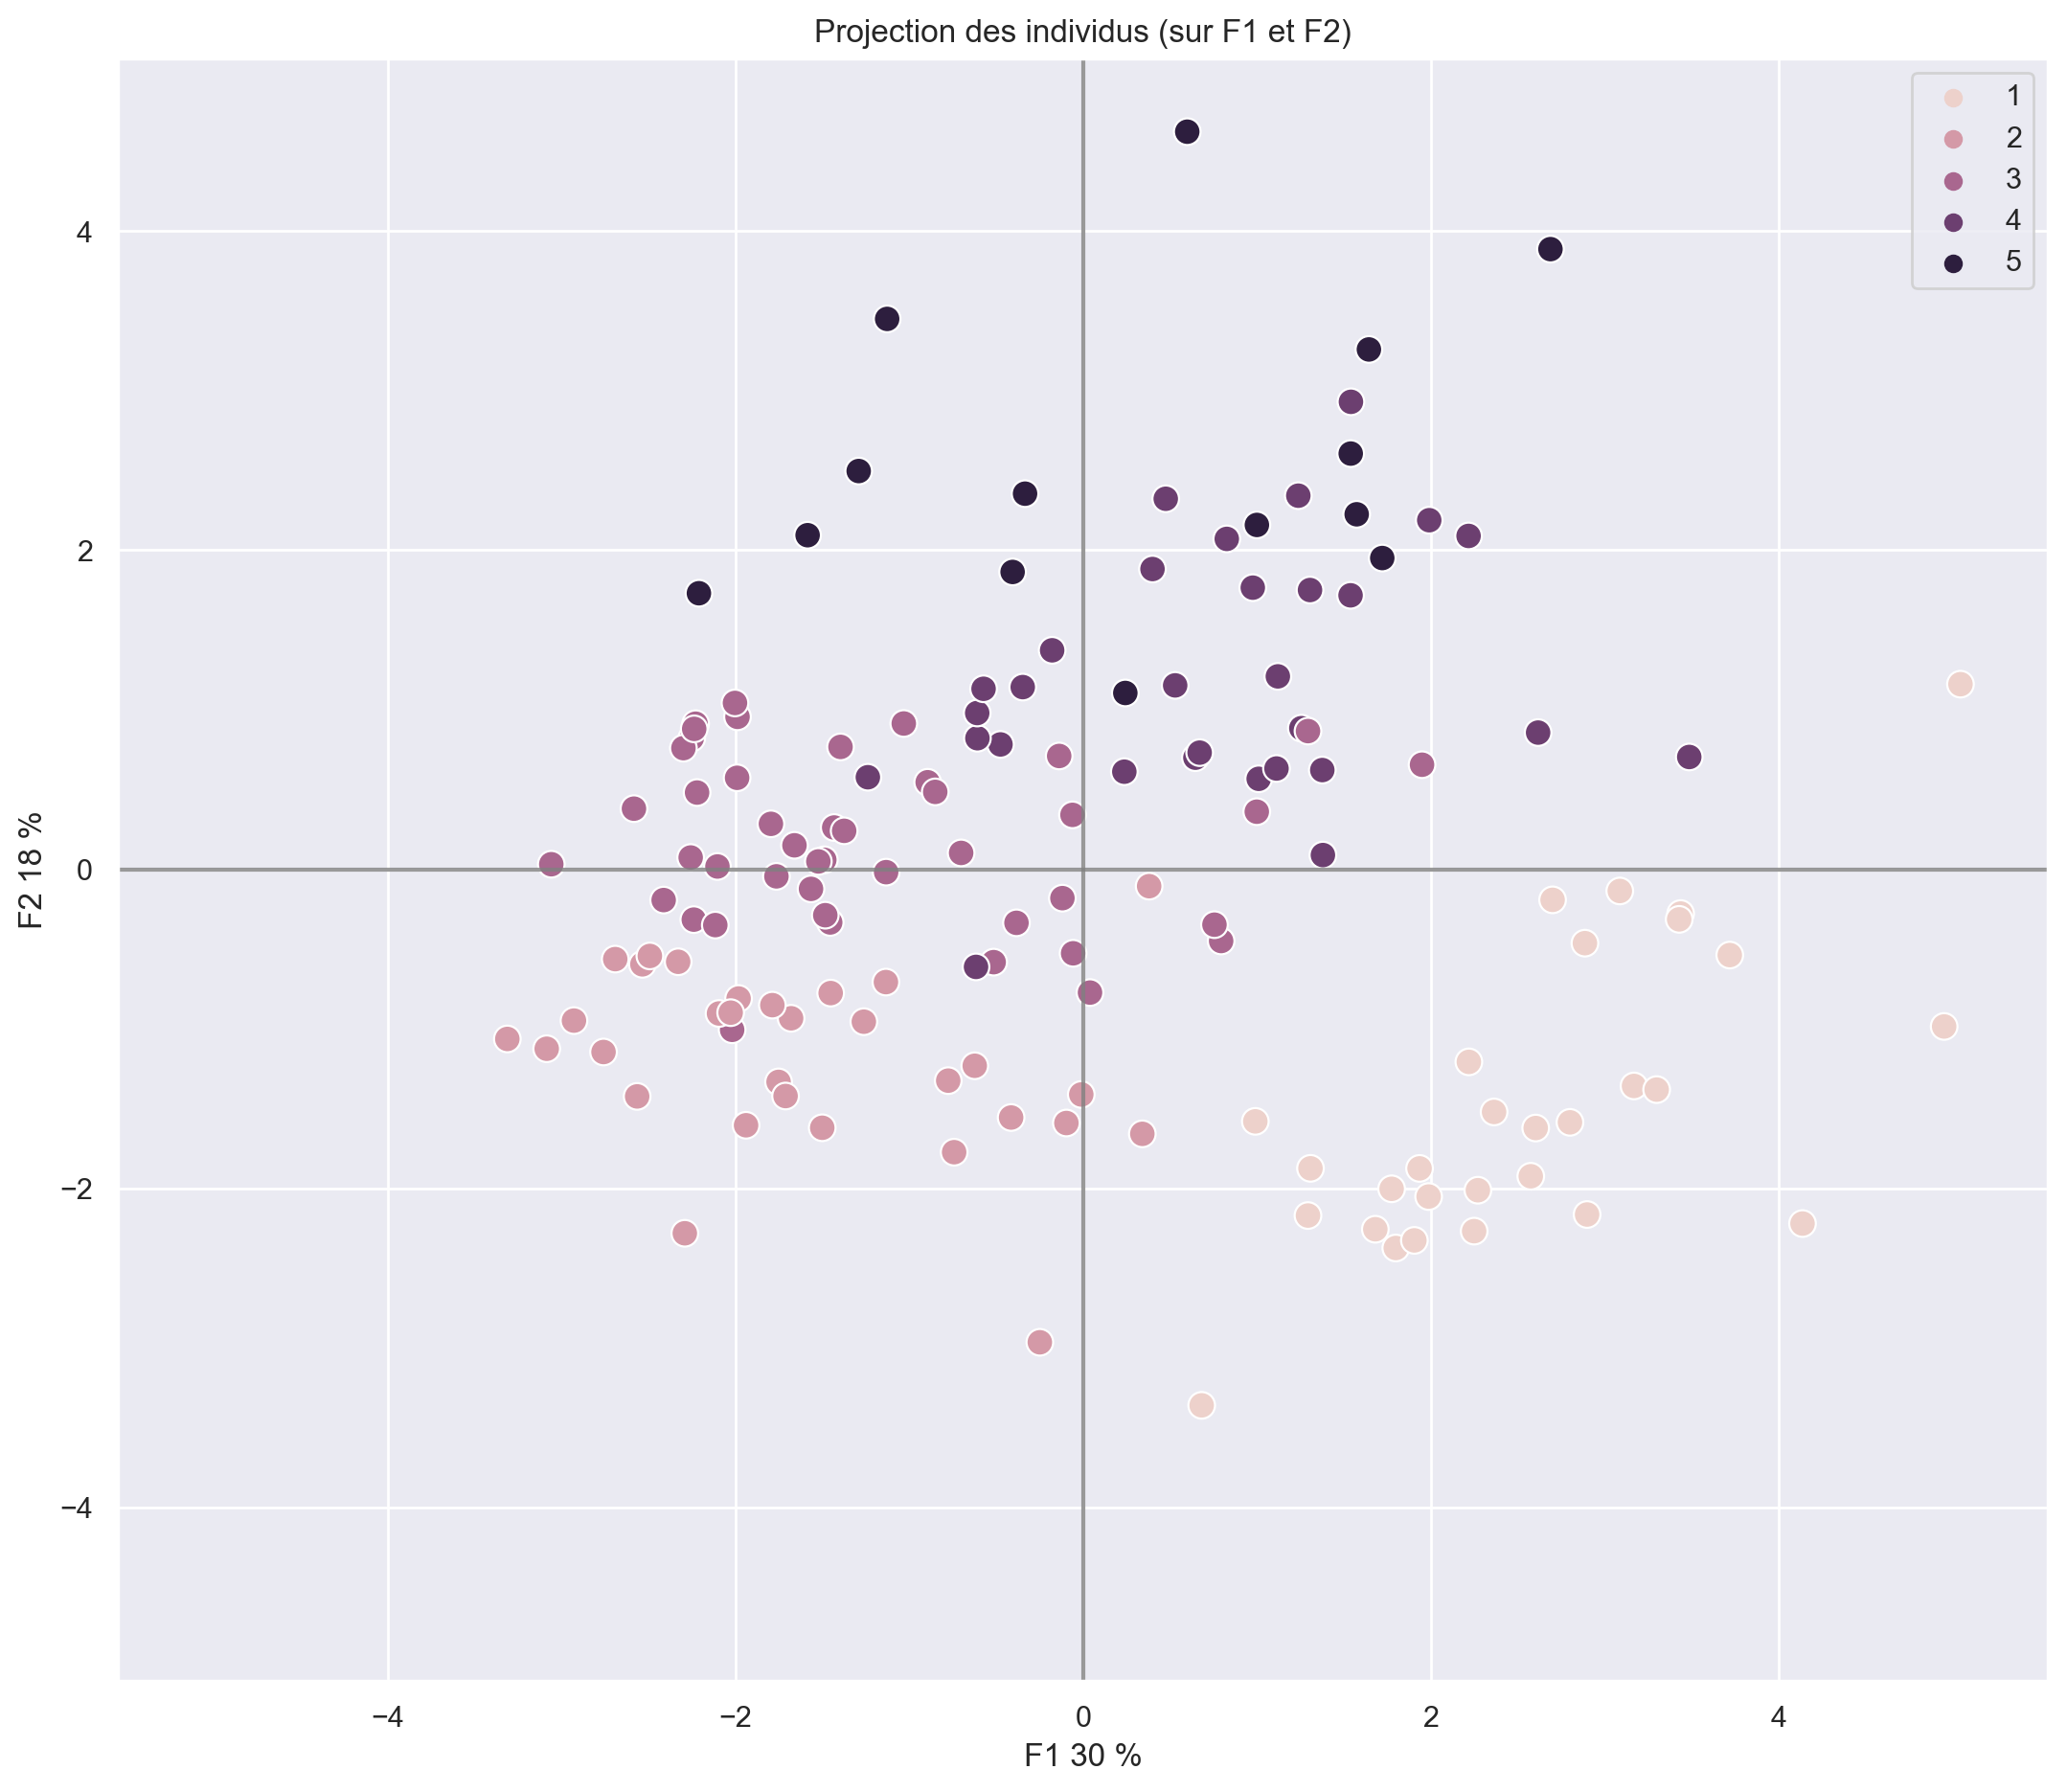

In [642]:
display_factorial_planes(X_proj, x_y, pca, labels=None, figsize=(13,11), clusters=df3["Groupe"].values, marker="o")
#Les points de cinq couleurs représentent cinq groupes de clusters

En comparant le cercle des corrélations ci-dessus (F1 + F2), on constate que les pays du groupe 1 sont des membres de l'EEE, et que la plupart d'entre eux se concentrent dans la moitié inférieure de droite (les pays de cette zone se caractérisent par leur proximité à la France , un TDI et un TAS plus élevés, et le score le plus élevé dans countryRisk)<br>
<br>
La distribution du groupe 2 est concentrée du centre vers la gauche de la moitié inférieure, qui sont des pays avec des TDI plus élevés, des TAS plus faibles et relativement éloignés de la France que le groupe 1.<br>

### Projection sur plan factorielle avec regroupement Kmeans de 5 clusters

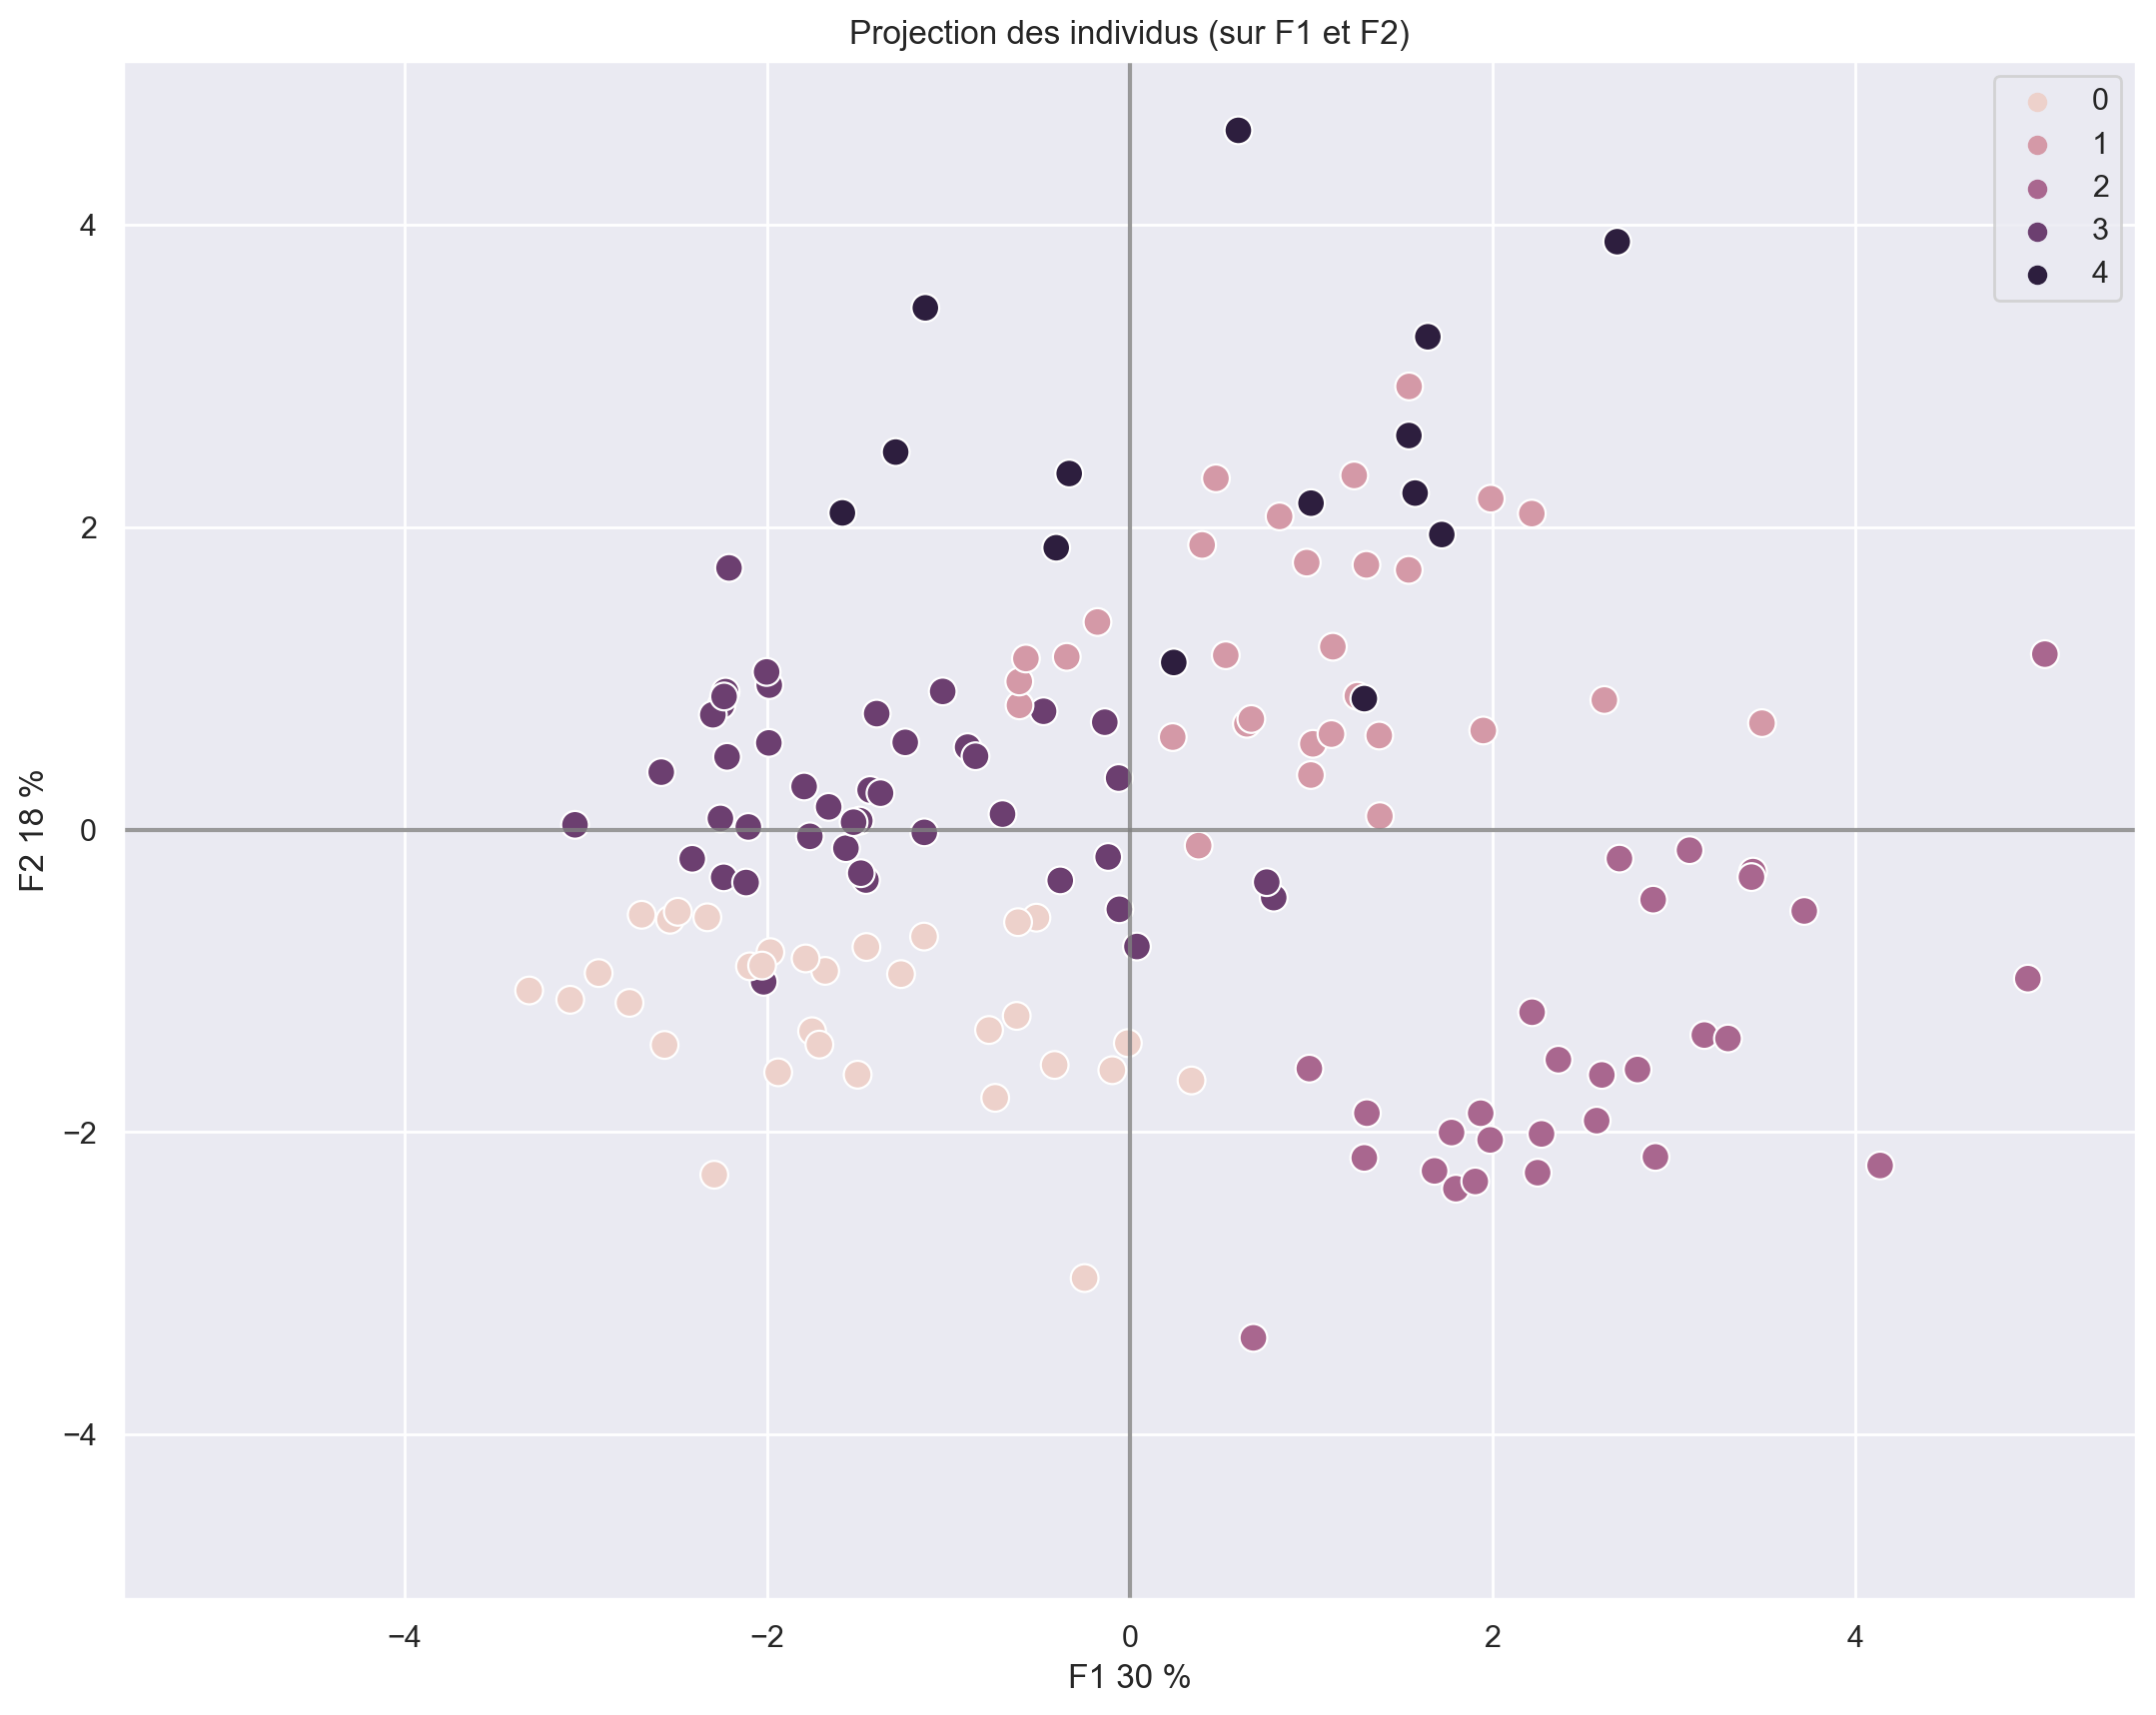

In [643]:
display_factorial_planes(X_proj, 
                         x_y, 
                         pca, 
                         labels=None, 
                         figsize=(13,10), 
                         clusters=labels_kmeans_5_clusters, 
                         marker="o")
#Les points de cinq couleurs représentent cinq groupes de clusters

En comparant les cinq groupes de CAH, nous avons constaté que la distinction de groupes par ces deux méthodes sont assez similaire. Il faut noter que k-mean est non-deterministe, donc les clusters changent légèrement à chaque fois qu'on fait le clustering.

### Exploration des clusters selectionnées

Pour l'affinage de la selection, on garde les clusters fait avec CAH. 

##### Affiner la selection dans les clusters
On a constaté que:
- Le cluster 1 semble etre celui qui correspond le mieux à nos critères.
- Le cluster 2 pourra aussi être envisagé.

Maintenant, on souhaite pouvoir proposer des pays dans ces clusters.

### Affinage de la selection sur le cluster 1

In [644]:
mask = df3["Groupe"] == 1
df_only_1 = df3[mask].copy()
df_only_1.drop(columns=["Groupe", "EEA", 
                        "PIB_5ans(%)","proteine_volaille(%)","Qty_prod_hab",'Croissance_popu(%)','population_2017'], axis=1, inplace=True)

In [645]:
features_cluster1 = df_only_1.columns.values
features_cluster1

array(['Production', 'TDI(%)', 'TAS(%)',
       'Disponibilité alimentaire (Kcal/personne/jour)', 'CountryRisk',
       'Distance'], dtype=object)

In [646]:
X1 = df_only_1.values
#Centrage / réduction des données pour que nos données puissent prendre la même importance
std_scale = preprocessing.StandardScaler().fit(X1)
X_scaled1 = std_scale.transform(X1) # 放這個是為了算入每個國家不同的重要性

In [647]:
features_cluster1.size

6

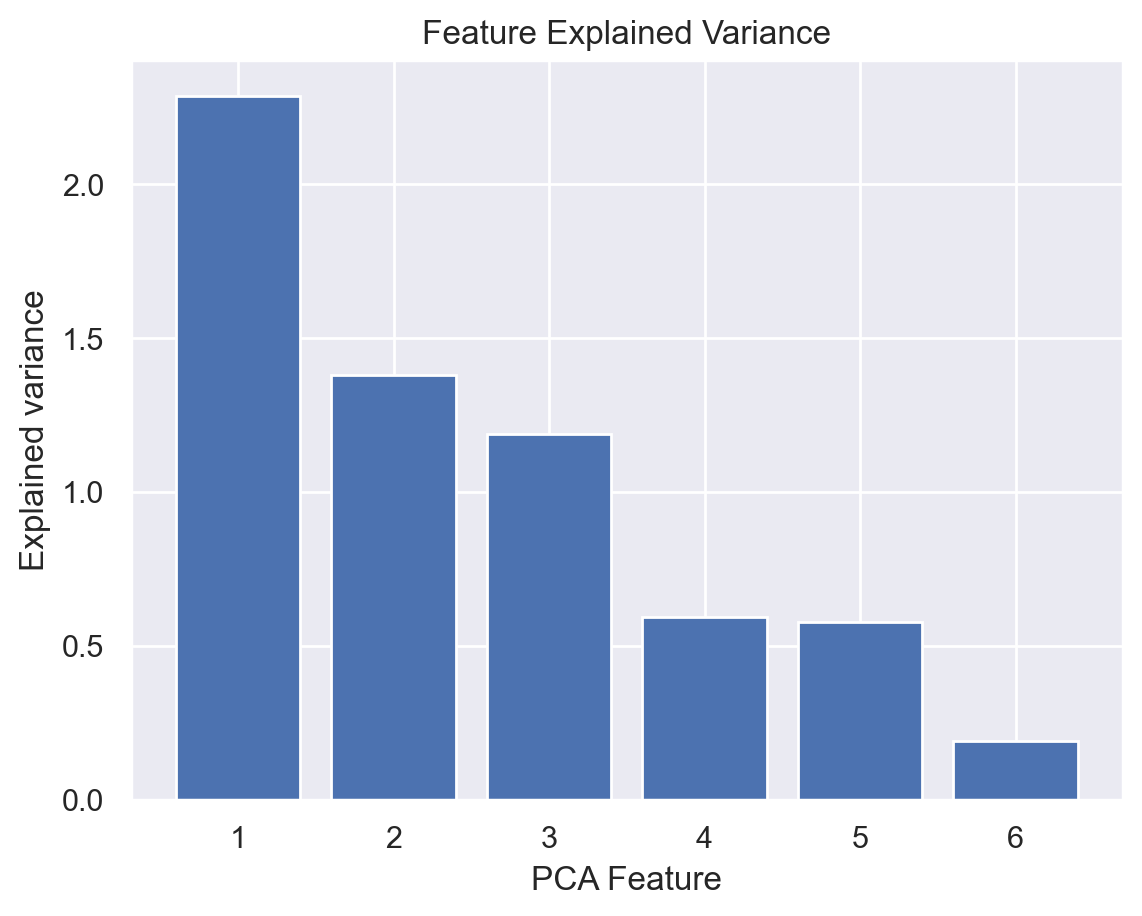

In [648]:
pca_cluster1 = PCA(n_components=features_cluster1.size)
X_proj1 = pca_cluster1.fit_transform(X_scaled1)
plt.bar(range(1, len(pca_cluster1.explained_variance_)+1),
    pca_cluster1.explained_variance_
)
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

On choisit de regarder la répartition des variables au sein des composantes 1 à 3 (F1,F2,F3) et leurs interrelations

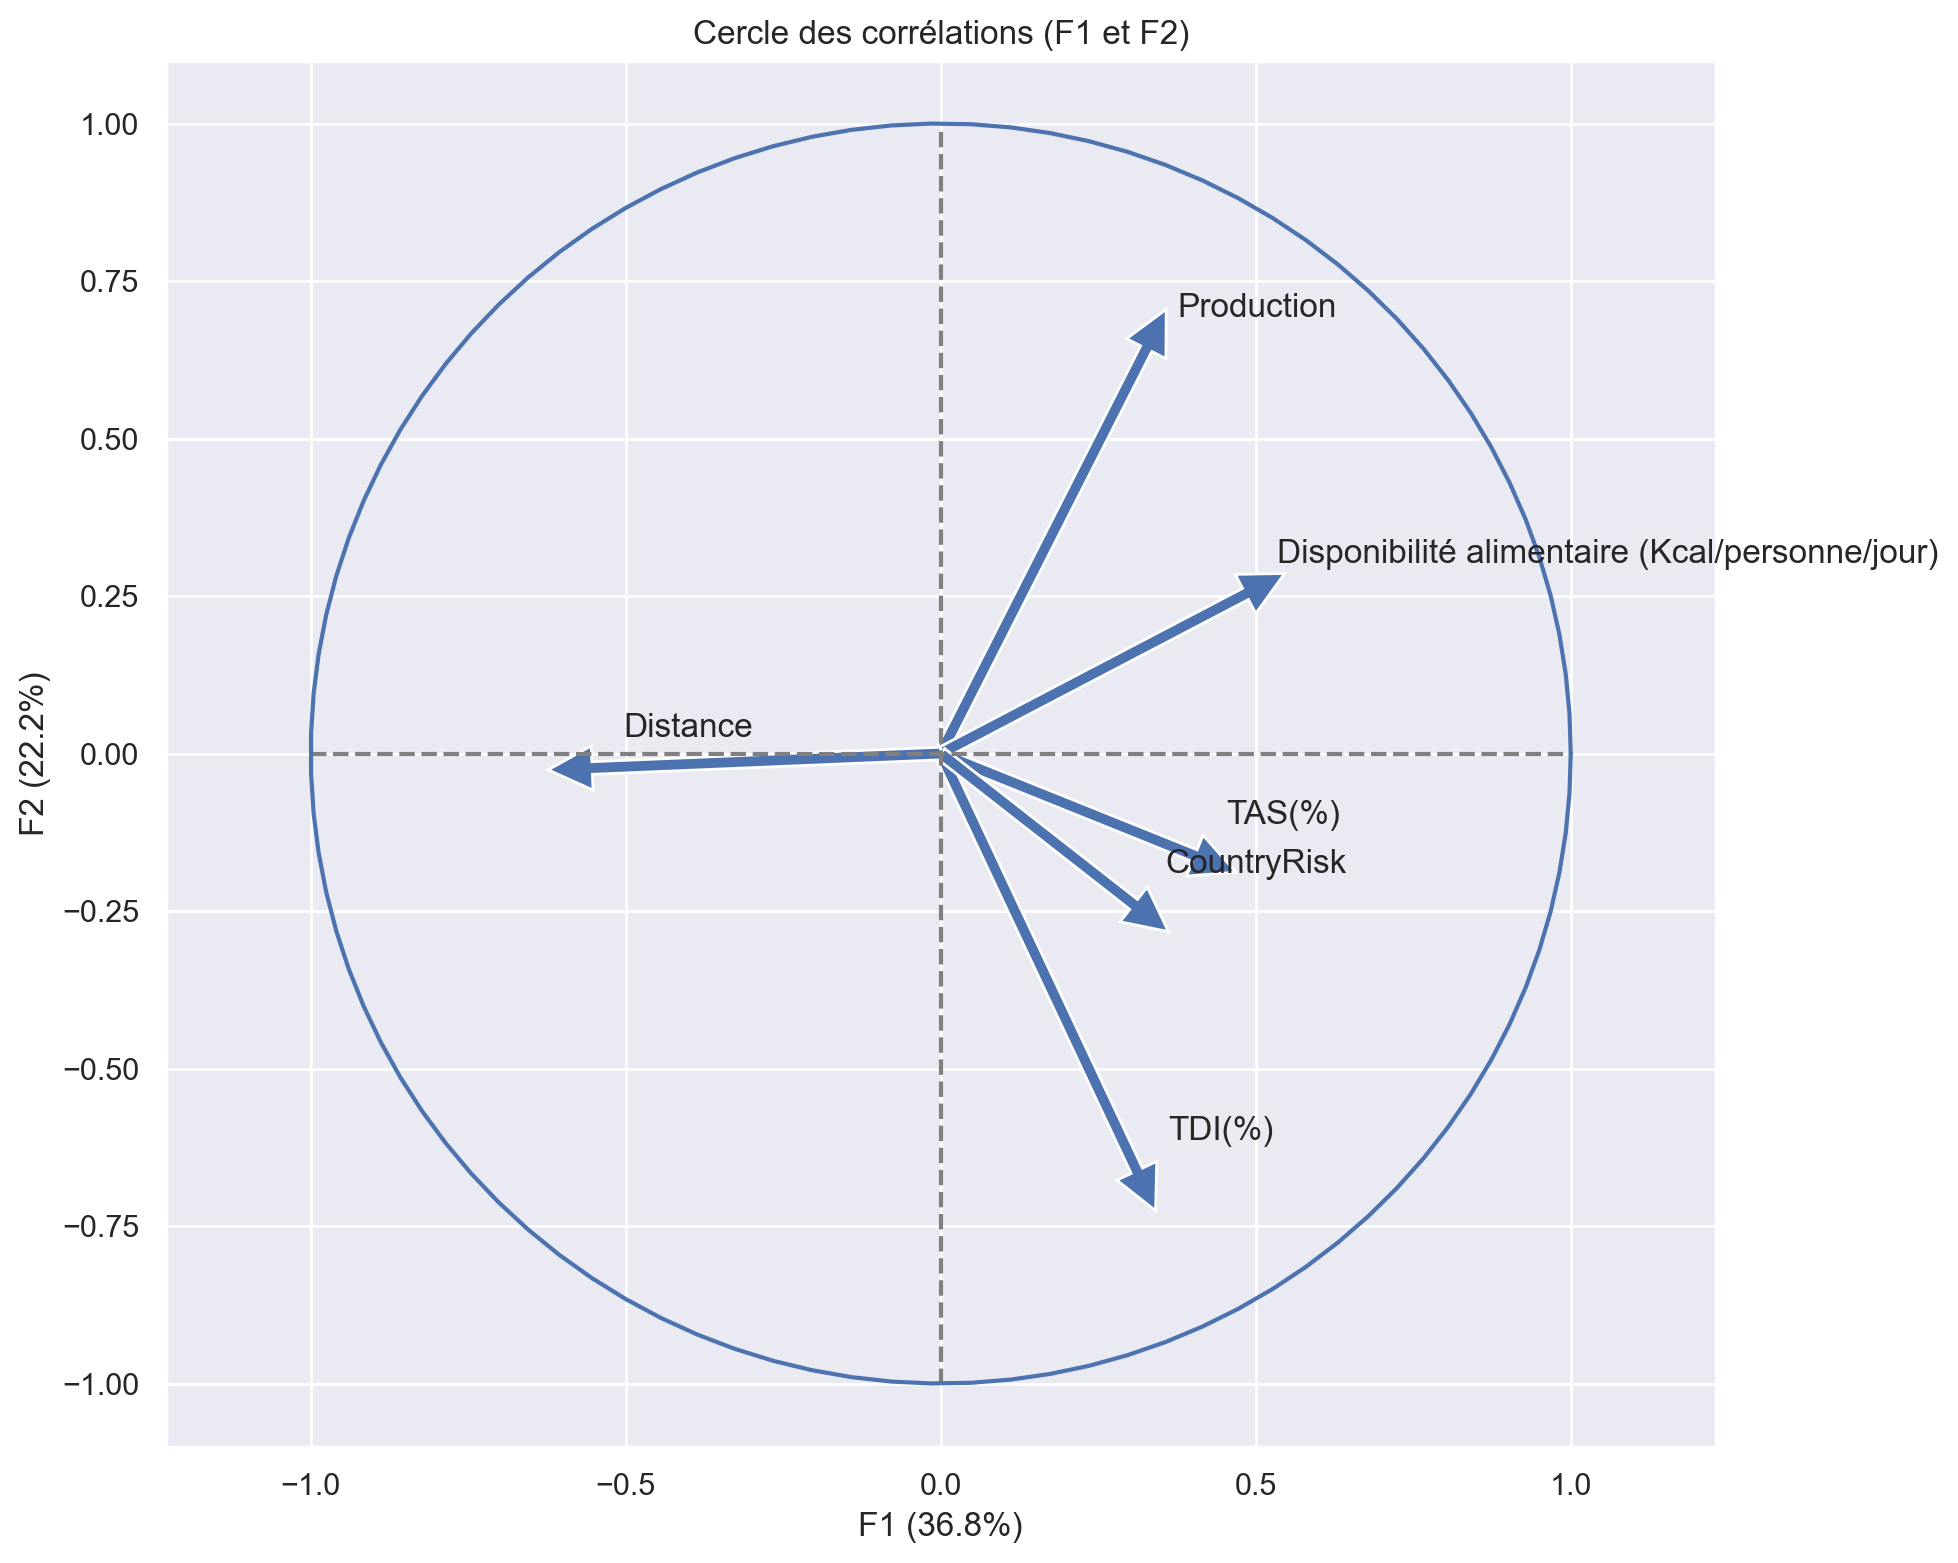

In [649]:
correlation_graph(pca_cluster1, (0,1), features_cluster1)

Pour F1:<br>
- TDI positif
- TAS positif
- Disponibilité alimentaire positif
- Production positif 
- Distance négatif

<br>

Pour F2:<br>
- Production positif
- TDI négatif
- TAS négatif

<br>

Cela montre que les pays de droite (surtout les plus proches du coin supérieur droit)qui ont le TDI et le TAS plus élevés, proche de la France.<br>
Ces pays respectent nos critrère d'importation.<br>

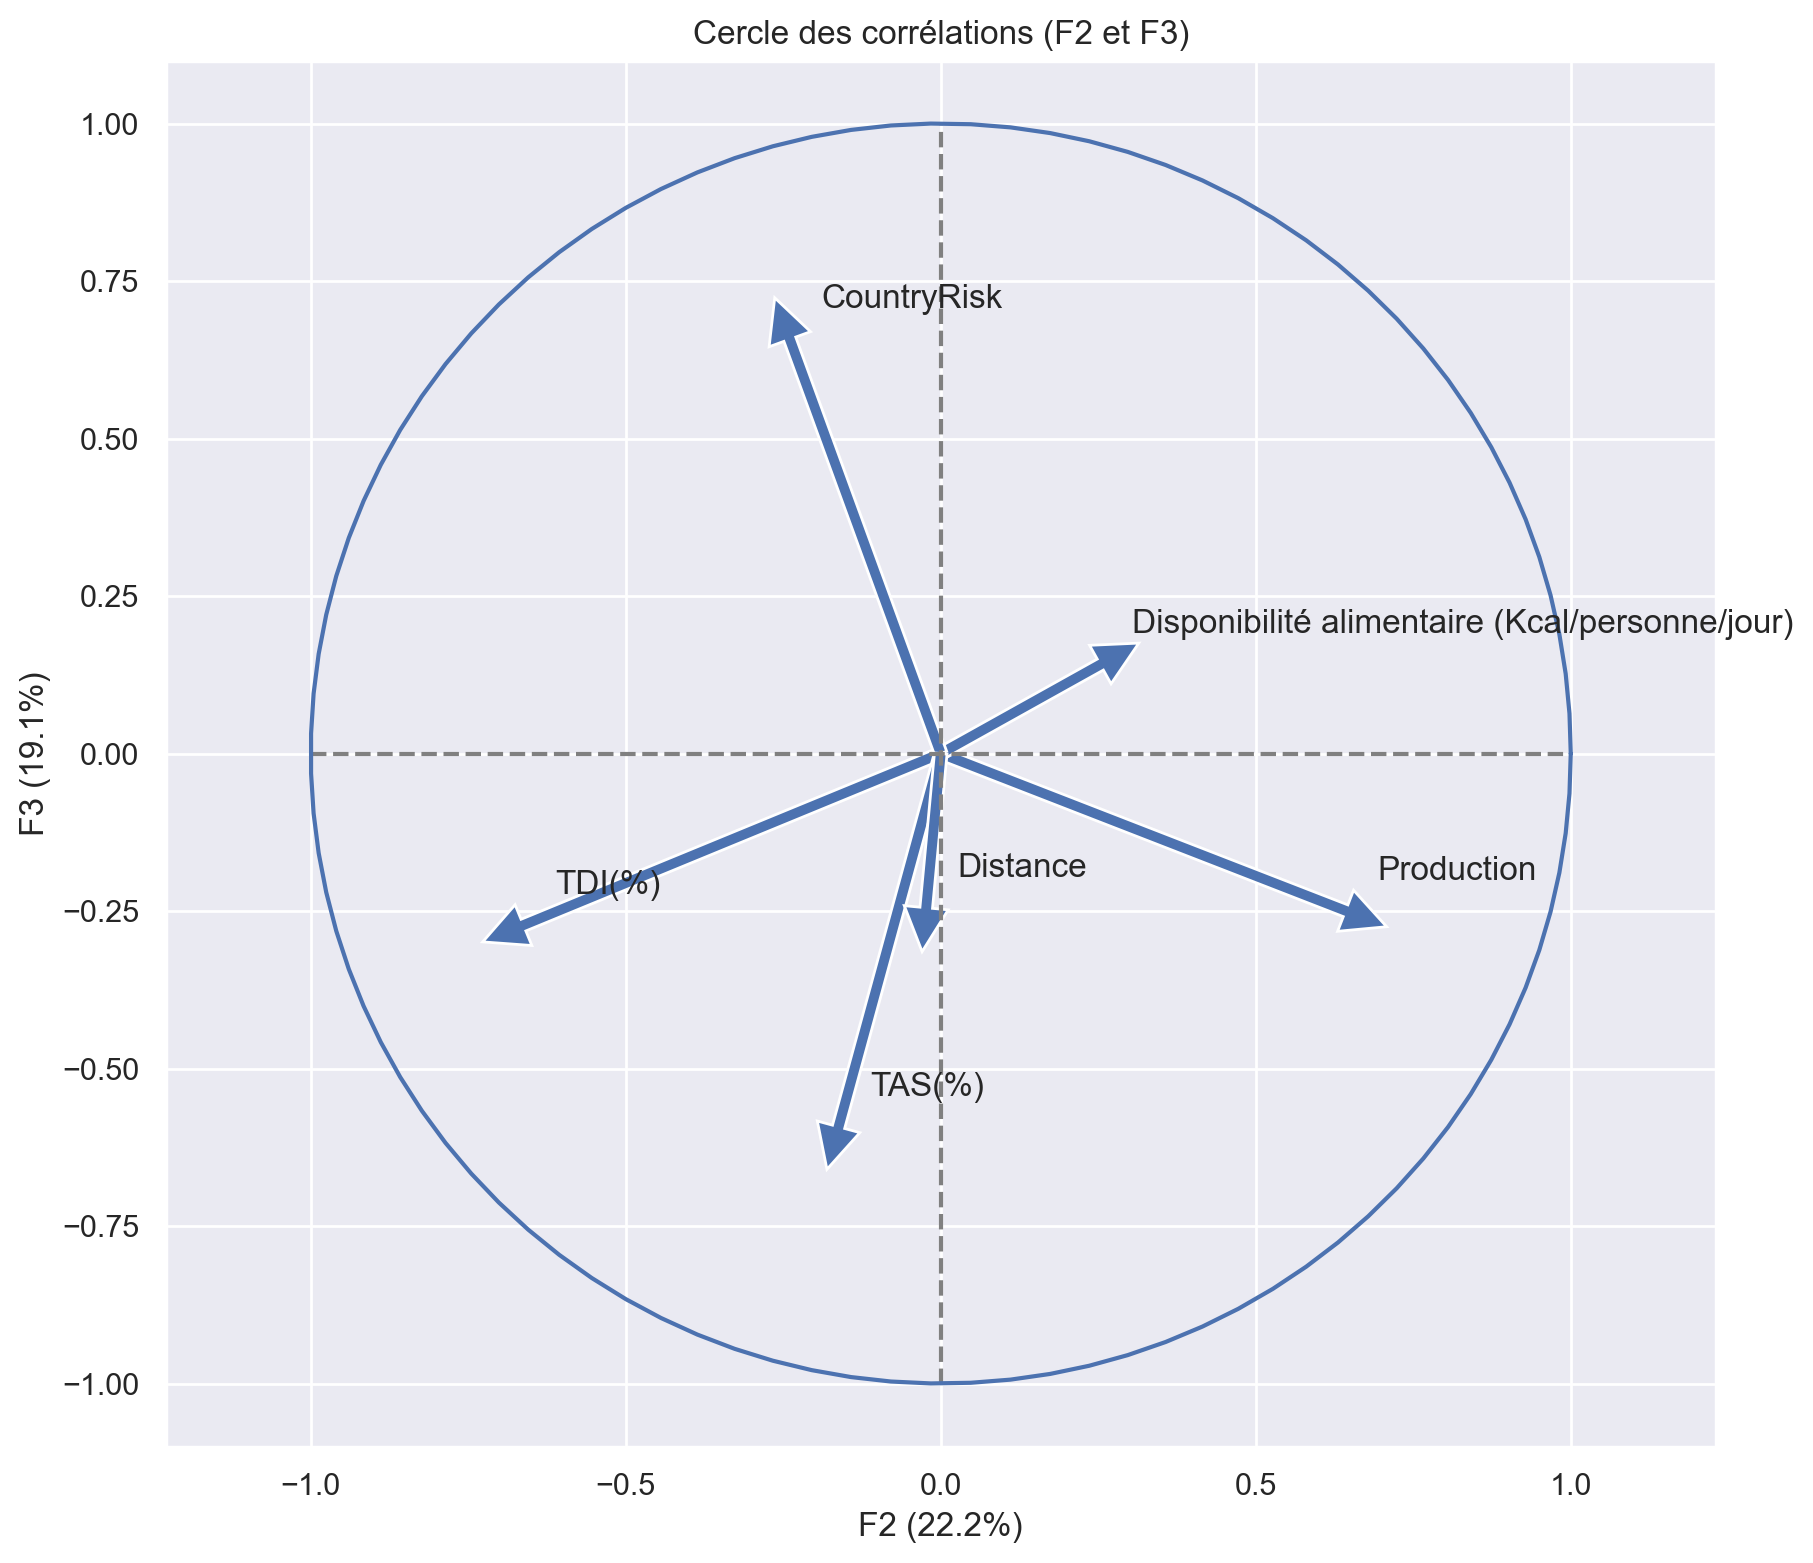

In [650]:
correlation_graph(pca_cluster1, (1,2), features_cluster1)

Pour F2:<br>
- Production positif
- TDI négatif
- TAS négatif
<br>

Pour F3:<br>
- CountryRisk positif
- TAS négatif
 
<br>
La F3 n'est représentée qu'à 19%, on voit pas très clairement de lien.<br>

In [651]:
df_only_1 = df_only_1.reset_index()
df_only_1.head()

Zone  Production      TDI(%)      TAS(%)  \
0  Allemagne      1514.0   48.418631   87.061530   
1   Autriche       148.0   63.583815   85.549133   
2   Belgique       463.0  222.368421  304.605263   
3   Bulgarie       107.0   68.789809   68.152866   
4     Chypre        25.0   36.842105   65.789474   

   Disponibilité alimentaire (Kcal/personne/jour)  CountryRisk     Distance  
0                                          3559.0          5.0   880.634838  
1                                          3694.0          5.0  1036.711400  
2                                          3770.0          5.0   264.600808  
3                                          2827.0          3.0  1761.684997  
4                                          2612.0          3.0  2954.972339

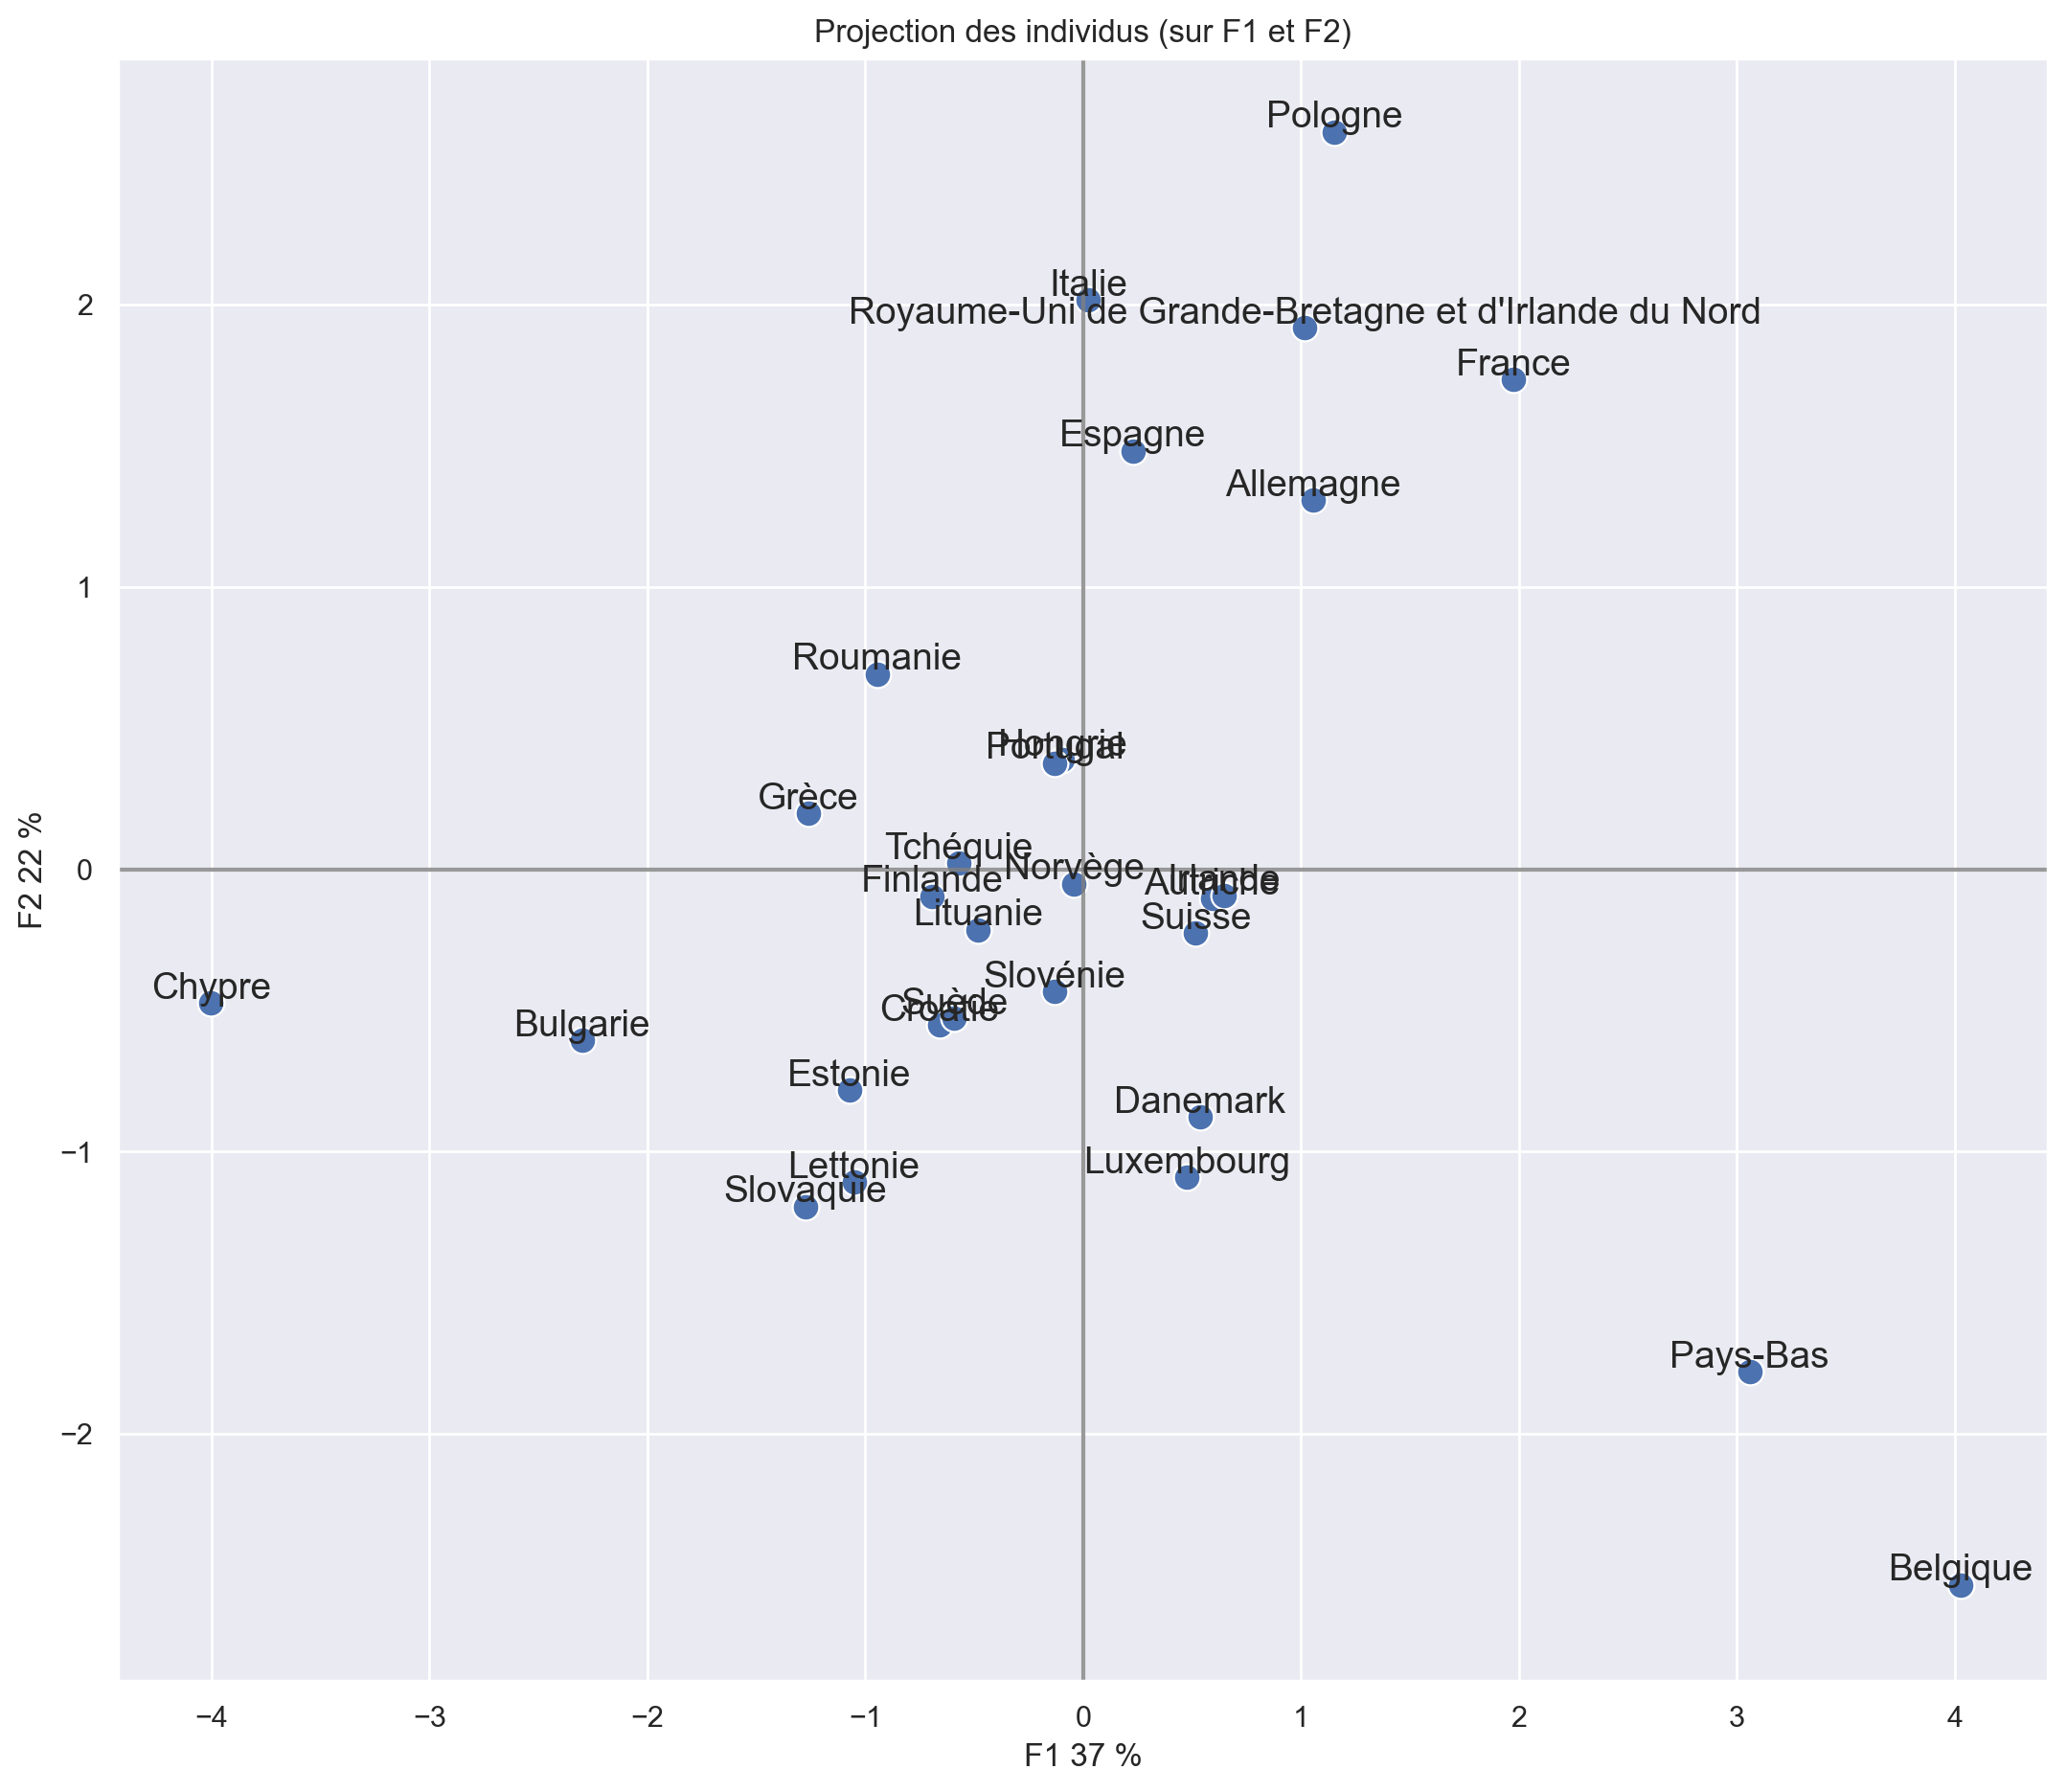

In [652]:
display_factorial_planes(X_proj1,
                        (0,1), # Projection sur F1 et F2 
                        pca_cluster1, 
                        labels=df_only_1["Zone"], 
                        figsize=(13,11), 
                        clusters=None, 
                        marker="o")

En regarder la projection des individus sur le plan factoriel avec à coté le graphique du cercle de corrélation, on peut recommander les pays qui sont dans la partie en haut à droit. <br>
Ce sont les pays qui ont plutot TDI, TAS et disponibilité alimentaire élevées et aussi plutôt proche de la France :<br>
<br>
- Belgique 
- Pays-Bas
- Danemark
- Luxembourg
- Suisse 
- irlande
- Autriche

Nous comparons les données de ces pays avec la moyenne du groupe 1

In [653]:
list_selected_from_cluster1 = ["Belgique", "Pays-Bas", "Danemark", "Autriche", "Irlande", "Suisse", "Luxembourg","France"]


In [654]:
cluster_1 = cluster_1.reset_index()

In [655]:
cluster_1[cluster_1["Zone"].isin(list_selected_from_cluster1)]

Zone  Croissance_popu(%)  population_2017  proteine_volaille(%)  \
1     Autriche            3.736362         8819.901              6.928129   
2     Belgique            3.016502        11419.748              4.509127   
6     Danemark            2.163128         5732.274             11.486008   
10      France            2.011018        64842.509              7.985368   
13     Irlande            3.148324         4753.279             10.963047   
17  Luxembourg           11.500837          591.910              6.796484   
19    Pays-Bas            1.366777        17021.347              8.120272   
26      Suisse            5.591800         8455.804              6.798659   

    Production      TDI(%)      TAS(%)  \
1        148.0   63.583815   85.549133   
2        463.0  222.368421  304.605263   
6        173.0   79.640719  103.592814   
10      1750.0   32.167832  111.252384   
13       110.0   77.343750   85.937500   
17         0.0  100.000000    0.000000   
19      1100.0  163.440860  295.698925   
26        91.0   38.345865   68.421053   

    Disponibilité alimentaire (Kcal/personne/jour)  Qty_prod_hab  PIB_5ans(%)  \
1                                           3694.0     16.780234    -0.995045   
2                                           3770.0     40.543802    -0.994720   
6                                           3383.0     30.179995    -0.748765   
10                                          3556.0     26.988468    -1.781165   
13                                          3714.0     23.141920     5.409817   
17                                          3334.0      0.000000    -0.836909   
19                                          3251.0     64.624733    -1.337900   
26                                          3414.0     10.761839    -1.470107   

    CountryRisk  EEA     Distance  Groupe  
1           5.0    1  1036.711400       1  
2           5.0    1   264.600808       1  
6           6.0    1  1028.875241       1  
10          5.0    1     0.000000       1  
13          4.0    1   780.840481       1  
17          6.0    1   287.972186       1  
19          6.0    1   430.886817       1  
26          6.0    1   490.305157       1

In [656]:
# La moyenne de cluster1 
cluster_1.describe()

Croissance_popu(%)  population_2017  proteine_volaille(%)   Production  \
count           29.000000        29.000000             29.000000    29.000000   
mean             0.972926     18068.880034              8.465894   513.551724   
std              3.666950     23168.383863              2.334975   674.860916   
min             -6.571761       591.910000              4.502107     0.000000   
25%             -1.363850      4753.279000              6.798659    91.000000   
50%              1.326381      8819.901000              7.648698   157.000000   
75%              3.148324     17021.347000             10.963047   493.000000   
max             11.500837     82658.409000             13.256956  2351.000000   

           TDI(%)      TAS(%)  Disponibilité alimentaire (Kcal/personne/jour)  \
count   29.000000   29.000000                                       29.000000   
mean    56.483878  115.152440                                     3331.413793   
std     47.087780   64.143942                                      265.286303   
min      1.960784    0.000000                                     2612.000000   
25%     32.167832   81.199642                                     3241.000000   
50%     44.919786  101.202405                                     3353.000000   
75%     72.413793  135.555556                                     3522.000000   
max    222.368421  304.605263                                     3770.000000   

       Qty_prod_hab  PIB_5ans(%)  CountryRisk   EEA     Distance  Groupe  
count     29.000000    29.000000    29.000000  29.0    29.000000    29.0  
mean      25.838983    -0.384796     4.620690   1.0  1192.110220     1.0  
std       14.758271     2.277194     1.115277   0.0   651.091848     0.0  
min        0.000000    -4.921573     3.000000   1.0     0.000000     1.0  
25%       15.850747    -1.470107     4.000000   1.0   880.634838     1.0  
50%       21.673311    -0.836909     5.000000   1.0  1091.707532     1.0  
75%       32.477675     0.377321     5.000000   1.0  1701.103154     1.0  
max       64.624733     5.409817     7.000000   1.0  2954.972339     1.0

La moyenne du cluster 1:<br> 

- TDI (%) : 56.48
- TAS (%) : 115.15 
- Dispo. alimentaire : 3331.41
- Country Risk: 4.62
<br>

Après comparaison, nous suggérons 
- Belgique
- Pays Bas
- Danemark
- Luxembourg
- Suisse <br>
sont le meilleur choix.<br>

### Affinage de la sélection sur le cluster 2

In [657]:
mask = df3["Groupe"] == 2
df_only_2= df3[mask].copy()
df_only_2.drop(columns=["Groupe","EEA",'Croissance_popu(%)','PIB_5ans(%)' , 'Production',"proteine_volaille(%)","Qty_prod_hab"], axis=1, inplace=True)

In [658]:
features2 = df_only_2.columns.values
features2

array(['population_2017', 'TDI(%)', 'TAS(%)',
       'Disponibilité alimentaire (Kcal/personne/jour)', 'CountryRisk',
       'Distance'], dtype=object)

In [659]:
X2 = df_only_2.values
#Centrage / réduction des données pour que nos données puissent prendre la même importance
std_scale = preprocessing.StandardScaler().fit(X2)
X_scaled2 = std_scale.transform(X2) # 放這個是為了算入每個國家不同的重要性

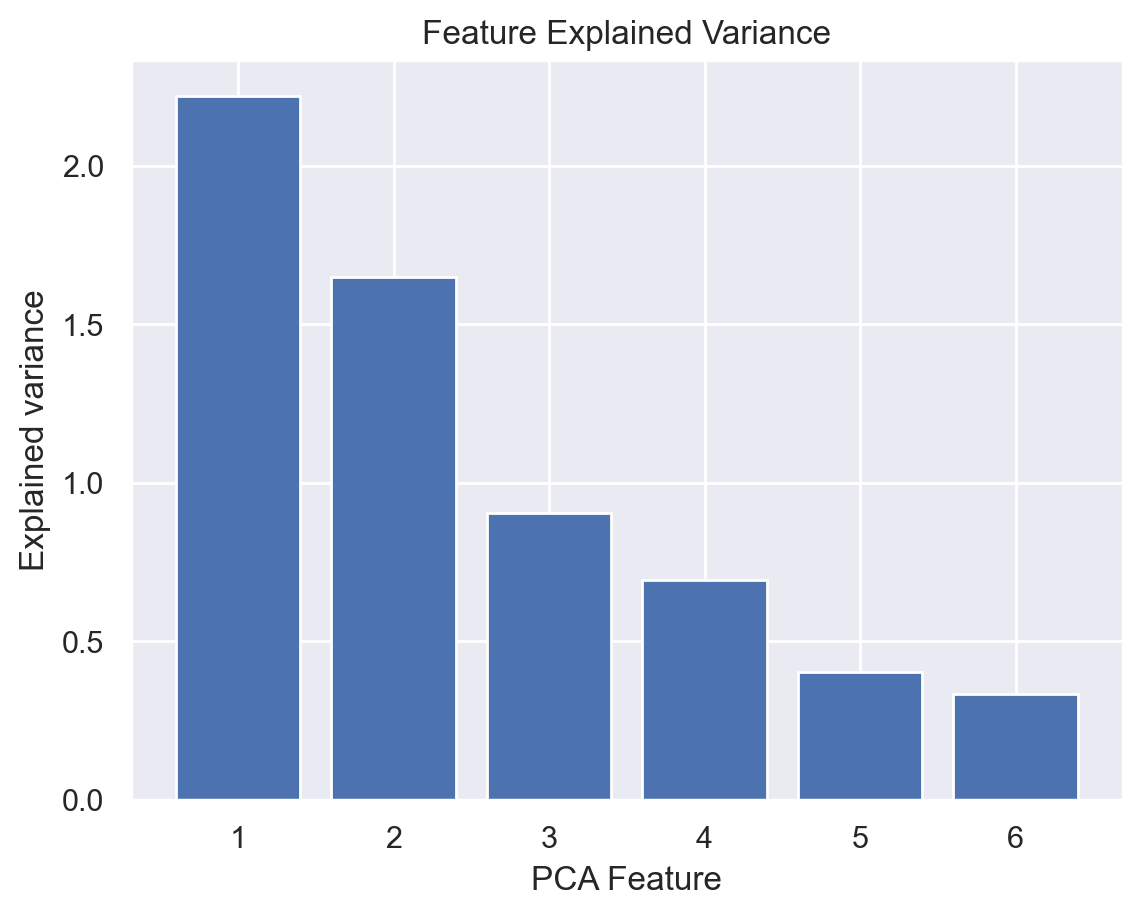

In [660]:
pca2 = PCA(n_components=features2.size)
X_proj2 = pca2.fit_transform(X_scaled2)
plt.bar(range(1, len(pca2.explained_variance_)+1),
    pca2.explained_variance_
)
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

On choisit de regarder la répartition des variables au sein des composantes 1 à 2 ( F1 , F2 ) et leurs interrelations

In [661]:
features2

array(['population_2017', 'TDI(%)', 'TAS(%)',
       'Disponibilité alimentaire (Kcal/personne/jour)', 'CountryRisk',
       'Distance'], dtype=object)

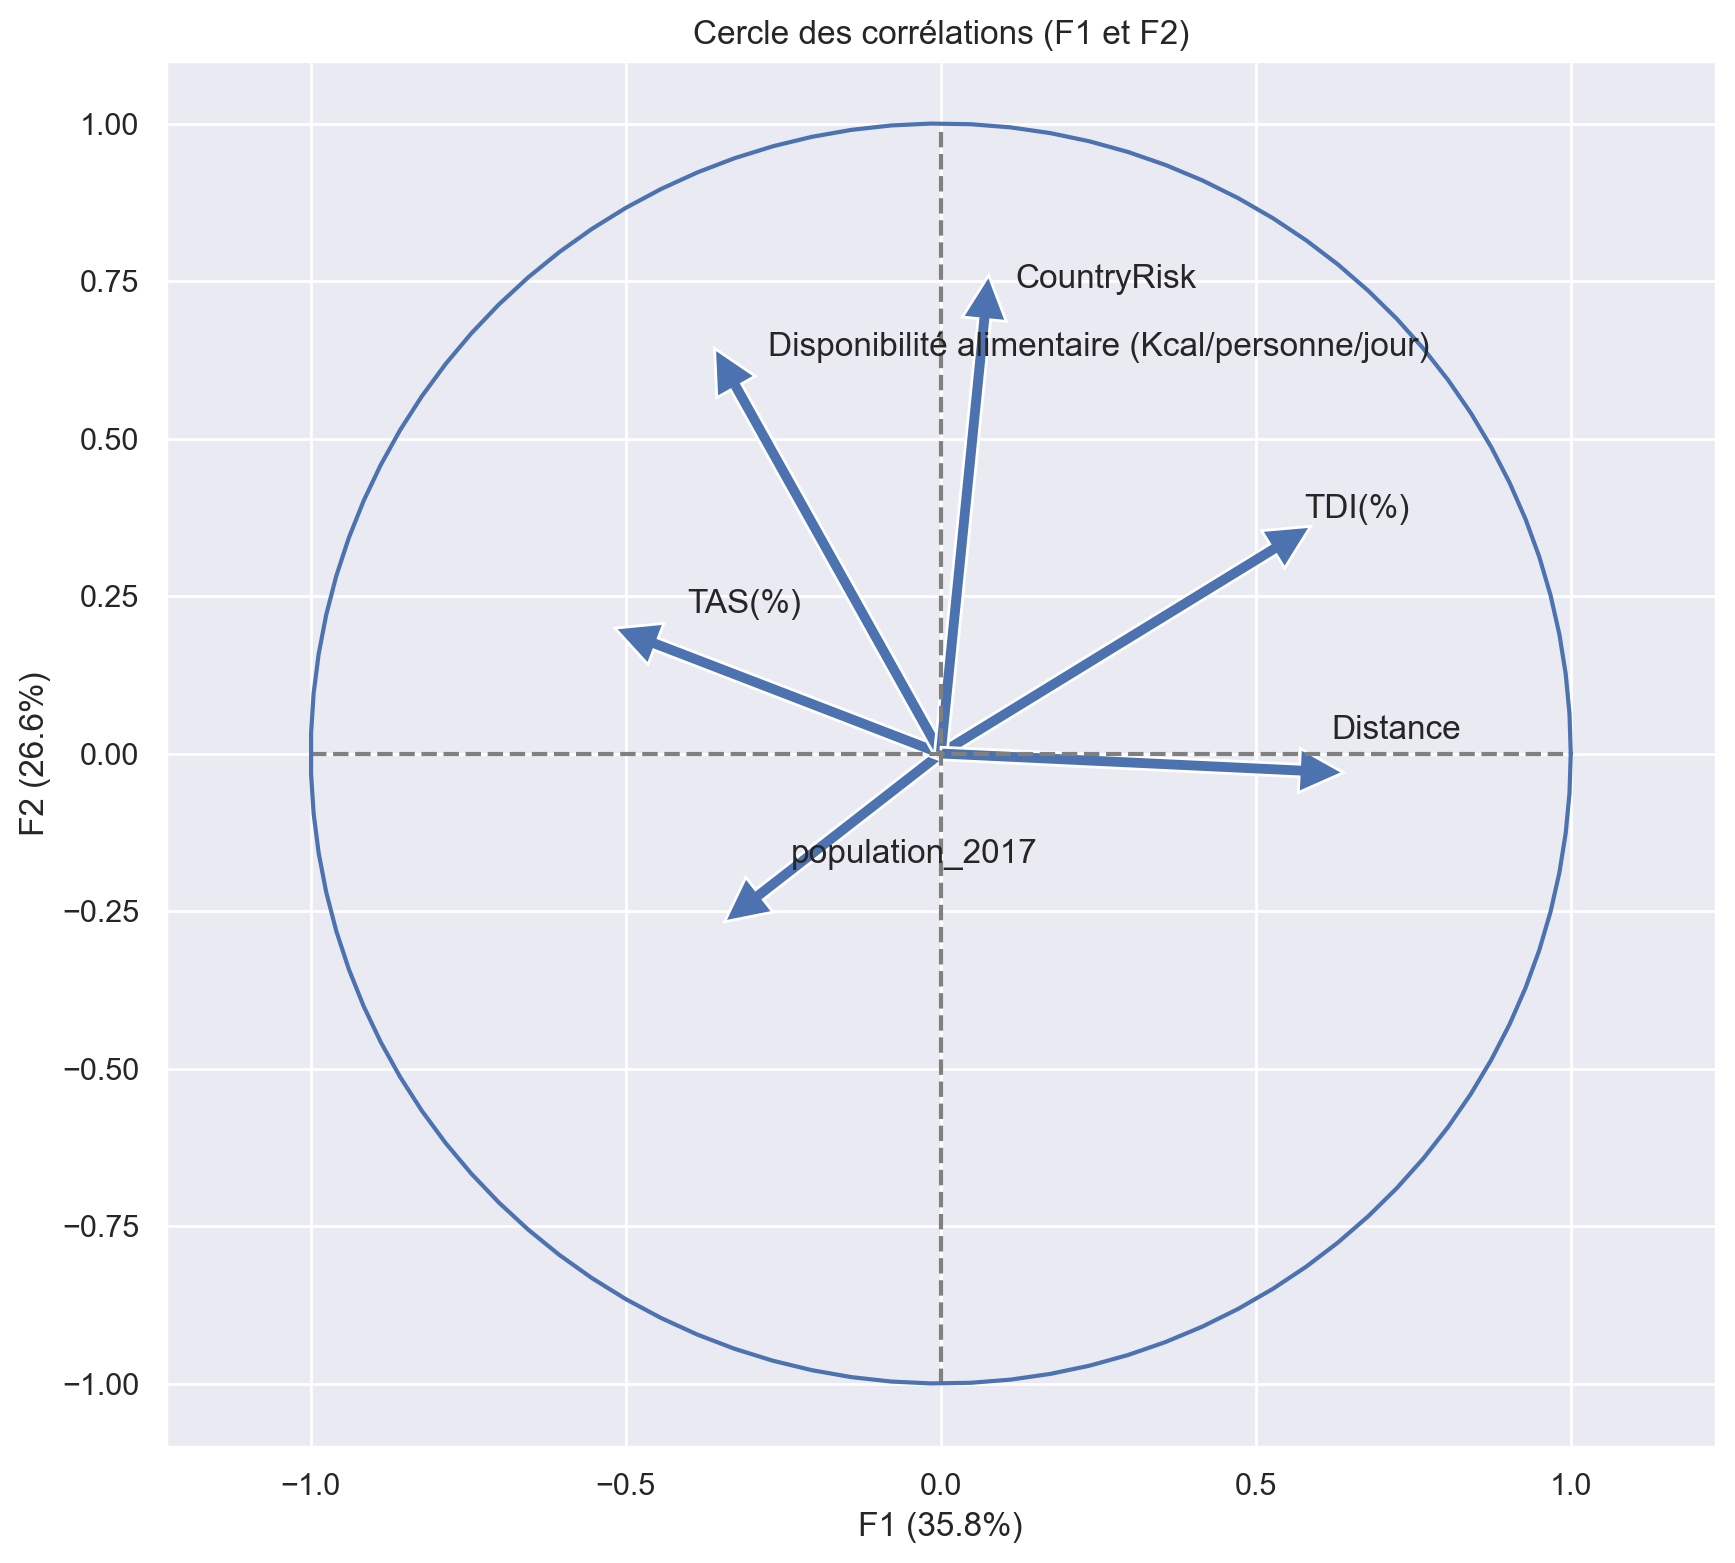

In [662]:
correlation_graph(pca2, (0,1), features2)

Pour F1:
- TDI positif.
- Distance positif
- TAS négatif
- Disponibilité alimentaire négatif 
<br>

Pour F2:
- CountryRisk positif
- Disponibilité alimentaire positif 
- Population 2017 négatif 
<br>

Cela montre que les pays de droite ( surtout les plus proches du coin supérieur droit ) ont un TDI plutot élevé avec le score de CountryRisk plus élevé et le TAS plus faible.<br>
Ces pays respectent nos critrère d'importation.<br>

In [663]:
df_only_2 = df_only_2.reset_index()
df_only_2.head()

Zone  population_2017     TDI(%)     TAS(%)  \
0          Albanie         2884.169  80.851064  27.659574   
1           Angola        29816.766  86.833856  13.166144   
2  Arabie saoudite        33101.179  50.313589  42.926829   
3          Arménie         2944.791  74.468085  23.404255   
4            Bénin        11175.198  76.397516  11.180124   

   Disponibilité alimentaire (Kcal/personne/jour)  CountryRisk     Distance  
0                                          3400.0          1.0  1603.944535  
1                                          2266.0          2.0  6478.953877  
2                                          3194.0          3.0  4686.618146  
3                                          3072.0          2.0  3439.396932  
4                                          2754.0          3.0  4709.456098

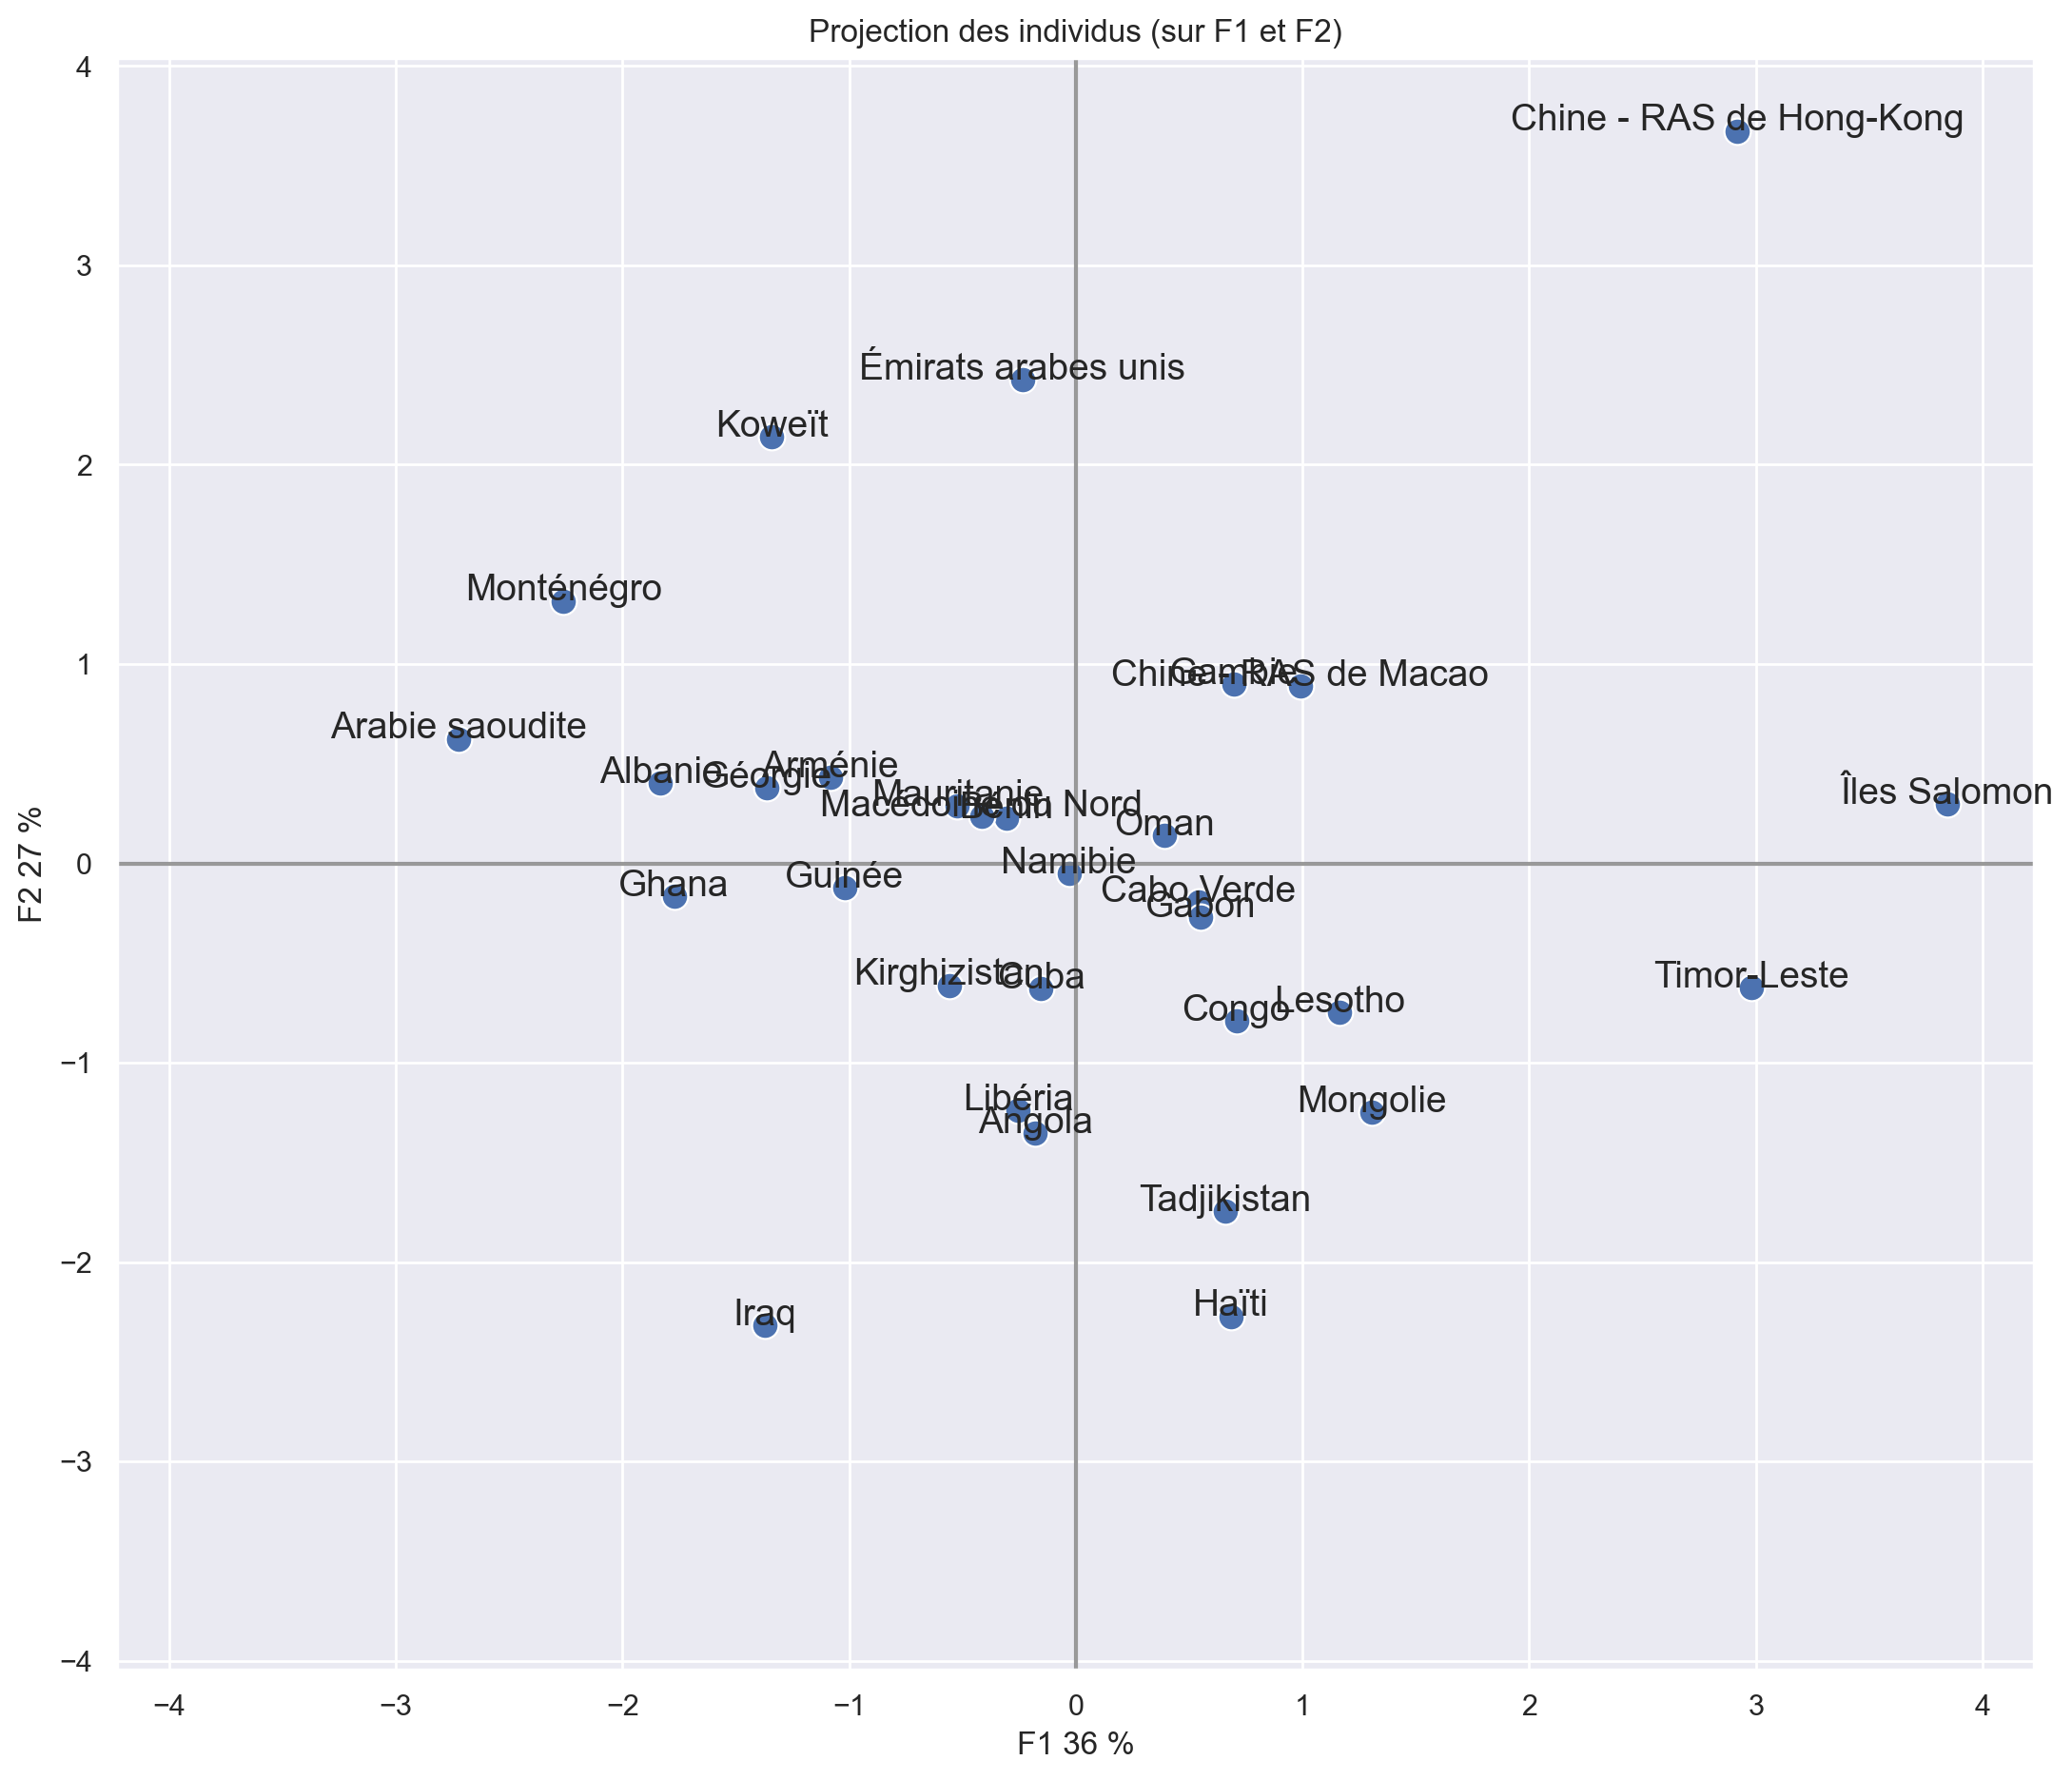

In [664]:
display_factorial_planes(X_proj2, (0,1), pca2, labels=df_only_2["Zone"], figsize=(13,11), clusters=None, marker="o")

On peut recommander plutôt les pays qui sont dans la partie en haut à droite.<br>
Ce sont les pays au TDI plutôt haut et TAS plus faible avec un bon score de CountryRisk.<br>
- Chine-RAS de Hong-Kong 
- Emirats arabes unis
- Koweit

Nous comparons les données de ces pays avec la moyenne du groupe2

In [665]:
list_selected_from_cluster2 = ["Chine - RAS de Hong-Kong", "Émirats arabes unis", "Koweït"]

In [666]:
cluster_2 = cluster_2.reset_index()

In [667]:
cluster_2[cluster_2["Zone"].isin(list_selected_from_cluster2)]

Zone  Croissance_popu(%)  population_2017  \
6   Chine - RAS de Hong-Kong            3.682129         7306.322   
18                    Koweït           21.119052         4056.099   
29       Émirats arabes unis            3.780598         9487.203   

    proteine_volaille(%)  Production      TDI(%)     TAS(%)  \
6              16.144473        24.0  323.928571   8.571429   
18             15.919350        56.0   72.486772  29.629630   
29             13.798247        48.0  105.097087  11.650485   

    Disponibilité alimentaire (Kcal/personne/jour)  Qty_prod_hab  PIB_5ans(%)  \
6                                           3353.0      3.284826     4.697363   
18                                          3445.0     13.806369    -6.816247   
29                                          3370.0      5.059447     0.798578   

    CountryRisk  EEA     Distance  Groupe  
6           5.0    0  9645.855848       2  
18          4.0    0  4441.333447       2  
29          5.0    0  5251.803242       2

In [668]:
# La moyenne de cluster 2 
cluster_2.describe()

Croissance_popu(%)  population_2017  proteine_volaille(%)  Production  \
count           31.000000        31.000000             31.000000   31.000000   
mean            10.465579      8300.350065              7.395255   36.451613   
std              7.664289     10102.321938              4.742376  109.791875   
min             -1.362907       537.498000              1.153613    0.000000   
25%              3.789560      2152.711500              3.202607    2.500000   
50%             10.379779      4282.570000              6.749902    9.000000   
75%             14.622210     10234.784500              9.387692   23.000000   
max             33.387345     37552.781000             17.792252  616.000000   

           TDI(%)     TAS(%)  Disponibilité alimentaire (Kcal/personne/jour)  \
count   31.000000  31.000000                                       31.000000   
mean   109.254367  17.976349                                     2758.580645   
std     55.186090  12.188845                                      443.278676   
min     50.313589   0.000000                                     2099.000000   
25%     80.425532   8.525480                                     2389.500000   
50%     94.545455  15.789474                                     2793.000000   
75%    109.808612  26.829787                                     3053.000000   
max    323.928571  42.926829                                     3478.000000   

       Qty_prod_hab  PIB_5ans(%)  CountryRisk   EEA      Distance  Groupe  
count     31.000000    31.000000    31.000000  31.0     31.000000    31.0  
mean       3.172838     0.428848     2.000620   0.0   5876.742948     2.0  
std        3.922938     3.744752     1.202207   0.0   3048.806089     0.0  
min        0.000000    -7.521901     0.000000   0.0   1494.182007     2.0  
25%        1.018944    -1.861769     1.000000   0.0   4378.159355     2.0  
50%        1.860472     0.798578     2.000000   0.0   5251.803242     2.0  
75%        4.121387     2.461307     2.336538   0.0   7216.606958     2.0  
max       18.609609     7.791837     5.000000   0.0  15164.476423     2.0

La moyenne du cluster 2:<br> 

- TDI (%) : 109.25
- TAS (%) : 17.97
- Dispo. alimentaire :2758.58
- Country Risk: 2.0
- Distance: 5876.74
<br>

Après comparaison, nous suggérons Émirats arabes unis est le meilleur choix.<br>
Parce que son TDI et d'autres données sont supérieures à la valeur moyenne du cluster 2.<br>
<br> 

### Conclusion

Compte tenu de facteurs tels que la dépendance du pays à l'importation, le taux de auto-suffisance alimentaire, ainsi que d'autres facteurs tel les taxes à l'importation, les coûts de transports et la crédibilité du pays, nous recommandons les pays suivants 

- Belgique
- Pays Bas
- Luxembourg
- Suisse 
- Danemark
- Émirats arabes unis
- Koweît
- Chine-RAS de Hong-Kong 

Nous recommandons cinq pays membres de l'EEE et deux pays non-EEE pour exportation.